In [15]:
import numpy as np
import numpy.typing as npt
import math

def read_data(fn: str, function_name: str, parameter_names: dict[str, int]) -> dict[str, npt.NDArray[np.float64]]:
    import json
    with open(fn, 'r') as f:
        json_data = json.load(f)
    assert function_name in json_data.keys()
    samples = json_data[function_name]
    samples_arr = np.array(samples, dtype=np.float64)
    
    data = {}
    for parameter_name, i in parameter_names.items():
        data[parameter_name] = samples_arr[:,i]
    data['performance'] = samples_arr[:,-1]
    
    return data

import matplotlib.pyplot as plt
def plot_scatter(
        data: dict[str, npt.NDArray[np.float64]], 
        title: str, 
        fixed_parameter_name: str, 
        fixed_value: int
) -> None:
    plt.figure(figsize=(12, 2))
    if fixed_parameter_name == 'k':
        plotted_parameter_name = 'o'
    elif fixed_parameter_name == 'o':
        plotted_parameter_name = 'k'
    else:
        raise ValueError(f"Invalid fixed parameter name: {fixed_parameter_name}")
    fixed_values = data[fixed_parameter_name]
    plotted_values = data[plotted_parameter_name]
    performances = data['performance']
    x_vals = []
    perfs = []
    for i,value in enumerate(fixed_values):
        if value == fixed_value:
            x_vals.append(plotted_values[i])
            perfs.append(performances[i])
    plt.scatter(x_vals, perfs, label=f'{fixed_parameter_name}={fixed_value}', alpha=0.6)
    plt.xlabel(plotted_parameter_name)
    plt.ylabel('Running time')
    if fixed_parameter_name == 'o':
        plt.xscale('log')
        plt.yscale('log')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

####################################################################################################
# fixed o
####################################################################################################
****************************************************************************************************
* o=1


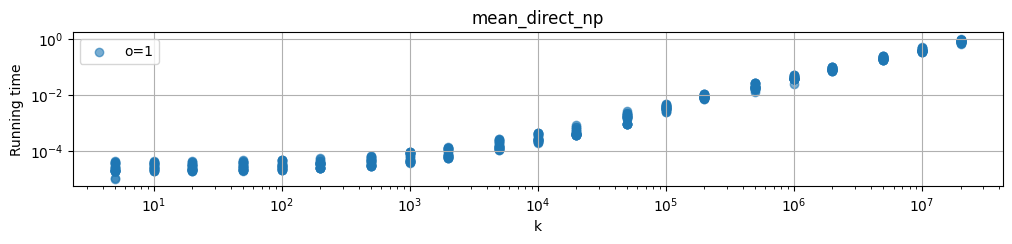

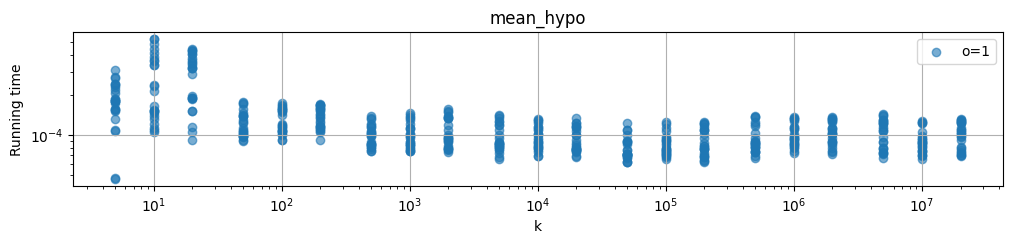

****************************************************************************************************
* o=2


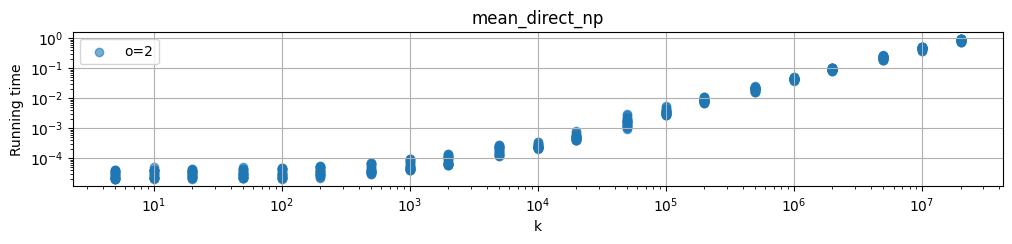

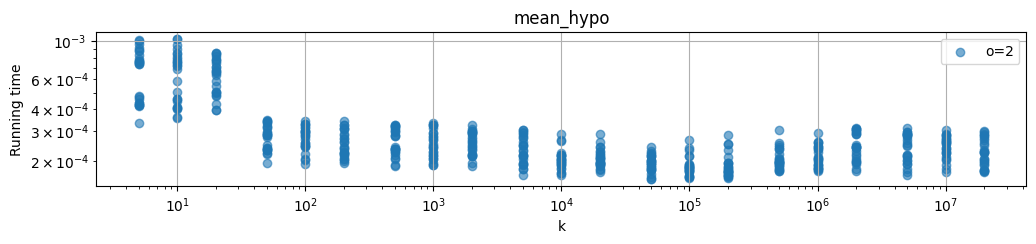

****************************************************************************************************
* o=3


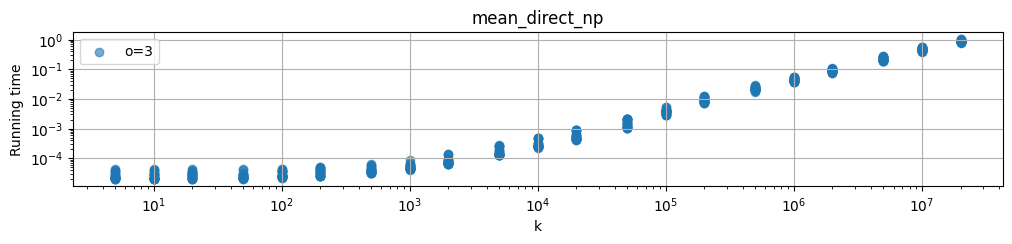

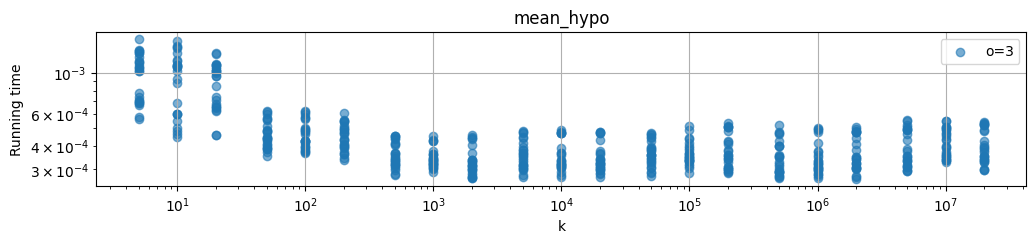

****************************************************************************************************
* o=4


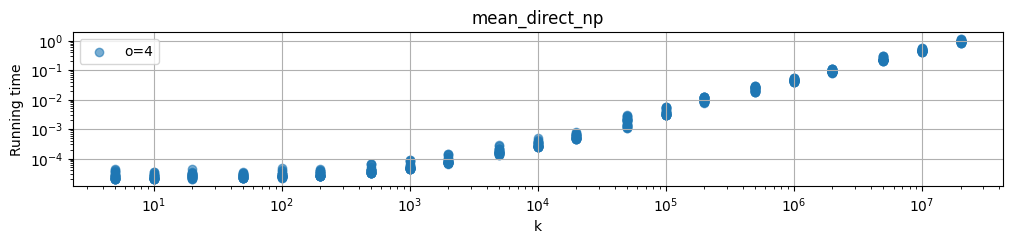

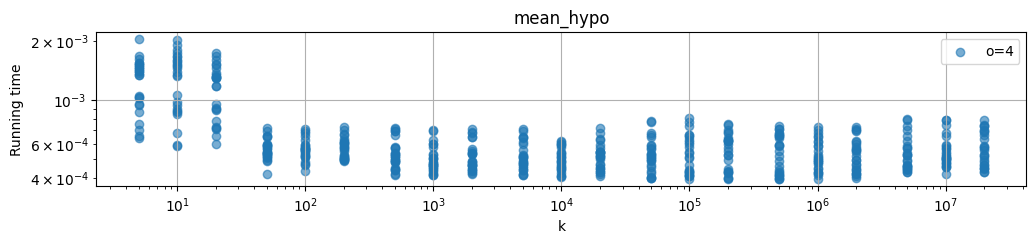

****************************************************************************************************
* o=5


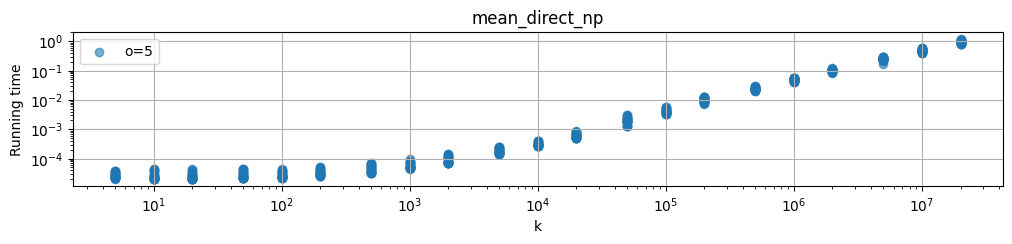

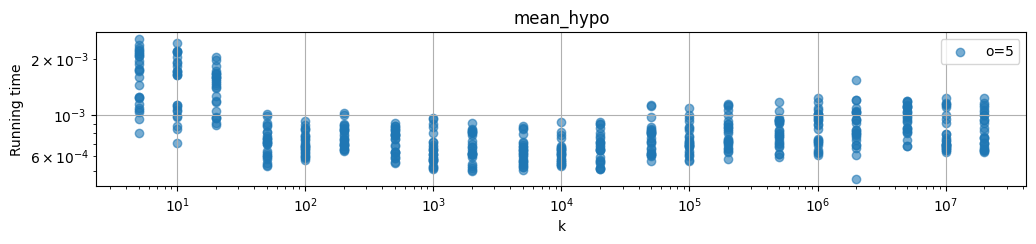

####################################################################################################
# fixed k
####################################################################################################
****************************************************************************************************
* n=10^2; k=5; multiplier=0.5


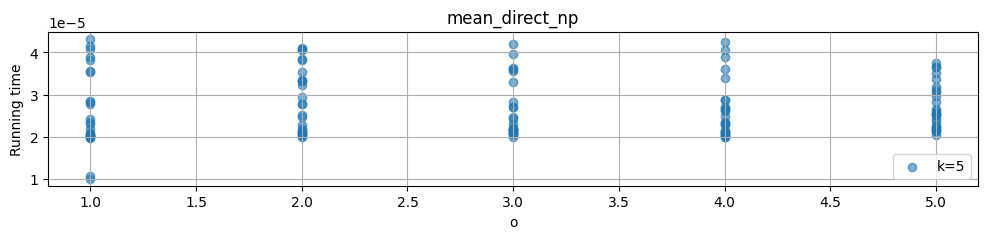

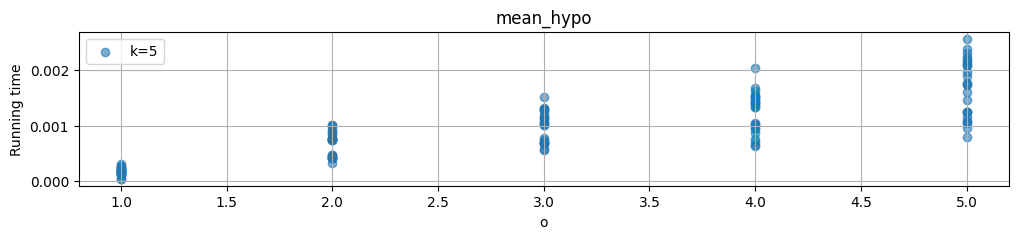

****************************************************************************************************
* n=10^2; k=10; multiplier=1


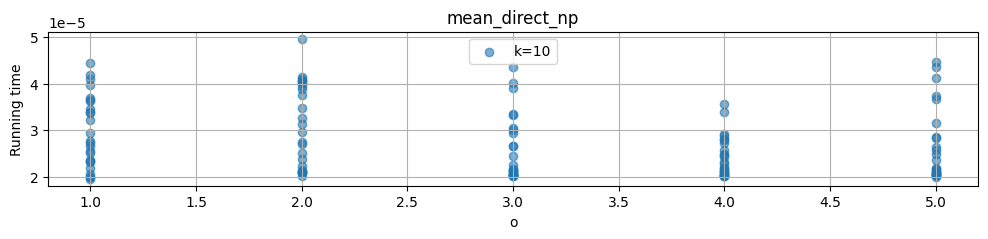

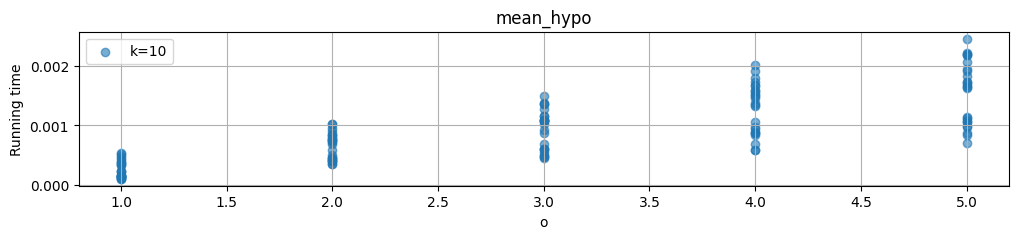

****************************************************************************************************
* n=10^2; k=20; multiplier=2


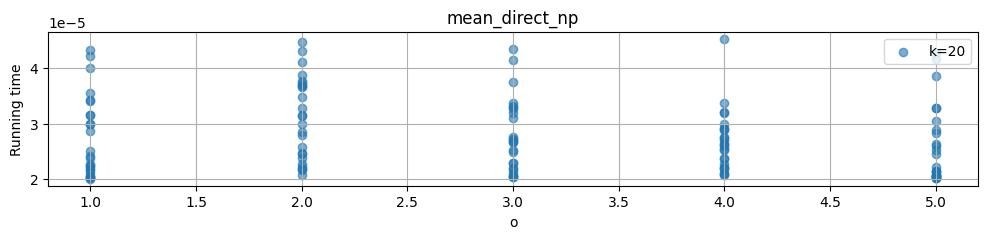

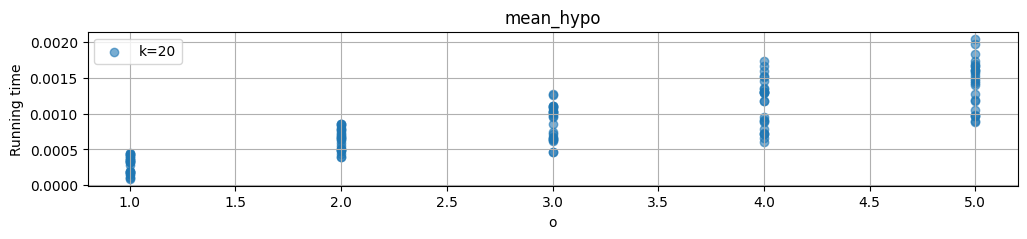

****************************************************************************************************
* n=10^4; k=50; multiplier=0.5


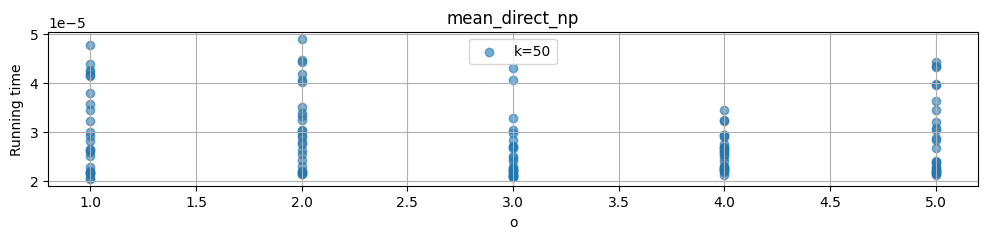

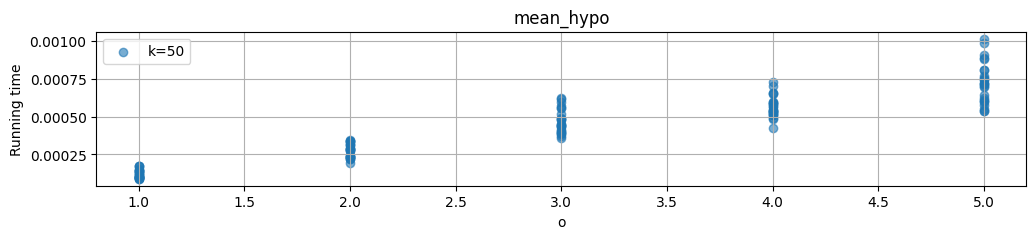

****************************************************************************************************
* n=10^4; k=100; multiplier=1


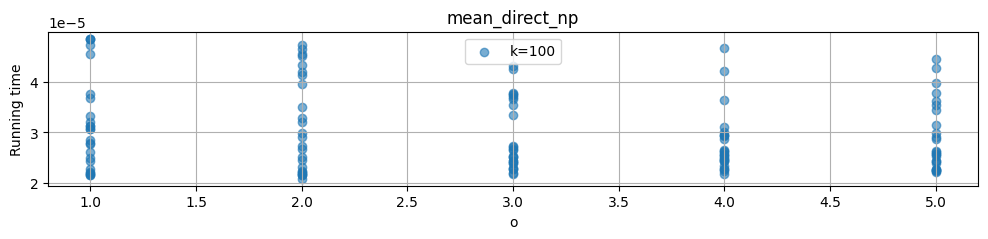

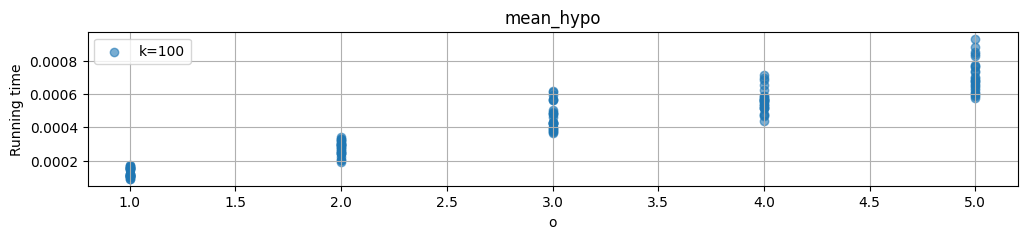

****************************************************************************************************
* n=10^4; k=200; multiplier=2


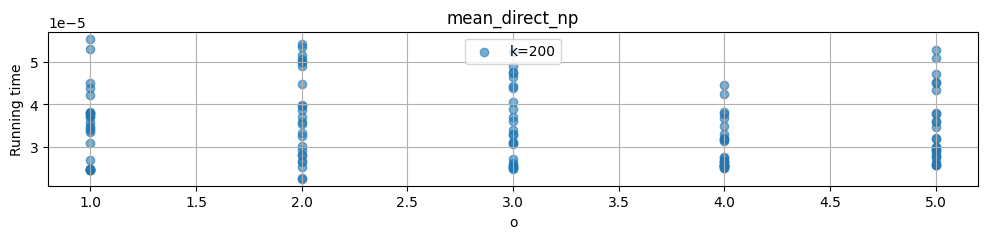

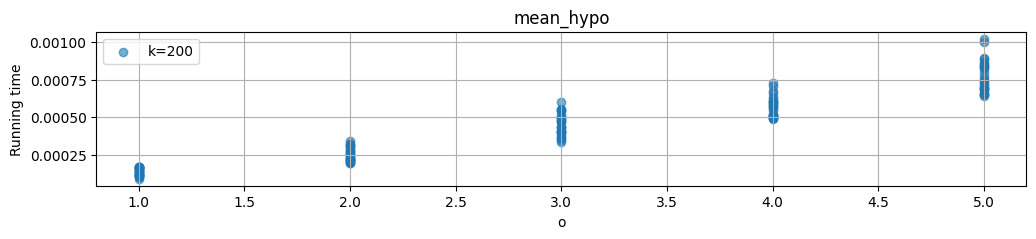

****************************************************************************************************
* n=10^6; k=500; multiplier=0.5


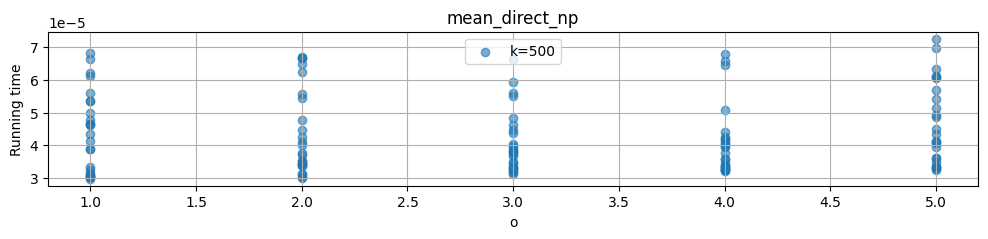

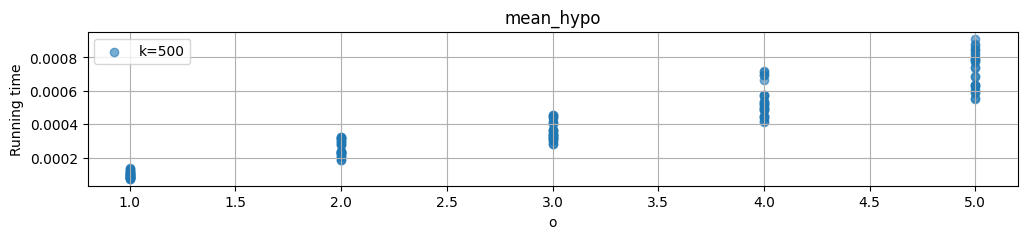

****************************************************************************************************
* n=10^6; k=1000; multiplier=1


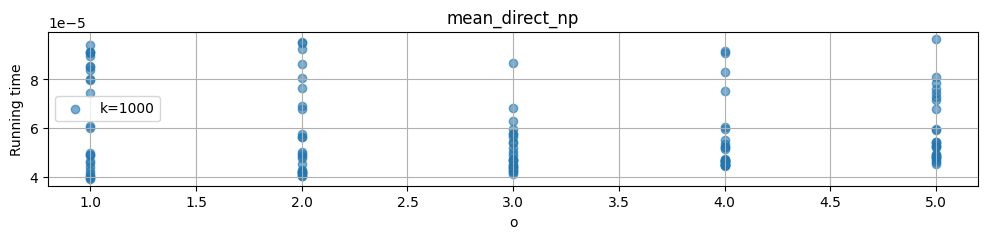

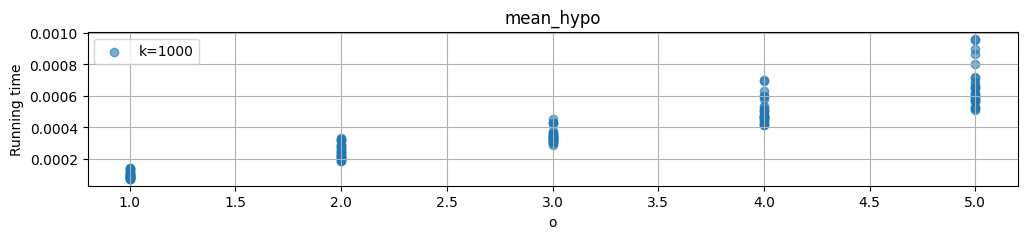

****************************************************************************************************
* n=10^6; k=2000; multiplier=2


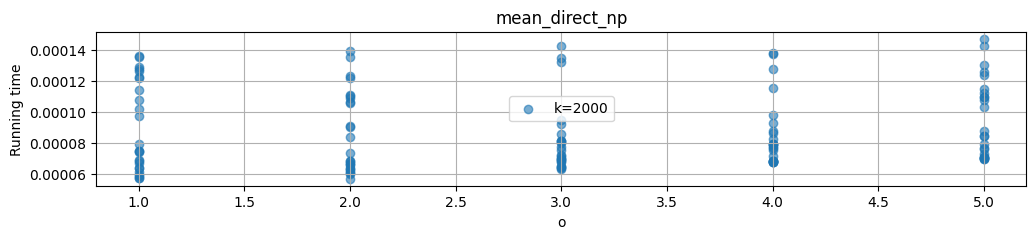

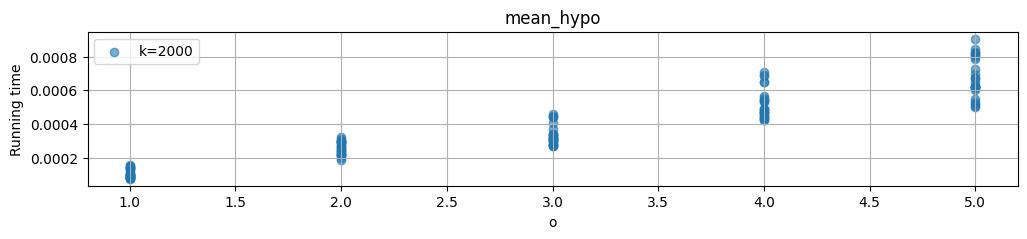

****************************************************************************************************
* n=10^8; k=5000; multiplier=0.5


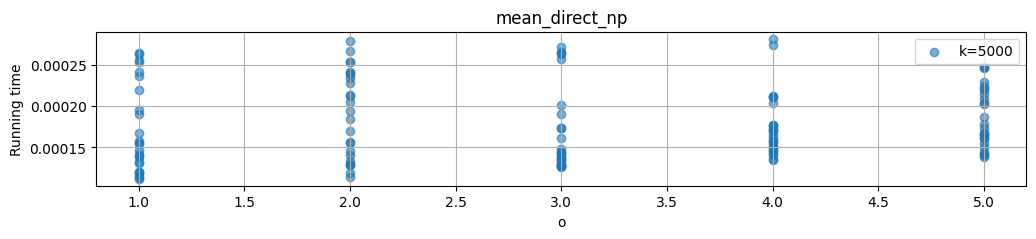

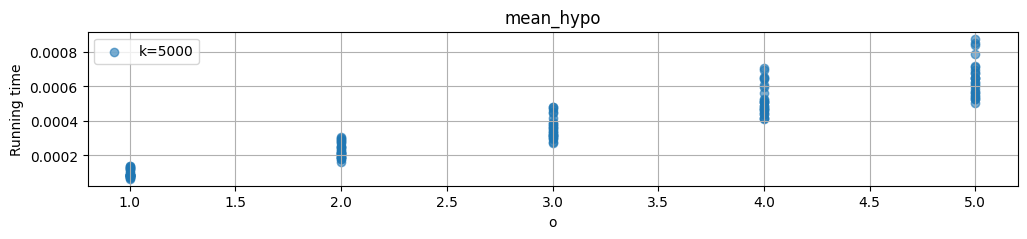

****************************************************************************************************
* n=10^8; k=10000; multiplier=1


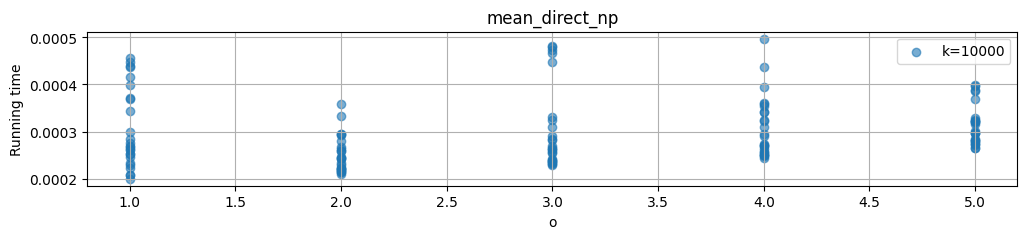

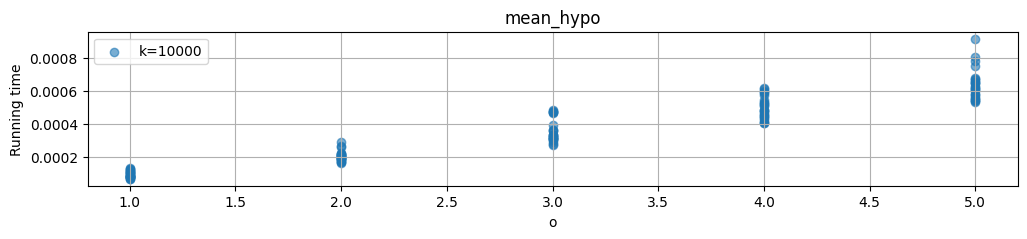

****************************************************************************************************
* n=10^8; k=20000; multiplier=2


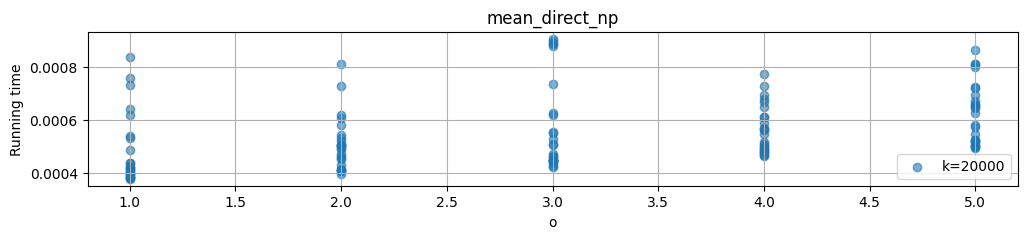

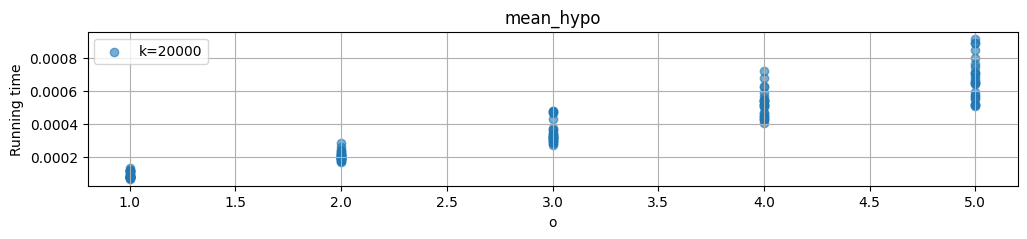

****************************************************************************************************
* n=10^10; k=50000; multiplier=0.5


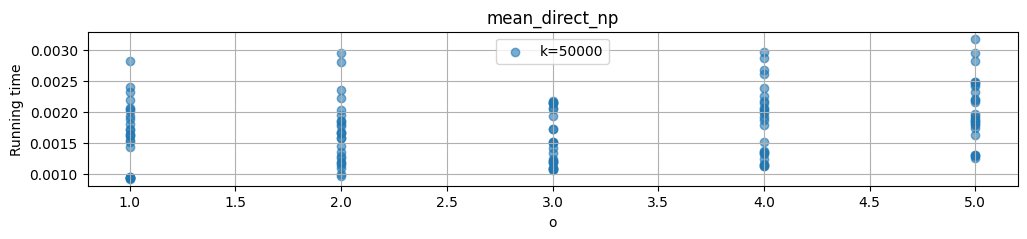

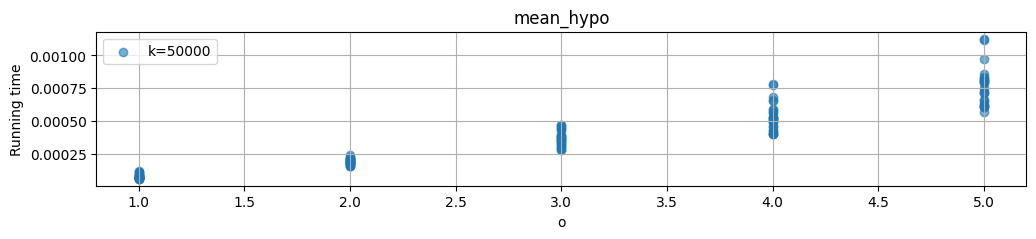

****************************************************************************************************
* n=10^10; k=100000; multiplier=1


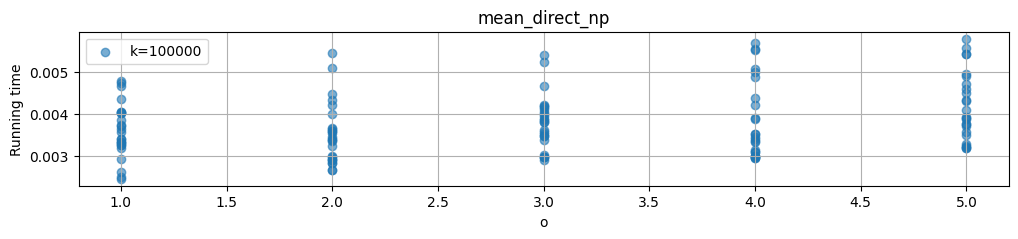

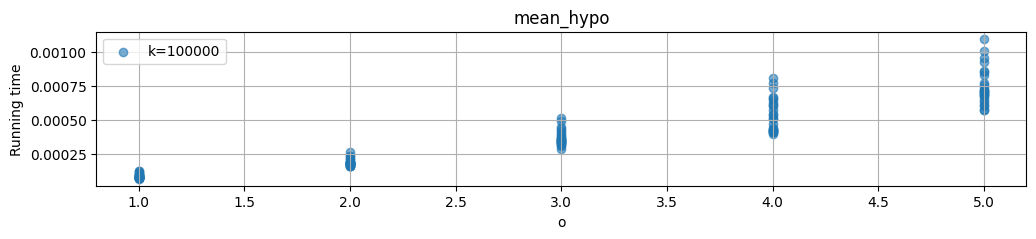

****************************************************************************************************
* n=10^10; k=200000; multiplier=2


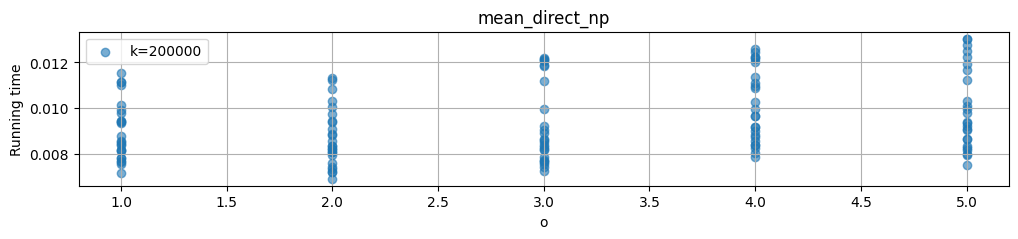

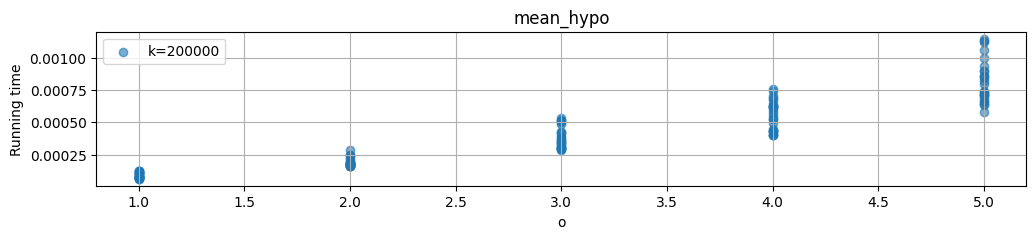

****************************************************************************************************
* n=10^12; k=500000; multiplier=0.5


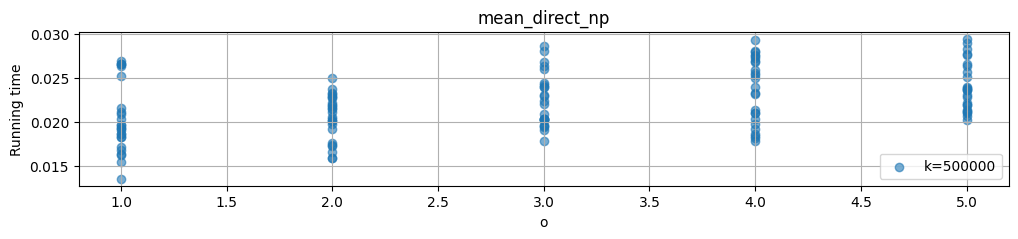

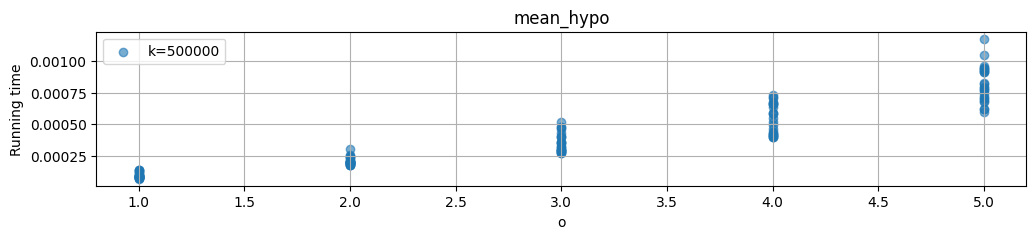

****************************************************************************************************
* n=10^12; k=1000000; multiplier=1


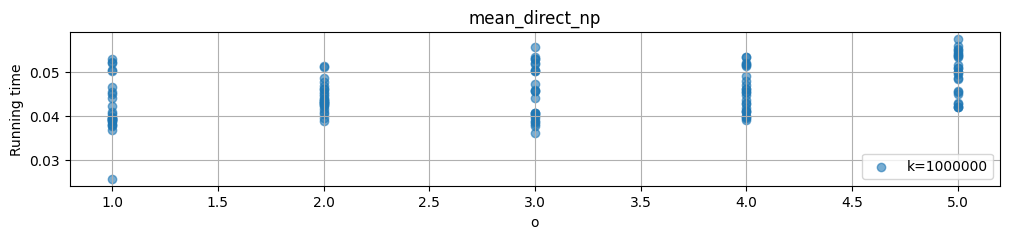

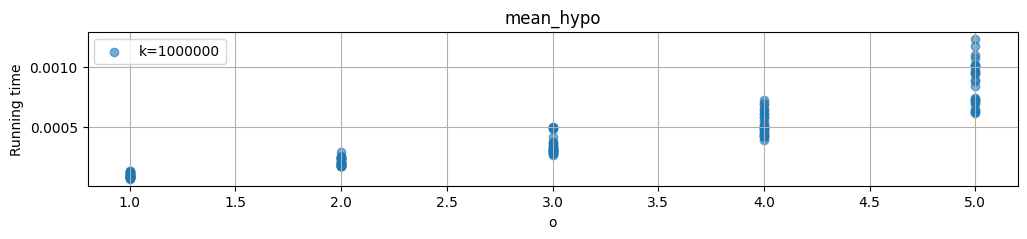

****************************************************************************************************
* n=10^12; k=2000000; multiplier=2


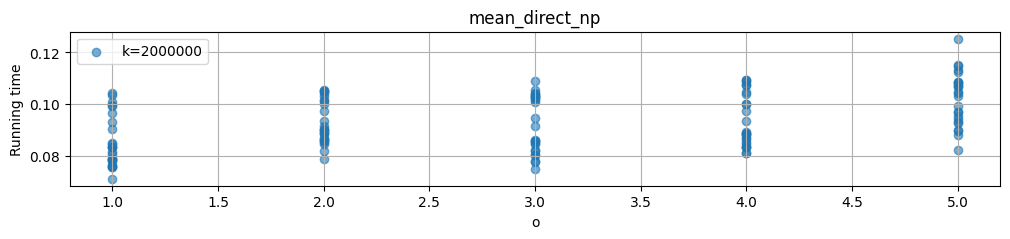

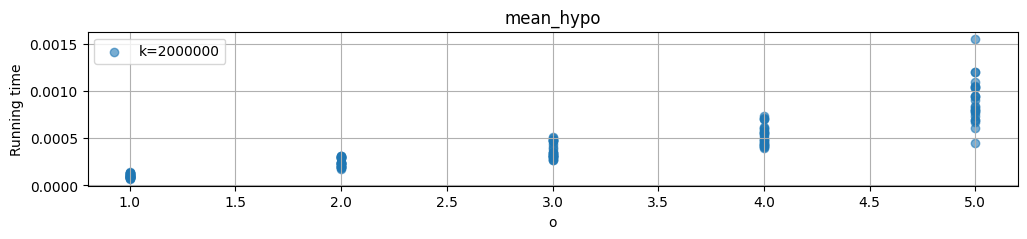

****************************************************************************************************
* n=10^14; k=5000000; multiplier=0.5


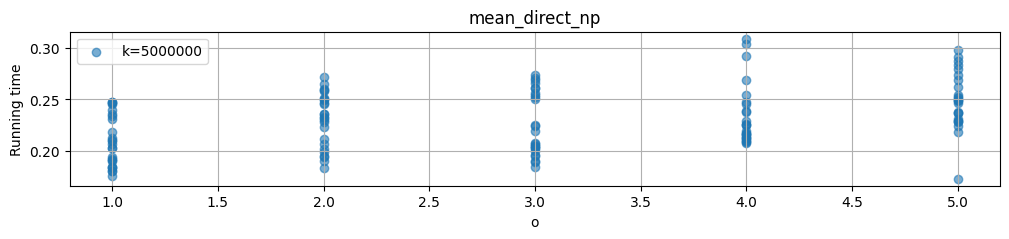

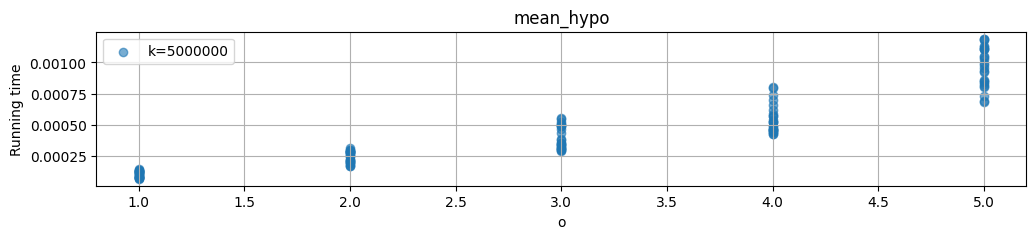

****************************************************************************************************
* n=10^14; k=10000000; multiplier=1


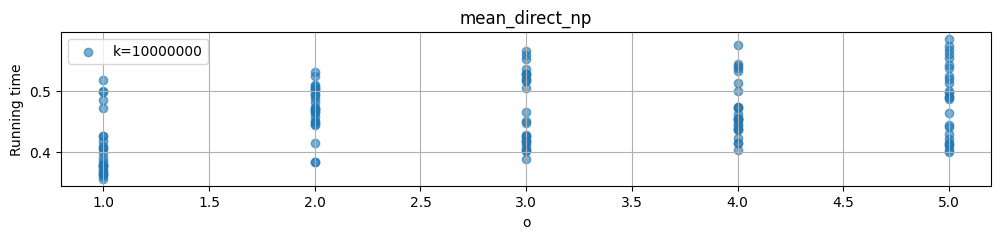

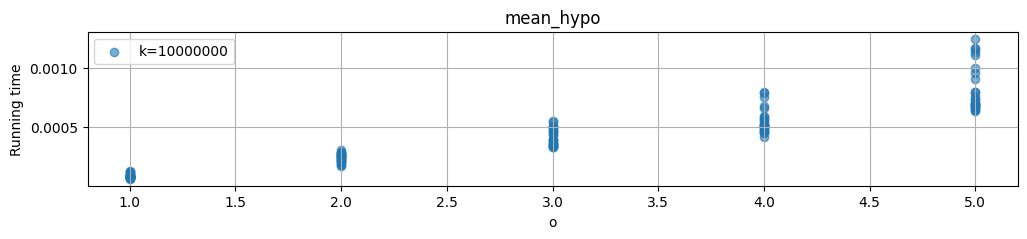

****************************************************************************************************
* n=10^14; k=20000000; multiplier=2


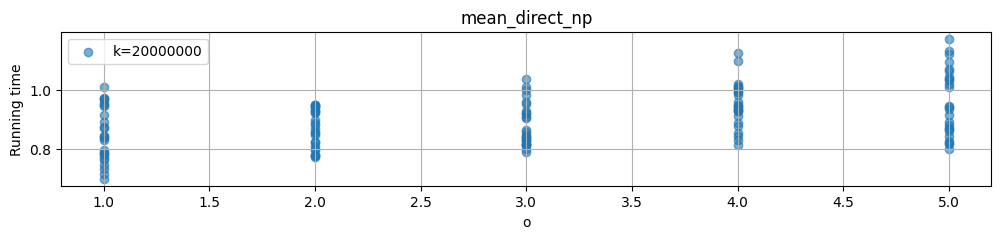

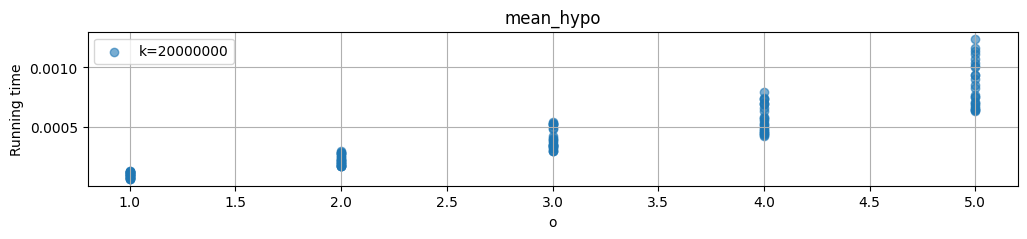

In [33]:
val_name = 'mean'
data_fn = f'running_time_data_compute_{val_name}.json'
direct_func_name = f'{val_name}_direct_np'
indirect_func_name = f'{val_name}_hypo'
data_direct_np = read_data(data_fn, direct_func_name, {'k': 1, 'o': 2})
data_hypo = read_data(data_fn, indirect_func_name, {'k': 1, 'o': 2})

print('#'*100 + '\n# fixed o\n' + '#' * 100)

for o in [1,2,3,4,5]:
    print('*'*100 + f'\n* o={o}')
    plot_scatter(data_direct_np, direct_func_name,   'o', o)
    plot_scatter(data_hypo,      indirect_func_name, 'o', o)

print('#'*100 + '\n# fixed k\n' + '#' * 100)

for exponent in range(2, 15, 2):
    n = 10**exponent
    for multiplier in [1/2, 1, 2]:
        k = round(math.sqrt(n) * multiplier)
        print('*'*100 + f'\n* n=10^{exponent}; k={k}; multiplier={multiplier}')
        plot_scatter(data_direct_np, direct_func_name,   'k', k)
        plot_scatter(data_hypo,      indirect_func_name, 'k', k)

In [ ]:
import time
import gamma
import math
import importlib
import gamma
importlib.reload(gamma)

def predicted_mean_direct_np(k: float) -> str:
    # return gamma.format_time(0.0000001010 * k**0.952)
    return gamma.format_time(0.0000001026 * k**0.946 * o**0.084)
    # return gamma.format_time(0.0000000927 * k**0.951 * o**0.103)

def predicted_mean_hypo(k: float, o: float) -> str:
    return gamma.format_time(0.0001596799 * k**-0.040 * o**1.238)
    # return gamma.format_time(0.0002378857 * k**-0.017 * o**0.849)
    # return gamma.format_time(0.0001912085 * o**0.873)
    # return gamma.format_time(0.0000032289 * n**0.051 * k**0.274 * o**0.904)

def actual_mean_direct_np(n, k, o, g) -> str:
    start = time.perf_counter()
    gamma.mean_direct_np(n, k, o, g)
    end = time.perf_counter()
    return gamma.format_time(end - start)

def actual_mean_hypo(n, k, o, g) -> str:
    start = time.perf_counter()
    gamma.mean_hypo(n, k, o, g)
    end = time.perf_counter()
    return gamma.format_time(end - start)

n = 10**8
k = round(math.sqrt(n))
o = 3
g = 1

print(f'      {predicted_mean_hypo(k,o)=}')
print(f'     {actual_mean_hypo(n,k,o,g)=}')
print()
print(f'   {predicted_mean_direct_np(k)=}')
print(f'{actual_mean_direct_np(n,k,o,g)=}')

In [ ]:
import time
import gamma
import math
import importlib
import gamma
importlib.reload(gamma)

def predicted_mean_direct_np(k: float) -> str:
    # return gamma.format_time(0.0000001010 * k**0.952)
    return gamma.format_time(0.0000001026 * k**0.946 * o**0.084)
    # return gamma.format_time(0.0000000927 * k**0.951 * o**0.103)

def predicted_mean_hypo(k: float, o: float) -> str:
    return gamma.format_time(0.0001596799 * k**-0.040 * o**1.238)
    # return gamma.format_time(0.0002378857 * k**-0.017 * o**0.849)
    # return gamma.format_time(0.0001912085 * o**0.873)
    # return gamma.format_time(0.0000032289 * n**0.051 * k**0.274 * o**0.904)

def actual_mean_direct_np(n, k, o, g) -> str:
    start = time.perf_counter()
    gamma.mean_direct_np(n, k, o, g)
    end = time.perf_counter()
    return gamma.format_time(end - start)

def actual_mean_hypo(n, k, o, g) -> str:
    start = time.perf_counter()
    gamma.mean_hypo(n, k, o, g)
    end = time.perf_counter()
    return gamma.format_time(end - start)

n = 10**8
k = round(math.sqrt(n))
o = 3
g = 1

print(f'      {predicted_mean_hypo(k,o)=}')
print(f'     {actual_mean_hypo(n,k,o,g)=}')
print()
print(f'   {predicted_mean_direct_np(k)=}')
print(f'{actual_mean_direct_np(n,k,o,g)=}')

####################################################################################################
# fixed k
####################################################################################################
****************************************************************************************************
* n=10^2; k=5; multiplier=0.5


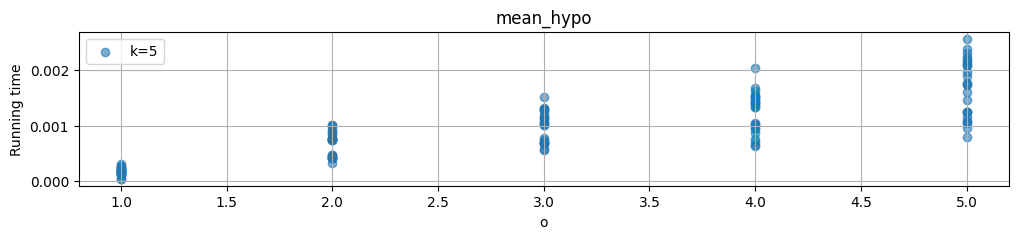

****************************************************************************************************
* n=10^2; k=10; multiplier=1


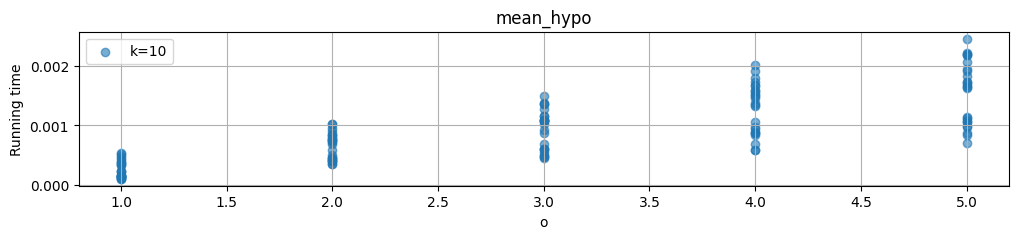

****************************************************************************************************
* n=10^2; k=20; multiplier=2


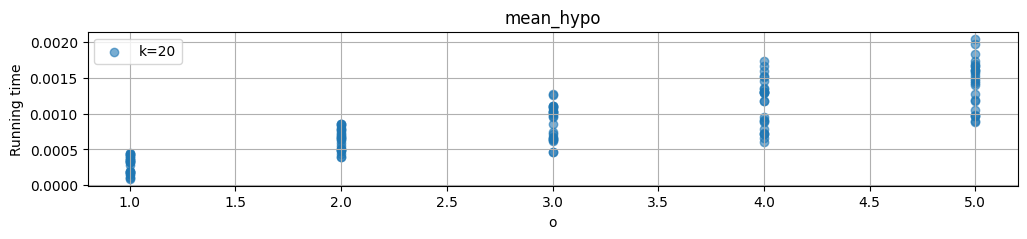

****************************************************************************************************
* n=10^4; k=50; multiplier=0.5


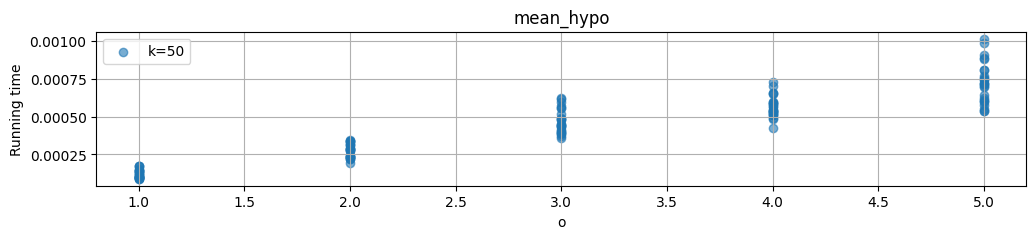

****************************************************************************************************
* n=10^4; k=100; multiplier=1


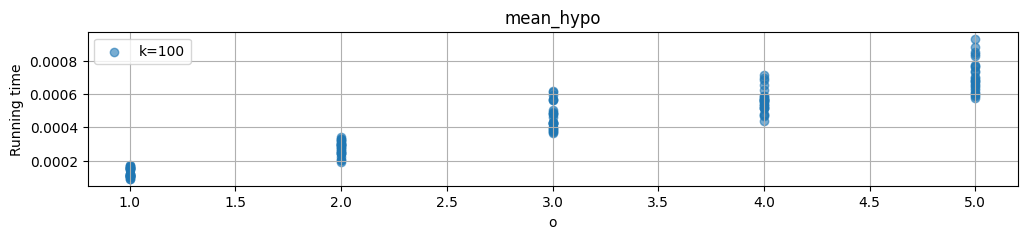

****************************************************************************************************
* n=10^4; k=200; multiplier=2


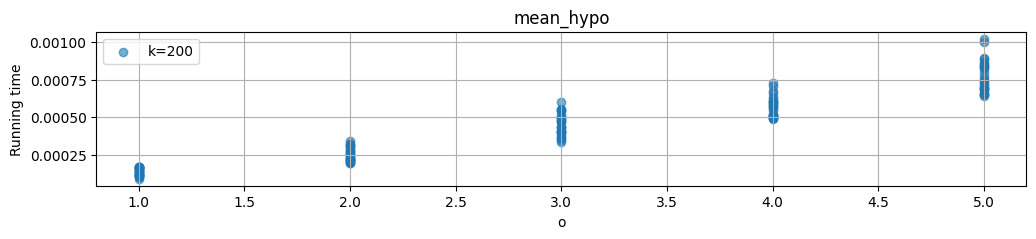

****************************************************************************************************
* n=10^6; k=500; multiplier=0.5


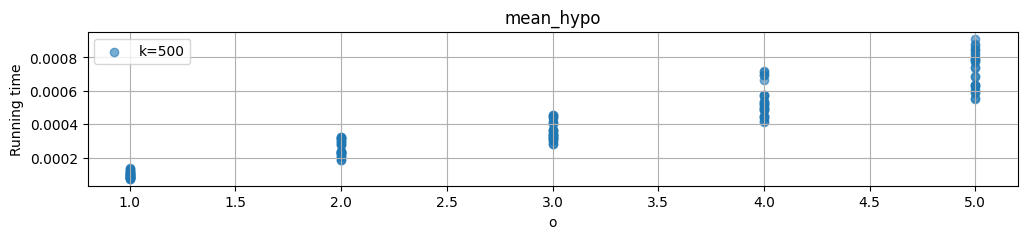

****************************************************************************************************
* n=10^6; k=1000; multiplier=1


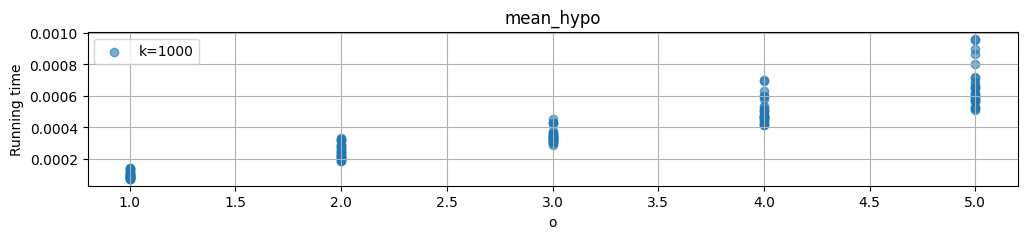

****************************************************************************************************
* n=10^6; k=2000; multiplier=2


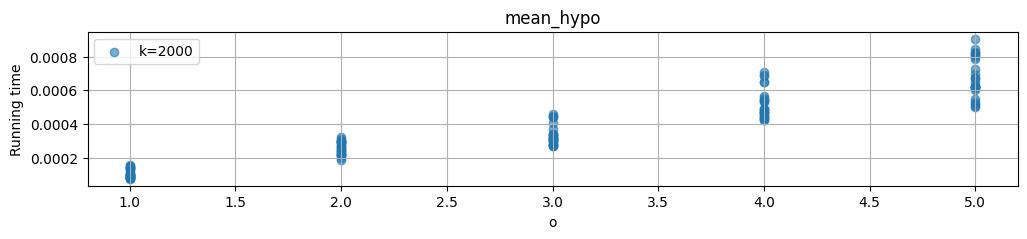

****************************************************************************************************
* n=10^8; k=5000; multiplier=0.5


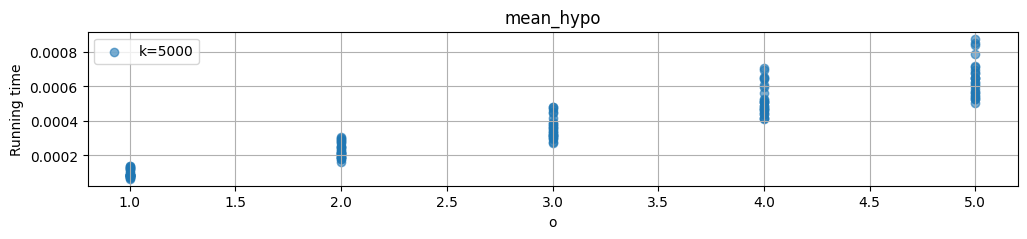

****************************************************************************************************
* n=10^8; k=10000; multiplier=1


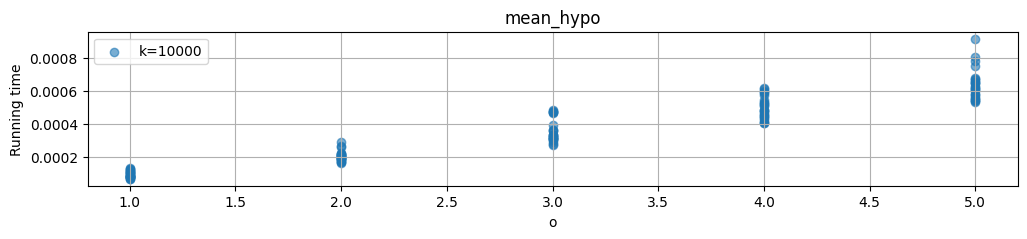

****************************************************************************************************
* n=10^8; k=20000; multiplier=2


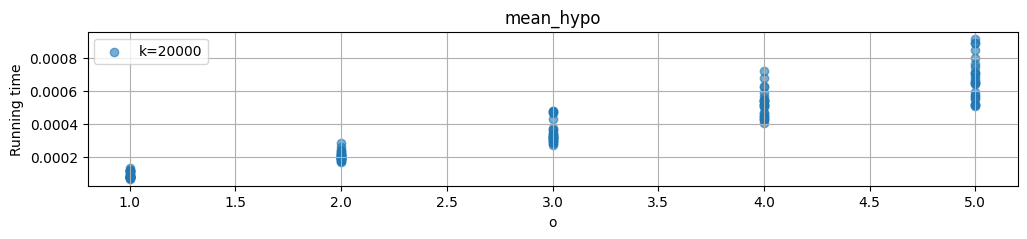

****************************************************************************************************
* n=10^10; k=50000; multiplier=0.5


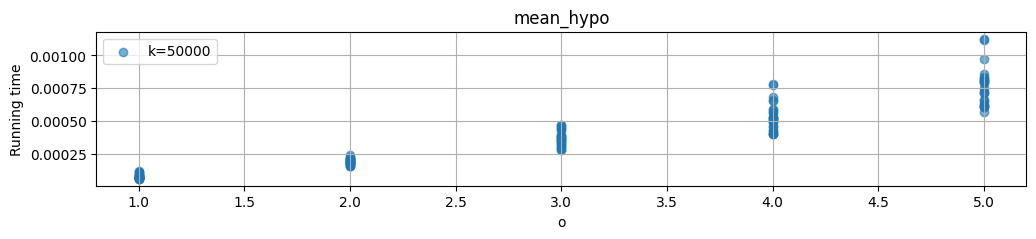

****************************************************************************************************
* n=10^10; k=100000; multiplier=1


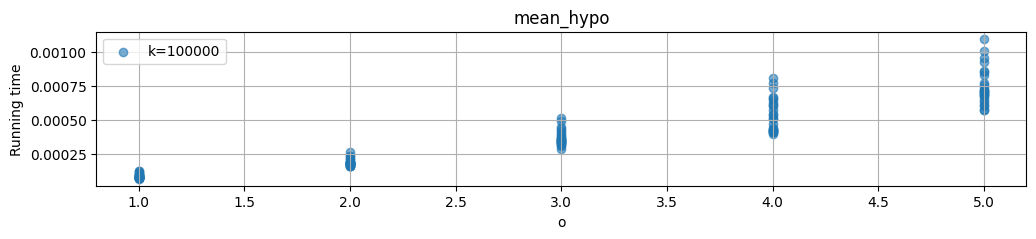

****************************************************************************************************
* n=10^10; k=200000; multiplier=2


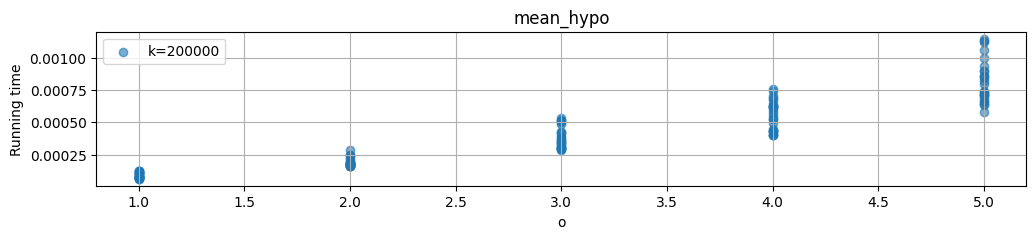

****************************************************************************************************
* n=10^12; k=500000; multiplier=0.5


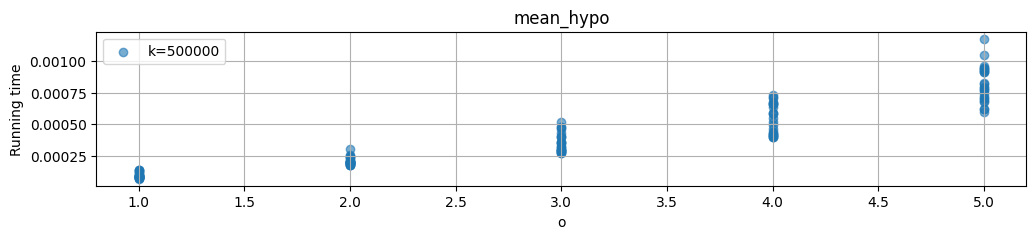

****************************************************************************************************
* n=10^12; k=1000000; multiplier=1


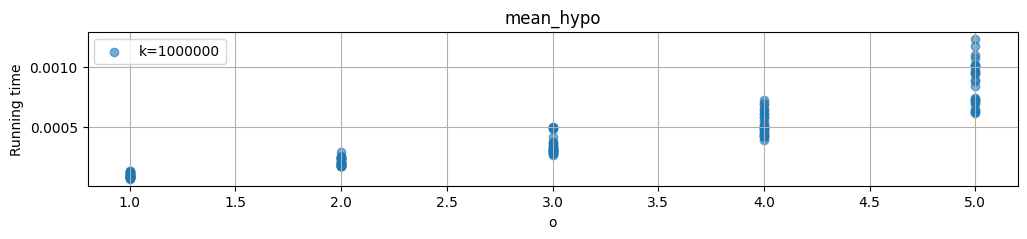

****************************************************************************************************
* n=10^12; k=2000000; multiplier=2


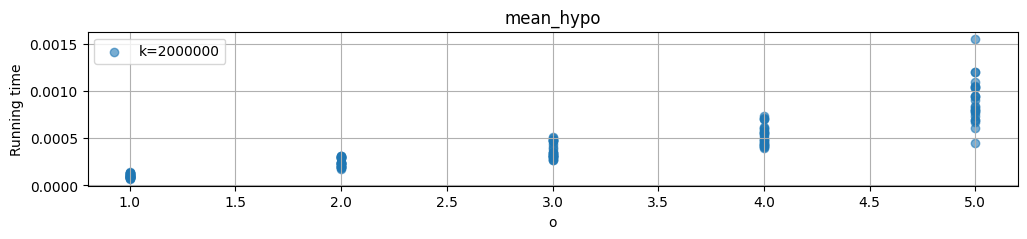

****************************************************************************************************
* n=10^14; k=5000000; multiplier=0.5


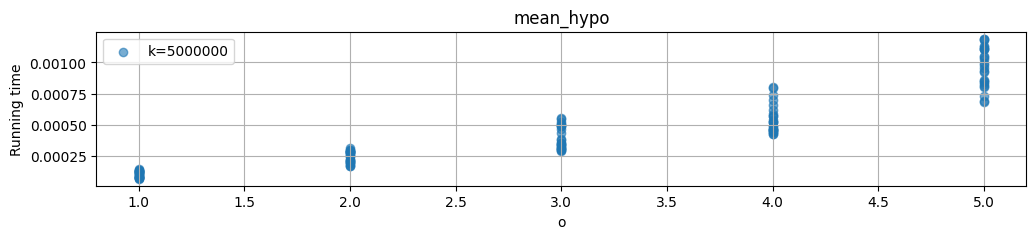

****************************************************************************************************
* n=10^14; k=10000000; multiplier=1


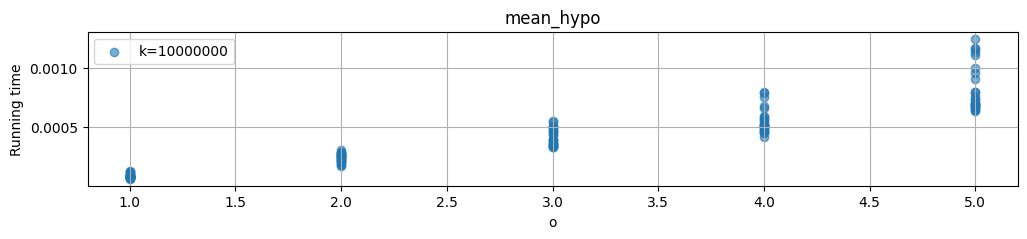

****************************************************************************************************
* n=10^14; k=20000000; multiplier=2


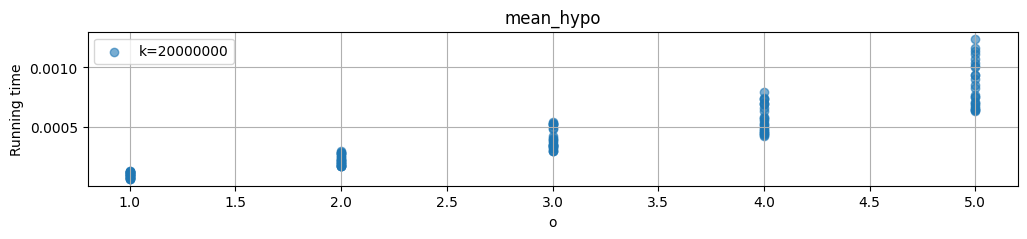

In [17]:
val_name = 'mean'
data_fn = f'running_time_data_compute_{val_name}.json'
direct_func_name = f'{val_name}_direct_np'
indirect_func_name = f'{val_name}_hypo'
data_direct_np = read_data(data_fn, direct_func_name, {'k': 1, 'o': 2})
data_hypo = read_data(data_fn, indirect_func_name, {'k': 1, 'o': 2})

# print('#'*100 + '\n# fixed o\n' + '#' * 100)
# for o in [1,2,3,4,5]:
#     print('*'*100 + f'\n* o={o}')
#     plot_scatter(data_direct_np, direct_func_name,   'o', o)
#     # plot_scatter(data_hypo,      indirect_func_name, 'o', o)

print('#'*100 + '\n# fixed k\n' + '#' * 100)
for exponent in range(2, 15, 2):
    n = 10**exponent
    for multiplier in [1/2, 1, 2]:
        k = round(math.sqrt(n) * multiplier)
        print('*'*100 + f'\n* n=10^{exponent}; k={k}; multiplier={multiplier}')
        # plot_scatter(data_direct_np, direct_func_name,   'k', k)
        plot_scatter(data_hypo,      indirect_func_name, 'k', k)

In [ ]:
import numpy as np
import numpy.typing as npt
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from scipy.optimize import minimize, differential_evolution
from dataclasses import dataclass
from typing import Dict, Optional, Union
import warnings

# Suppress sklearn numerical warnings
warnings.filterwarnings('ignore', message='Ill-conditioned matrix')
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

@dataclass
class PowerLawModel:
    """Power law regression model for algorithm performance prediction."""
    coefficients: np.ndarray
    intercept: float
    additive_constant: float
    r2_score: float
    parameter_names: list
    has_additive_constant: bool = False
    fitting_summary: str = ""
    
    def predict(self, **kwargs) -> Union[np.ndarray, float]:
        """Predict performance using parameter values."""
        # Ensure all required parameters are provided
        for param in self.parameter_names:
            if param not in kwargs:
                raise ValueError(f"Missing required parameter: {param}")
        
        if self.has_additive_constant:
            # Direct calculation for additive constant model
            # Performance = a × n^b1 × k^b2 × ... + c
            a = self.coefficients[0]  # First coefficient is 'a'
            exponents = self.coefficients[1:]  # Rest are exponents
            
            # Handle single vs batch prediction
            param_values = [kwargs[param] for param in self.parameter_names]
            param_arrays = [np.atleast_1d(val) for val in param_values]
            
            # Calculate power law part
            power_law_part = a * np.ones(len(param_arrays[0]))
            for i, param_array in enumerate(param_arrays):
                power_law_part *= param_array ** exponents[i]
            
            result = power_law_part + self.additive_constant
            
            # Return scalar if input was scalar
            if all(len(arr) == 1 for arr in param_arrays):
                return float(result[0])
            return result
            
        else:
            # Original log-space calculation
            features = np.column_stack([np.log(np.maximum(kwargs[param], 1e-8)) 
                                       for param in self.parameter_names])
            
            # Handle single prediction vs batch prediction
            if features.shape[0] == 1:
                log_prediction = self.intercept + np.dot(features[0], self.coefficients)
                return np.exp(log_prediction)
            else:
                log_predictions = self.intercept + np.dot(features, self.coefficients)
                return np.exp(log_predictions)
    
    def get_formula(self) -> str:
        """Return human-readable power law formula."""
        if self.has_additive_constant:
            a = self.coefficients[0]
            exponents = self.coefficients[1:]
            terms = [f"{param}**{exp:.3f}" for param, exp in zip(self.parameter_names, exponents)]
            power_part = f"{a:.10f} * " + " * ".join(terms)
            return f"Performance = {power_part} + {self.additive_constant}"
        else:
            a = np.exp(self.intercept)
            terms = [f"{param}**{coef:.3f}" for param, coef in zip(self.parameter_names, self.coefficients)]
            return f"Performance = {a:.10f} * " + " * ".join(terms)

class PowerLawRegressor:
    """Robust power law regression with flexible parameter handling and additive constant option."""
    
    def __init__(self):
        self.model = None
        self.parameter_names = None
    
    def fit(self, data: Dict[str, np.ndarray], performance: np.ndarray, 
            parameters: Optional[list] = None, 
            include_additive_constant: bool = False) -> PowerLawModel:
        """
        Fit power law model to performance data.
        
        Args:
            data: Dictionary with parameter names as keys and arrays as values
            performance: Array of performance measurements
            parameters: List of parameter names to include in model (None = all)
            include_additive_constant: If True, fit model with additive constant
        """
        if parameters is None:
            parameters = list(data.keys())
        
        self.parameter_names = parameters
        
        if include_additive_constant:
            return self._fit_with_additive_constant(data, performance, parameters)
        else:
            return self._fit_standard(data, performance, parameters)
    
    def _fit_standard(self, data: Dict[str, np.ndarray], performance: np.ndarray,
                     parameters: list) -> PowerLawModel:
        """Fit standard power law model without additive constant."""
        # Create log-transformed feature matrix
        epsilon = 1e-8
        features = np.column_stack([
            np.log(np.maximum(data[param], epsilon)) for param in parameters
        ])
        log_performance = np.log(np.maximum(performance, epsilon))
        
        # Fit ridge regression for numerical stability
        ridge = Ridge(alpha=1e-6)
        ridge.fit(features, log_performance)
        
        # Calculate R² score
        log_predictions = ridge.predict(features)
        r2 = r2_score(log_performance, log_predictions)
        
        return PowerLawModel(
            coefficients=ridge.coef_,
            intercept=ridge.intercept_,
            additive_constant=0.0,
            r2_score=r2,
            parameter_names=parameters,
            has_additive_constant=False,
            fitting_summary=""
        )
    
    def _fit_with_additive_constant(self, data: Dict[str, np.ndarray], performance: np.ndarray,
                                   parameters: list) -> PowerLawModel:
        """Fit power law model with additive constant using non-linear optimization."""
        
        # First get the standard power law fit as baseline
        standard_model = self._fit_standard(data, performance, parameters)
        standard_predictions = standard_model.predict(**{param: data[param] for param in parameters})
        standard_sse = np.sum((performance - standard_predictions) ** 2)
        
        summary_parts = []
        summary_parts.append(f"Standard power law R²: {standard_model.r2_score:.4f}")
        
        def objective_function(params):
            """Objective function to minimize: sum of squared residuals."""
            try:
                a = params[0]  # Multiplicative coefficient
                exponents = params[1:-1]  # Exponents for each parameter
                c = params[-1]  # Additive constant
                
                # Calculate predicted performance: a × n^b1 × k^b2 × ... + c
                predicted = a * np.ones(len(performance))
                for i, param in enumerate(parameters):
                    predicted *= data[param] ** exponents[i]
                predicted += c
                
                # Return sum of squared errors
                residuals = performance - predicted
                return np.sum(residuals ** 2)
                
            except (OverflowError, ValueError, FloatingPointError):
                return 1e15  # Return large value for invalid parameters
        
        # Strategy 1: Start from standard power law solution (c=0)
        a_init = np.exp(standard_model.intercept)
        exponents_init = standard_model.coefficients.copy()
        initial_guess_1 = [a_init] + list(exponents_init) + [0.0]
        
        # Strategy 2: Try small positive additive constant
        mean_performance = np.mean(performance)
        initial_guess_2 = [a_init] + list(exponents_init) + [0.01 * mean_performance]
        
        # Strategy 3: Try negative additive constant
        initial_guess_3 = [a_init] + list(exponents_init) + [-0.01 * mean_performance]
        
        # Set reasonable bounds
        bounds = []
        bounds.append((1e-15, 1e15))  # Bounds for coefficient 'a'
        for _ in parameters:
            bounds.append((-10.0, 10.0))  # Bounds for exponents
        bounds.append((-2*np.max(performance), 2*np.max(performance)))  # Bounds for additive constant
        
        # Try multiple optimization approaches with different starting points
        best_result = None
        best_objective = standard_sse  # Start with standard model performance
        best_method = "none"
        
        optimization_attempts = [
            (initial_guess_1, "standard_start"),
            (initial_guess_2, "positive_constant_start"),
            (initial_guess_3, "negative_constant_start")
        ]
        
        for initial_guess, description in optimization_attempts:
            # L-BFGS-B optimization
            try:
                result = minimize(objective_function, initial_guess, method='L-BFGS-B', 
                                bounds=bounds, options={'maxiter': 1000})
                if result.success and result.fun < best_objective:
                    best_result = result
                    best_objective = result.fun
                    best_method = f"L-BFGS-B with {description}"
            except:
                pass
            
            # Try differential evolution from this starting point
            try:
                # Use tighter bounds around the initial guess for more focused search
                tight_bounds = []
                for i, val in enumerate(initial_guess):
                    if i < len(bounds):
                        lower = max(bounds[i][0], val * 0.1)
                        upper = min(bounds[i][1], val * 10.0)
                        tight_bounds.append((lower, upper))
                    else:
                        tight_bounds.append(bounds[i])
                
                result = differential_evolution(objective_function, tight_bounds, 
                                              seed=42, maxiter=200)
                if result.success and result.fun < best_objective:
                    best_result = result
                    best_objective = result.fun
                    best_method = f"Differential evolution with {description}"
            except:
                pass
        
        # If no improvement found, return standard model
        if best_result is None or best_objective >= standard_sse * 0.999:  # Allow tiny numerical differences
            summary_parts.append("No improvement found with additive constant")
            standard_model.fitting_summary = "; ".join(summary_parts)
            return standard_model
        
        # Extract fitted parameters
        a_fitted = best_result.x[0]
        exponents_fitted = best_result.x[1:-1]
        c_fitted = best_result.x[-1]
        
        # Calculate R² score for the fitted model
        predicted_performance = a_fitted * np.ones(len(performance))
        for i, param in enumerate(parameters):
            predicted_performance *= data[param] ** exponents_fitted[i]
        predicted_performance += c_fitted
        
        r2 = r2_score(performance, predicted_performance)
        
        # Verify this actually improved over standard model
        if r2 < standard_model.r2_score * 0.999:  # Allow tiny numerical differences
            summary_parts.append(f"Additive constant R² ({r2:.4f}) worse than standard, using standard model")
            standard_model.fitting_summary = "; ".join(summary_parts)
            return standard_model
        
        improvement = r2 - standard_model.r2_score
        summary_parts.append(f"Additive constant R²: {r2:.4f} (improvement: +{improvement:.4f}, method: {best_method})")
        
        # Package results
        coefficients = np.array([a_fitted] + list(exponents_fitted))
        
        return PowerLawModel(
            coefficients=coefficients,
            intercept=0.0,  # Not used for additive constant model
            additive_constant=c_fitted,
            r2_score=r2,
            parameter_names=parameters,
            has_additive_constant=True,
            fitting_summary="; ".join(summary_parts)
        )
    
    def cross_validate(self, data: Dict[str, np.ndarray], performance: np.ndarray, 
                      parameters: Optional[list] = None, cv: int = 5,
                      include_additive_constant: bool = False) -> Dict:
        """Perform cross-validation for power law model."""
        if parameters is None:
            parameters = list(data.keys())
        
        if include_additive_constant:
            # For additive constant models, we need custom CV since sklearn doesn't support our model
            return self._cross_validate_additive_constant(data, performance, parameters, cv)
        else:
            # Standard CV for log-linear models
            epsilon = 1e-8
            features = np.column_stack([
                np.log(np.maximum(data[param], epsilon)) for param in parameters
            ])
            log_performance = np.log(np.maximum(performance, epsilon))
            
            ridge = Ridge(alpha=1e-6)
            scores = cross_val_score(ridge, features, log_performance, cv=cv, scoring='r2')
            
            return {
                'mean_r2': scores.mean(),
                'std_r2': scores.std(),
                'individual_scores': scores
            }
    
    def _cross_validate_additive_constant(self, data: Dict[str, np.ndarray], 
                                         performance: np.ndarray, parameters: list, 
                                         cv: int) -> Dict:
        """Custom cross-validation for additive constant models."""
        from sklearn.model_selection import KFold
        
        kf = KFold(n_splits=cv, shuffle=True, random_state=42)
        scores = []
        
        for train_idx, val_idx in kf.split(performance):
            # Split data
            train_data = {param: data[param][train_idx] for param in parameters}
            train_performance = performance[train_idx]
            val_data = {param: data[param][val_idx] for param in parameters}
            val_performance = performance[val_idx]
            
            # Fit model on training data
            try:
                train_model = self._fit_with_additive_constant(train_data, train_performance, parameters)
                
                # Predict on validation data
                val_predictions = train_model.predict(**val_data)
                
                # Calculate R² score
                r2 = r2_score(val_performance, val_predictions)
                scores.append(r2)
                
            except:
                # If fitting fails, append a poor score
                scores.append(-1.0)
        
        scores = np.array(scores)
        return {
            'mean_r2': scores.mean(),
            'std_r2': scores.std(),
            'individual_scores': scores
        }

def analyze_power_law_regression(data: Dict[str, npt.NDArray[np.float64]], 
                               scenarios: Optional[list] = None,
                               include_additive_constant: bool = False,
                               show_fitting_details: bool = False) -> Dict:
    """
    Comprehensive power law regression analysis for different parameter scenarios.
    
    Args:
        data: Dictionary containing parameter arrays and performance
        scenarios: List of parameter combinations to analyze
        include_additive_constant: If True, fit models with additive constants
        show_fitting_details: If True, show detailed fitting information
    """
    if scenarios is None:
        scenarios = [
            ['k', 'o'],
        ]
    
    regressor = PowerLawRegressor()
    results = {}
    
    performance = data['performance']
    
    for scenario in scenarios:
        # Fit model
        model = regressor.fit(data, performance, parameters=scenario, 
                            include_additive_constant=include_additive_constant)
        print(f"Fitted model: {model.get_formula()}")
        print(f"R² score: {model.r2_score:.4f}", end = '; ')
        
        # Show fitting summary if requested or if using additive constants
        if (show_fitting_details or include_additive_constant) and model.fitting_summary:
            print(f"\nFitting details: {model.fitting_summary}")
        
        # Cross-validation
        cv_results = regressor.cross_validate(data, performance, parameters=scenario,
                                            include_additive_constant=include_additive_constant)
        print(f"Cross-validation R²: {cv_results['mean_r2']:.4f} ± {cv_results['std_r2']:.4f}")
        
        results[tuple(scenario)] = {
            'model': model,
            'cv_results': cv_results
        }
    
    return results

# Example usage comparing both approaches
def compare_models_with_and_without_constant(data, parameters):
    """Compare standard power law vs power law with additive constant."""
    
    print("=== Standard Power Law Model ===")
    results_standard = analyze_power_law_regression(data, [parameters], include_additive_constant=False)
    
    print("\n=== Power Law with Additive Constant ===")
    results_additive = analyze_power_law_regression(data, [parameters], include_additive_constant=True)
    
    return results_standard, results_additive

# For your existing workflow, you can now use:
# results = analyze_power_law_regression(data, [['k', 'o']], include_additive_constant=True)

def read_data(fn: str, function_name: str, parameter_names: dict[str, int]) -> dict[str, npt.NDArray[np.float64]]:
    import json
    with open(fn, 'r') as f:
        json_data = json.load(f)
    assert function_name in json_data.keys()
    samples = json_data[function_name]
    # sample1 = samples[0]
    # assert len(sample1) == len(parameter_names) + 1
    samples_arr = np.array(samples, dtype=np.float64)
    
    data = {}
    for parameter_name, i in parameter_names.items():
        data[parameter_name] = samples_arr[:,i]
    data['performance'] = samples_arr[:,-1]
    
    # from pprint import pprint
    # print('data:')
    # pprint(data)
    return data


alg_names = ['var_direct_np', 'var_hypo']

print('*'*80)
print(f'* fit k: performance of var_direct_np')
data = read_data('running_time_data_compute_var.json', 'var_direct_np', {'k': 1})
# results_full = analyze_power_law_regression(data, [['k']], include_additive_constant=False)
results_full = analyze_power_law_regression(data, [['k']], include_additive_constant=True)

print('\n' + '*'*80)
print(f'* fit o: performance of var_hypo')
data = read_data('running_time_data_compute_var.json', 'var_hypo', {'o': 2})
# results_full = analyze_power_law_regression(data, [['o']], include_additive_constant=False)
results_full = analyze_power_law_regression(data, [['o']], include_additive_constant=True)

for alg_name in alg_names:
    print('\n' + '*'*80)
    print(f'* fit k, o: performance of {alg_name}')
    data = read_data('running_time_data_compute_var.json', alg_name, {'k': 1, 'o': 2})
    # results_full = analyze_power_law_regression(data, [['k', 'o']], include_additive_constant=False)
    results_full = analyze_power_law_regression(data, [['k', 'o']], include_additive_constant=True)

for alg_name in alg_names:
    print('\n' + '*'*80)
    print(f'* fit n, k, o, g: performance of {alg_name}')
    data = read_data('running_time_data_compute_var.json', alg_name, {'n': 0, 'k': 1, 'o': 2, 'g': 3})
    # results_full = analyze_power_law_regression(data, [['n', 'k', 'o', 'g']], include_additive_constant=False)
    results_full = analyze_power_law_regression(data, [['n', 'k', 'o', 'g']], include_additive_constant=True)

alg_names = ['mean_direct_np', 'mean_hypo']

print('*'*80)
print(f'* fit k: performance of mean_direct_np')
data = read_data('running_time_data_compute_mean.json', 'mean_direct_np', {'k': 1})
# results_full = analyze_power_law_regression(data, [['k']], include_additive_constant=False)
results_full = analyze_power_law_regression(data, [['k']], include_additive_constant=True)

print('\n' + '*'*80)
print(f'* fit o: performance of mean_hypo')
data = read_data('running_time_data_compute_mean.json', 'mean_hypo', {'o': 2})
# results_full = analyze_power_law_regression(data, [['o']], include_additive_constant=False)
results_full = analyze_power_law_regression(data, [['o']], include_additive_constant=True)

for alg_name in alg_names:
    print('\n' + '*'*80)
    print(f'* fit k, o: performance of {alg_name}')
    data = read_data('running_time_data_compute_mean.json', alg_name, {'k': 1, 'o': 2})
    # results_full = analyze_power_law_regression(data, [['k', 'o']], include_additive_constant=False)
    results_full = analyze_power_law_regression(data, [['k', 'o']], include_additive_constant=True)

for alg_name in alg_names[1:]:
    print('\n' + '*'*80)
    print(f'* fit n, k, o: performance of {alg_name}')
    data = read_data('running_time_data_compute_mean.json', alg_name, {'n': 0, 'k': 1, 'o': 2})
    # results_full = analyze_power_law_regression(data, [['n', 'k', 'o', 'g']], include_additive_constant=False)
    results_full = analyze_power_law_regression(data, [['n', 'k', 'o']], include_additive_constant=True)

********************************************************************************
* fit k: performance of var_direct_np
Fitted model: Performance = 0.0000001132 * k**0.949 + 0.0
R² score: 0.9851; 
Fitting details: Standard power law R²: 0.9188; Additive constant R²: 0.9851 (improvement: +0.0663, method: Differential evolution with standard_start)
Cross-validation R²: 0.9848 ± 0.0013

********************************************************************************
* fit o: performance of var_hypo
Fitted model: Performance = 0.0004486019 * o**1.908
R² score: 0.8164; 
Fitting details: Standard power law R²: 0.8164; Additive constant R² (0.5670) worse than standard, using standard model
Cross-validation R²: 0.5293 ± 0.0171

********************************************************************************
* fit k, o: performance of var_direct_np
Fitted model: Performance = 0.0000001077 * k**0.948 * o**0.065 + 0.0
R² score: 0.9868; 
Fitting details: Standard power law R²: 0.9189; Additive cons

C:\Users\pexat\AppData\Local\Temp\ipykernel_55144\1933389814.py:165: RuntimeWarning: overflow encountered in square
  return np.sum(residuals ** 2)
c:\Dropbox\git\ppsim-rust\.venv\Lib\site-packages\scipy\optimize\_numdiff.py:596: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0


Fitted model: Performance = 0.0000010955 * n**0.023 * k**0.696 * o**0.052 * g**-0.024
R² score: 0.9189; 
Fitting details: Standard power law R²: 0.9189; Additive constant R² (0.4613) worse than standard, using standard model


C:\Users\pexat\AppData\Local\Temp\ipykernel_55144\1933389814.py:165: RuntimeWarning: overflow encountered in square
  return np.sum(residuals ** 2)
c:\Dropbox\git\ppsim-rust\.venv\Lib\site-packages\scipy\optimize\_numdiff.py:596: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0
C:\Users\pexat\AppData\Local\Temp\ipykernel_55144\1933389814.py:165: RuntimeWarning: overflow encountered in square
  return np.sum(residuals ** 2)
c:\Dropbox\git\ppsim-rust\.venv\Lib\site-packages\scipy\optimize\_numdiff.py:596: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0
C:\Users\pexat\AppData\Local\Temp\ipykernel_55144\1933389814.py:165: RuntimeWarning: overflow encountered in square
  return np.sum(residuals ** 2)
c:\Dropbox\git\ppsim-rust\.venv\Lib\site-packages\scipy\optimize\_numdiff.py:596: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0
C:\Users\pexat\AppData\Local\Temp\ipykernel_55144\1933389814.py:165: RuntimeWarning: ove

Cross-validation R²: 0.4584 ± 0.0161

********************************************************************************
* fit n, k, o, g: performance of var_hypo
Fitted model: Performance = 0.0007757784 * n**-0.036 * k**0.001 * o**1.908 * g**0.120
R² score: 0.8959; 
Fitting details: Standard power law R²: 0.8959; Additive constant R² (0.7391) worse than standard, using standard model
Cross-validation R²: 0.7123 ± 0.0197
********************************************************************************
* fit k: performance of mean_direct_np
Fitted model: Performance = 0.0000001063 * k**0.949 + 0.0
R² score: 0.9857; 
Fitting details: Standard power law R²: 0.9225; Additive constant R²: 0.9857 (improvement: +0.0632, method: Differential evolution with standard_start)
Cross-validation R²: 0.9858 ± 0.0036

********************************************************************************
* fit o: performance of mean_hypo
Fitted model: Performance = 0.0001101719 * o**1.238
R² score: 0.7768; 
Fitt

In [6]:
import time
trials = 10**3

def actual_mean_direct_np(n: int, k: int, o: int, g: int) -> float:
    times = []
    # for _ in tqdm(range(trials)):
    for _ in range(trials):
        start = time.perf_counter()
        gamma.mean_direct_np(n, k, o, g)
        end = time.perf_counter()
        times.append(end - start)
    # return sum(times) / len(times)
    return float(np.median(times))

def actual_mean_hypo(n: int, k: int, o: int, g: int) -> float:
    times = []
    # for _ in tqdm(range(trials)):
    for _ in range(trials):
        start = time.perf_counter()
        gamma.mean_hypo(n, k, o, g)
        end = time.perf_counter()
        times.append(end - start)
    # return sum(times) / len(times)
    return float(np.median(times))

def actual_var_direct_np(n: int, k: int, o: int, g: int) -> float:
    times = []
    # for _ in tqdm(range(trials)):
    for _ in range(trials):
        start = time.perf_counter()
        gamma.var_direct_np(n, k, o, g)
        end = time.perf_counter()
        times.append(end - start)
    # return sum(times) / len(times)
    return float(np.median(times))

def actual_var_hypo(n: int, k: int, o: int, g: int) -> float:
    times = []
    # for _ in tqdm(range(trials)):
    for _ in range(trials):
        start = time.perf_counter()
        gamma.var_hypo(n, k, o, g)
        end = time.perf_counter()
        times.append(end - start)
    # return sum(times) / len(times)
    return float(np.median(times))

  0%|          | 0/25 [00:00<?, ?it/s]

n for o=1, g=1:   0%|          | 0/9 [00:00<?, ?it/s]

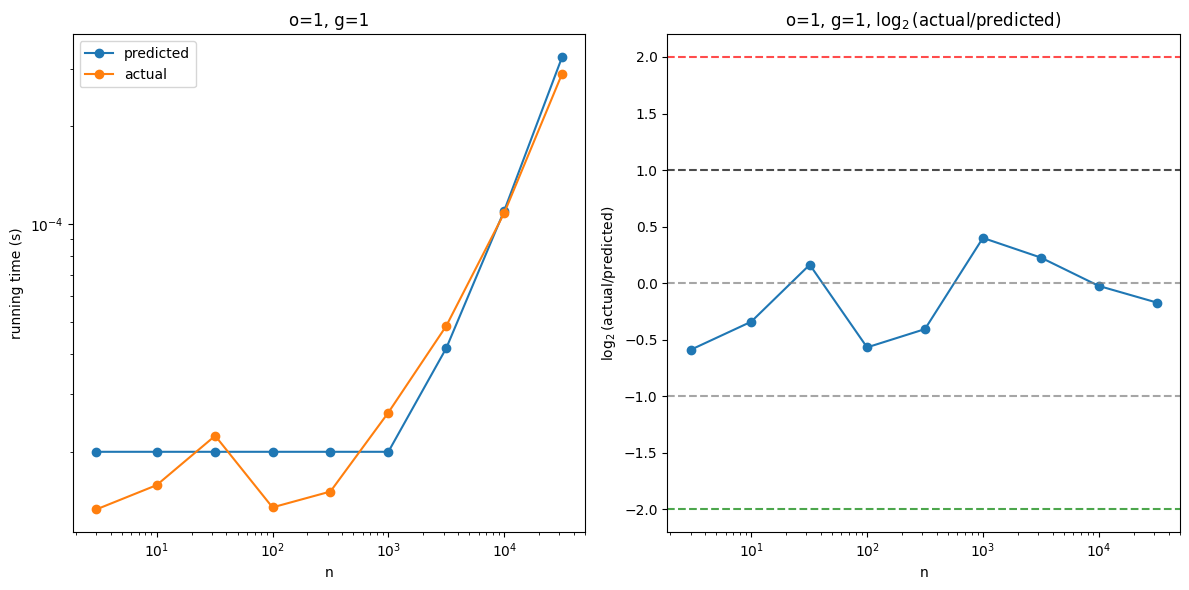

n for o=2, g=1:   0%|          | 0/9 [00:00<?, ?it/s]

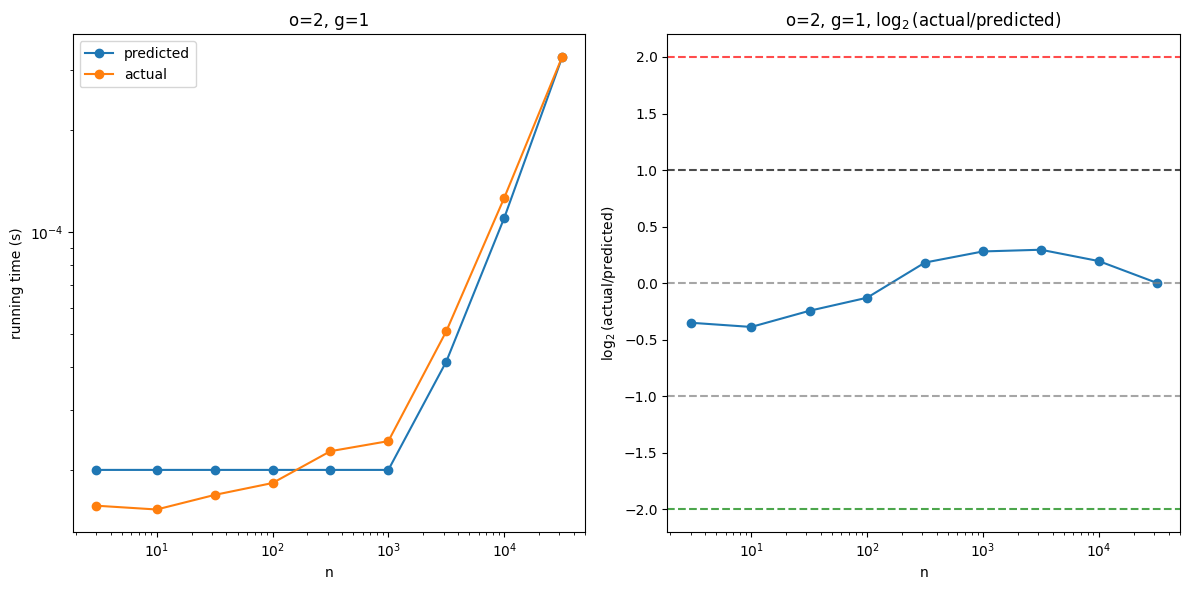

n for o=3, g=1:   0%|          | 0/9 [00:00<?, ?it/s]

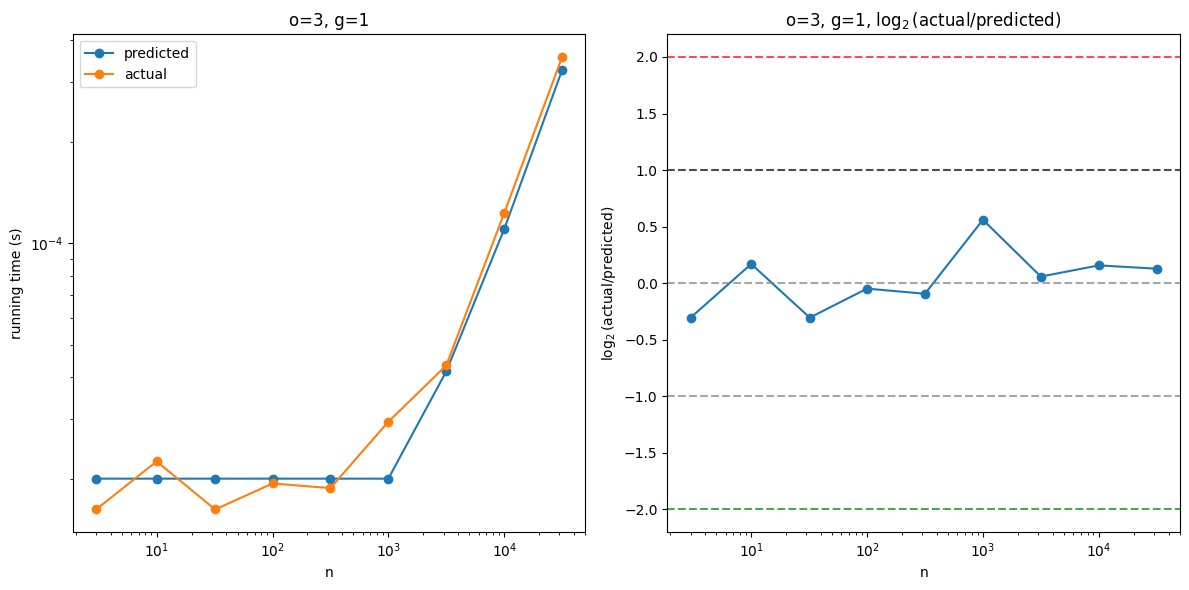

n for o=4, g=1:   0%|          | 0/9 [00:00<?, ?it/s]

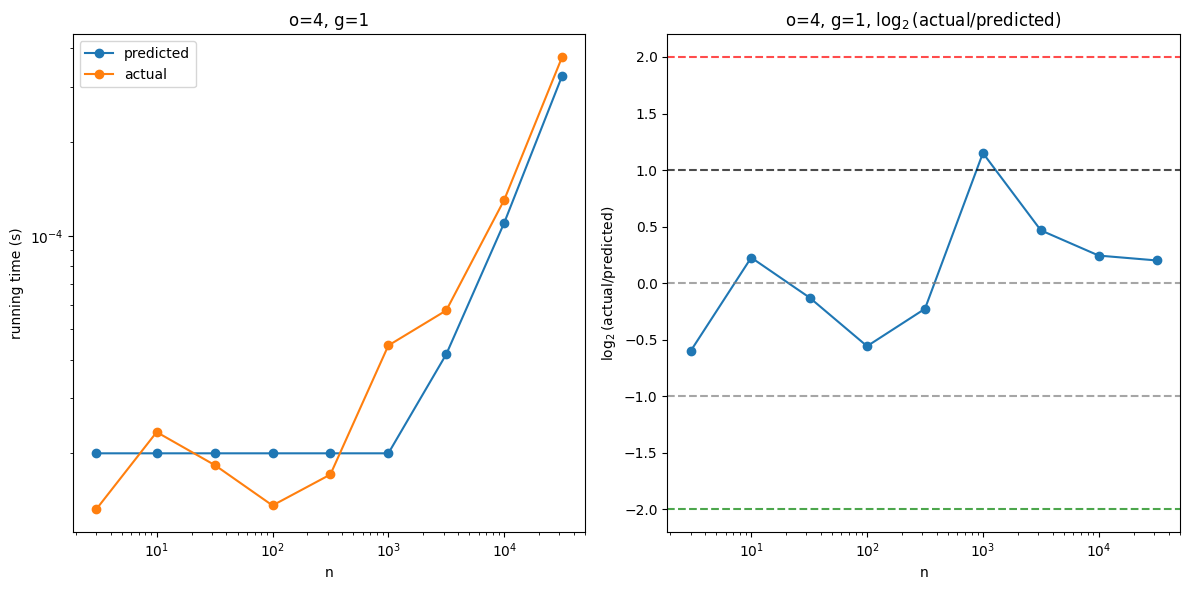

n for o=5, g=1:   0%|          | 0/9 [00:00<?, ?it/s]

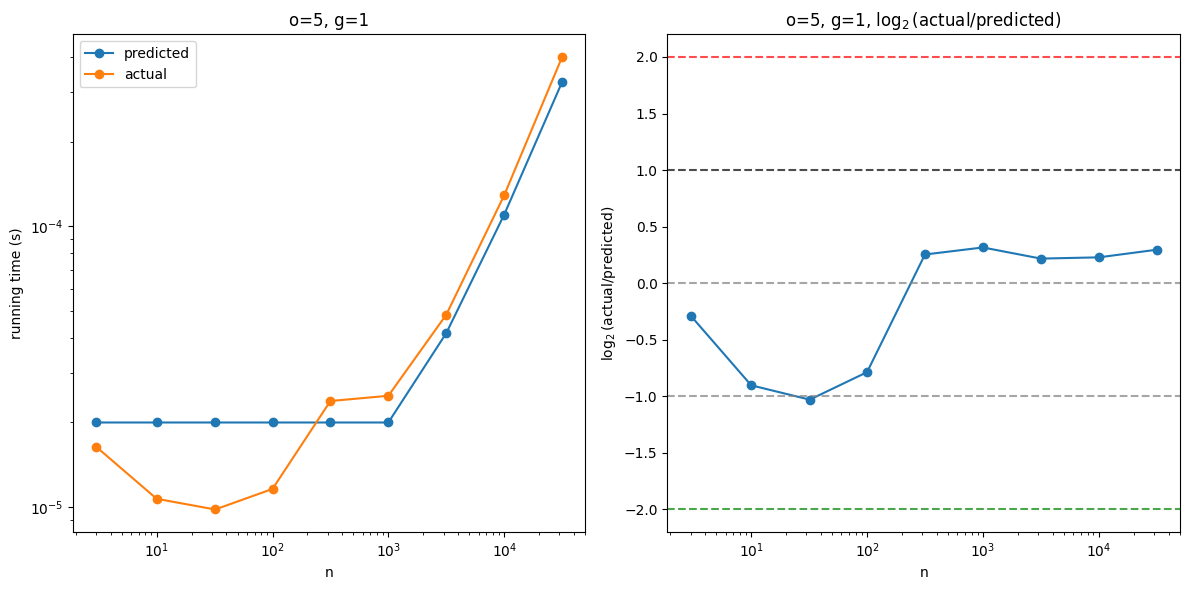

n for o=1, g=2:   0%|          | 0/9 [00:00<?, ?it/s]

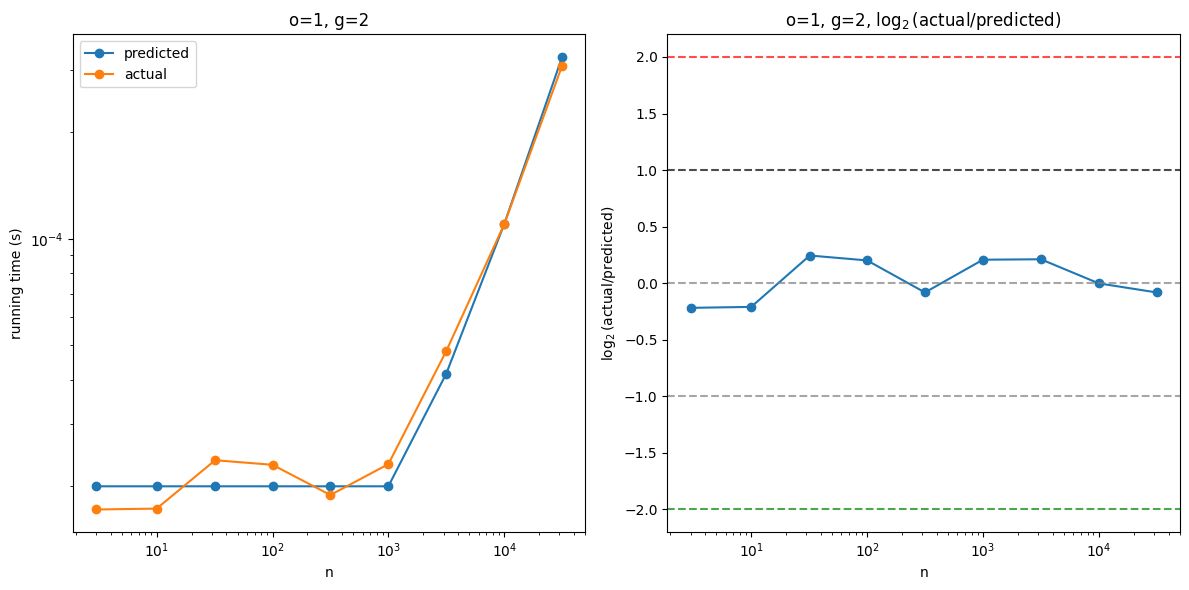

n for o=2, g=2:   0%|          | 0/9 [00:00<?, ?it/s]

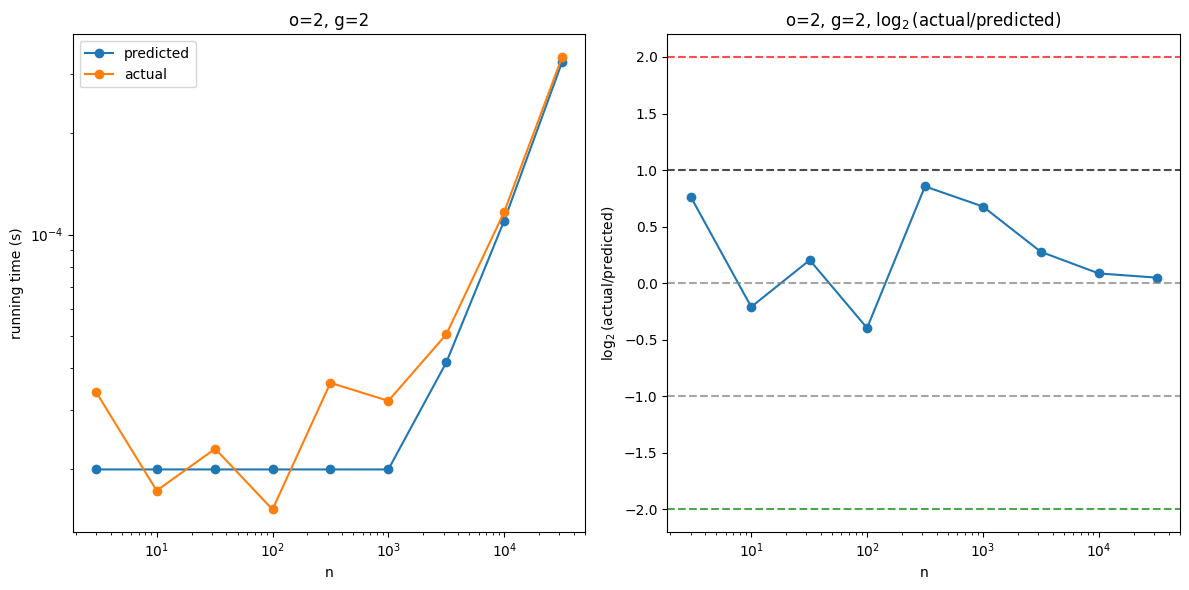

n for o=3, g=2:   0%|          | 0/9 [00:00<?, ?it/s]

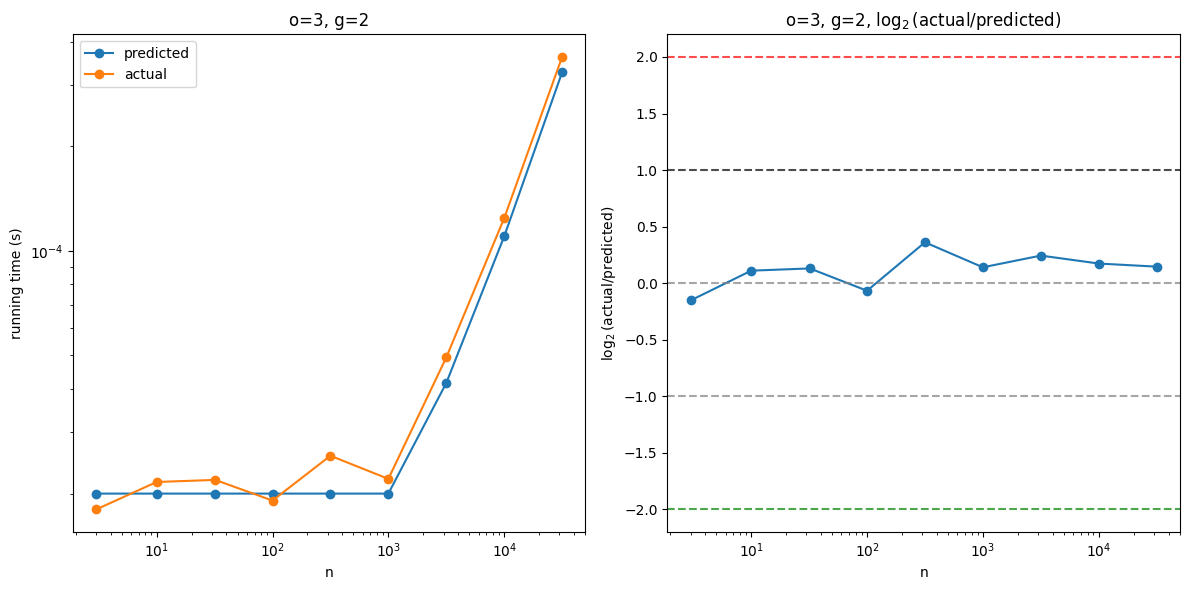

n for o=4, g=2:   0%|          | 0/9 [00:00<?, ?it/s]

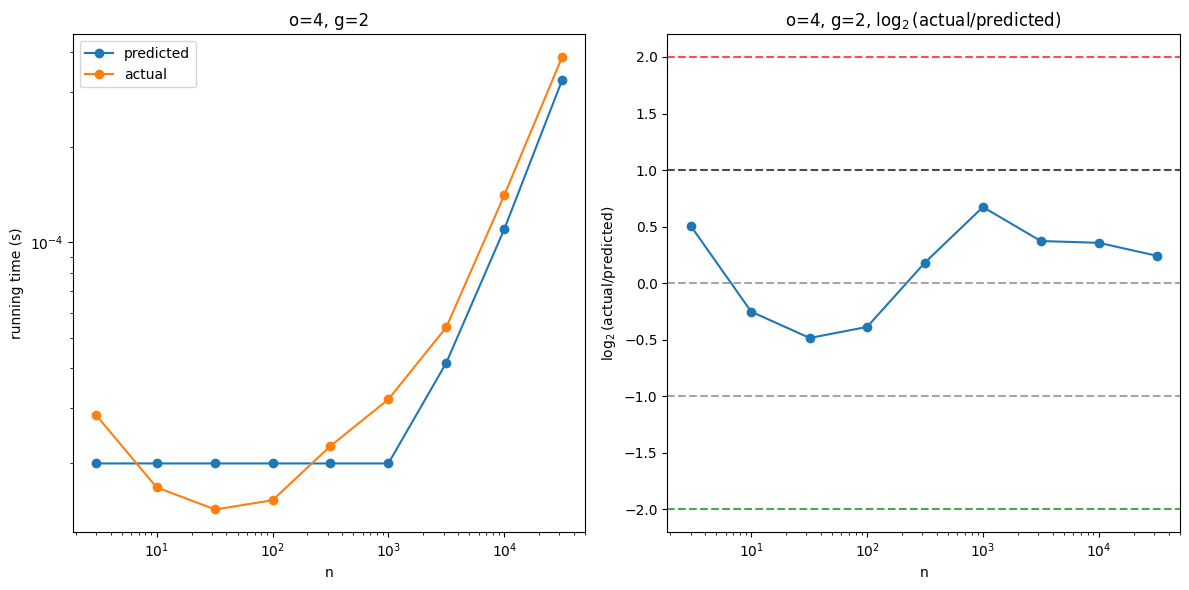

n for o=5, g=2:   0%|          | 0/9 [00:00<?, ?it/s]

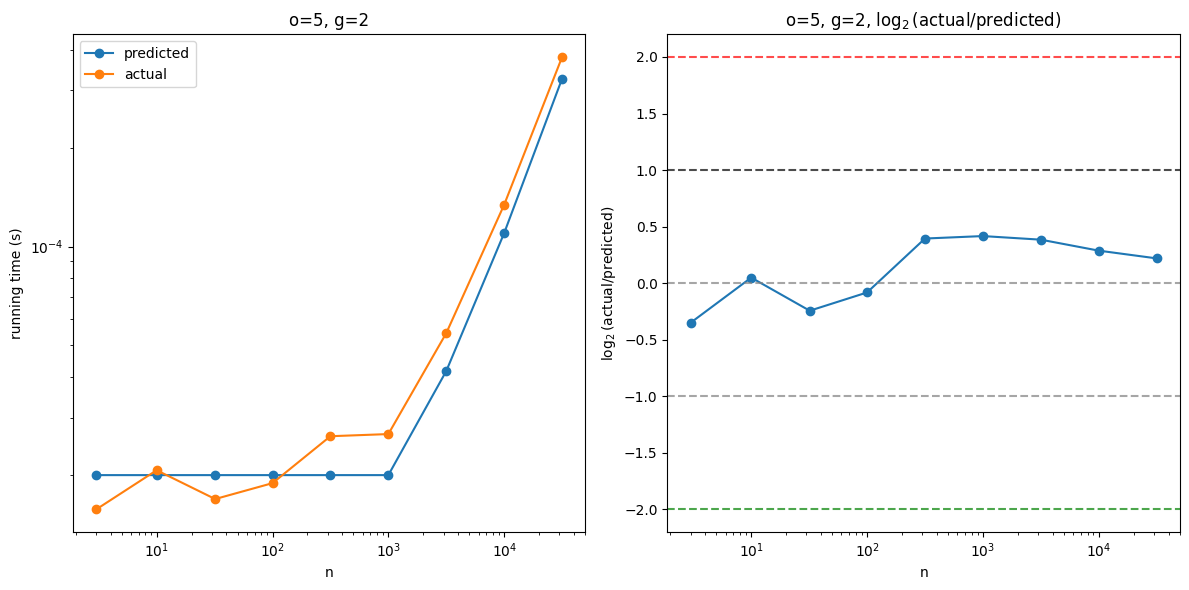

n for o=1, g=3:   0%|          | 0/9 [00:00<?, ?it/s]

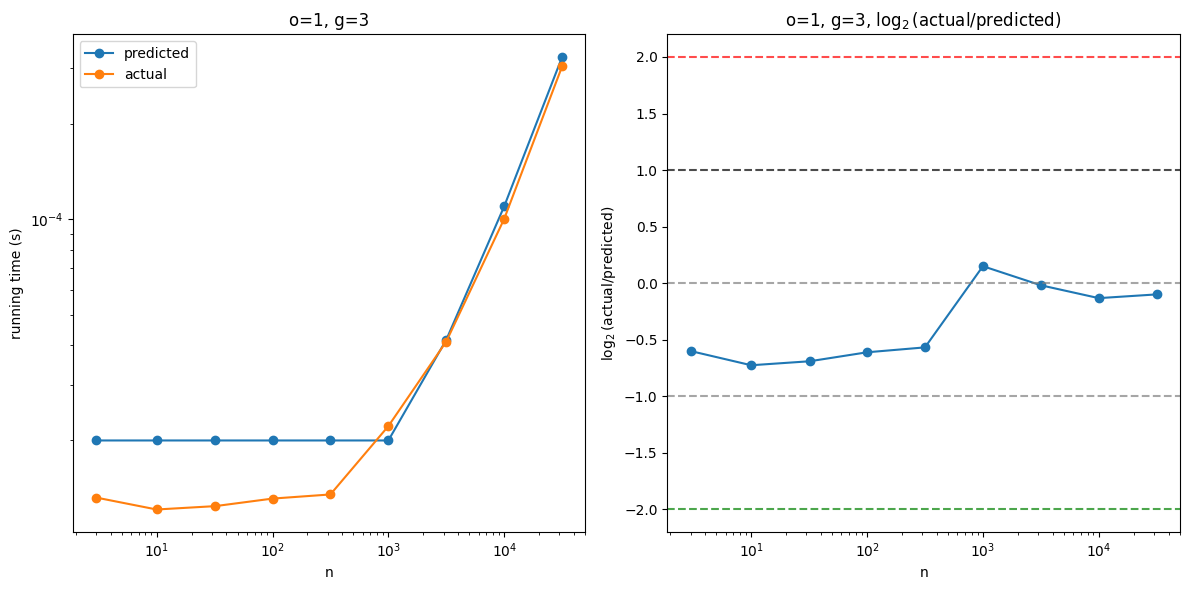

n for o=2, g=3:   0%|          | 0/9 [00:00<?, ?it/s]

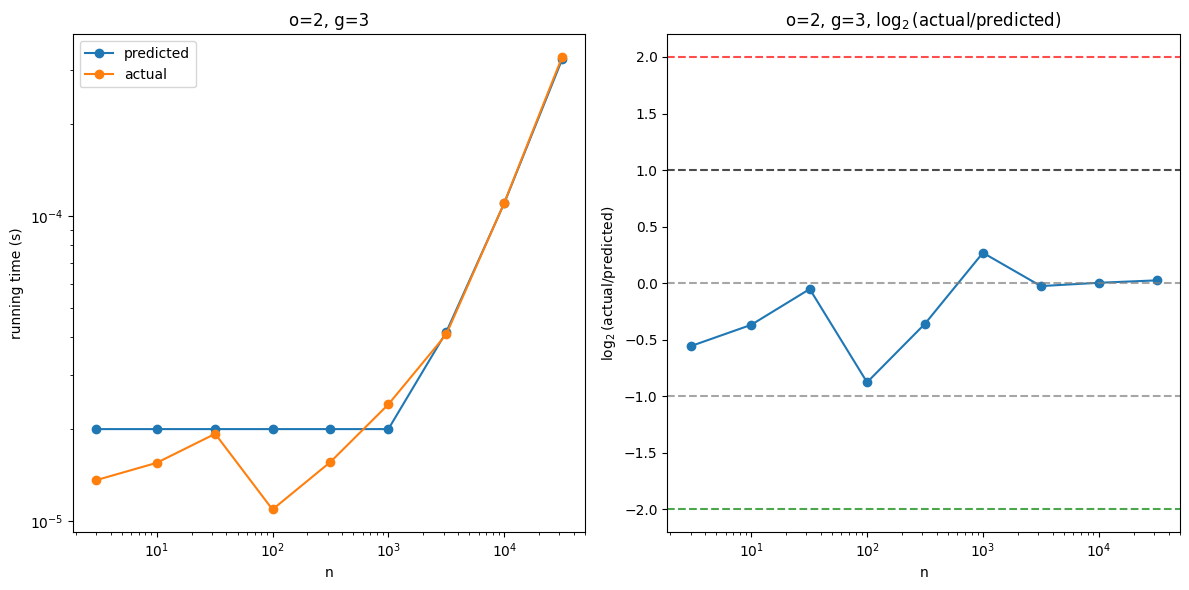

n for o=3, g=3:   0%|          | 0/9 [00:00<?, ?it/s]

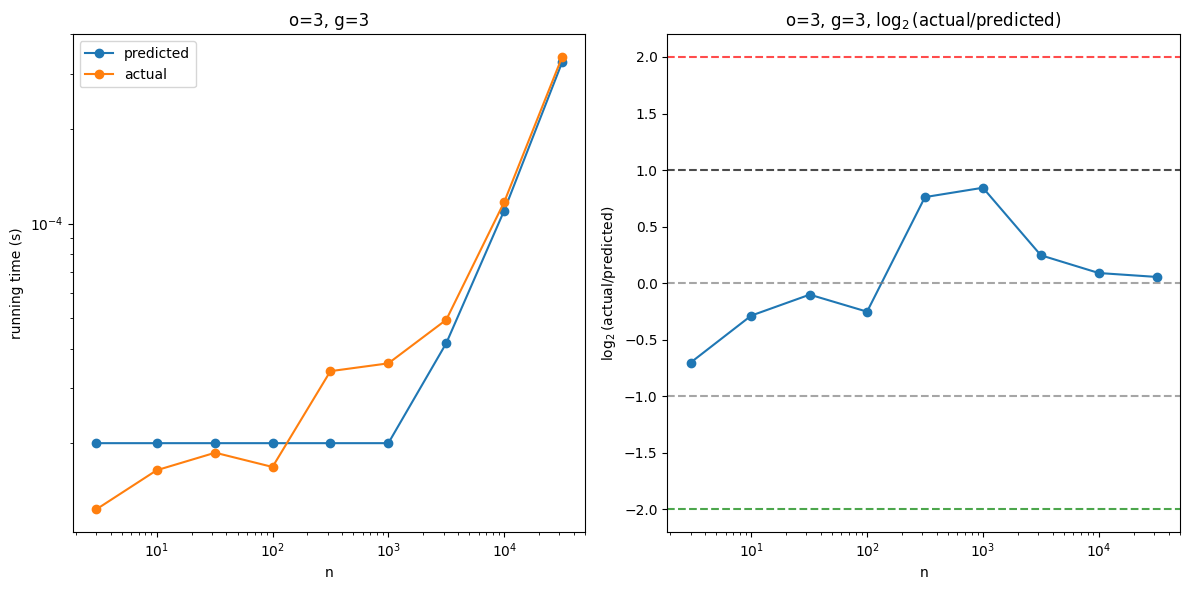

n for o=4, g=3:   0%|          | 0/9 [00:00<?, ?it/s]

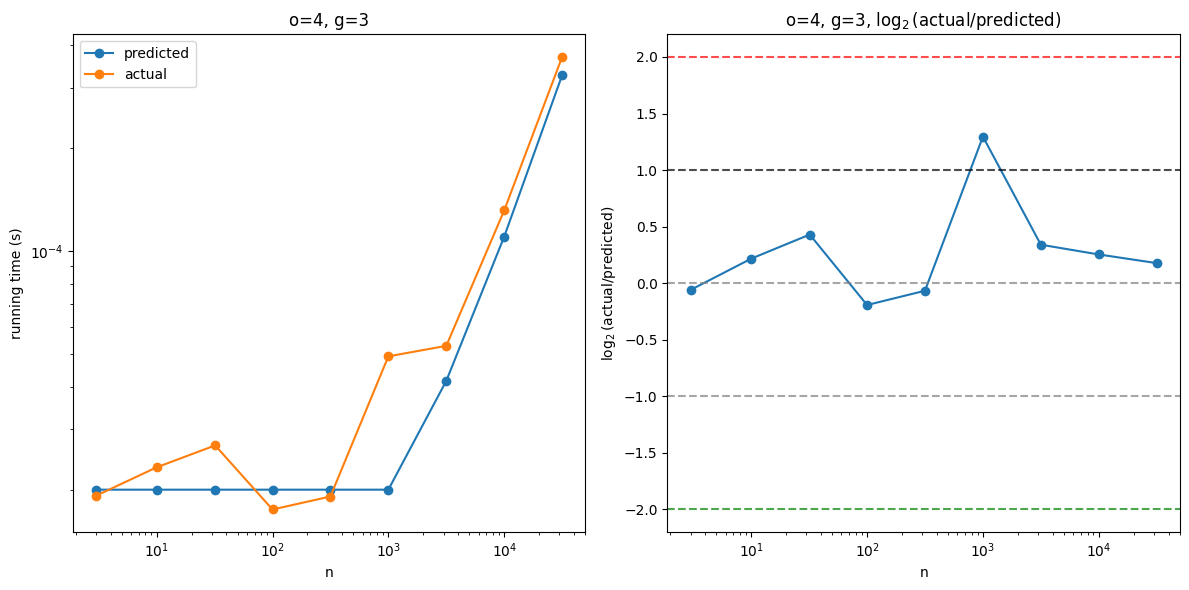

n for o=5, g=3:   0%|          | 0/9 [00:00<?, ?it/s]

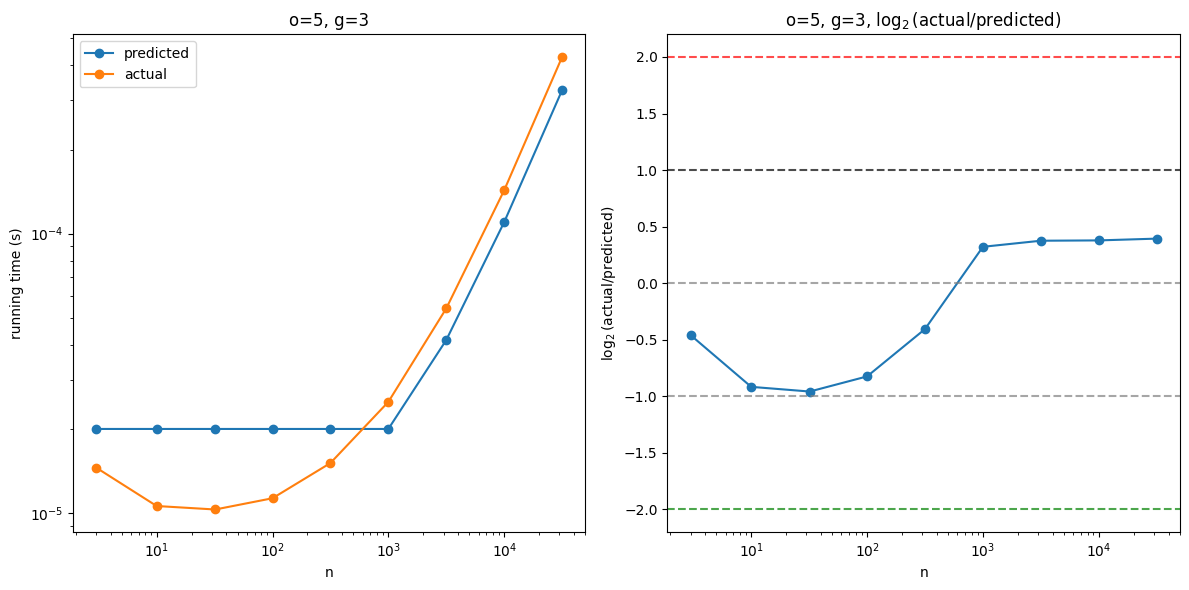

n for o=1, g=4:   0%|          | 0/9 [00:00<?, ?it/s]

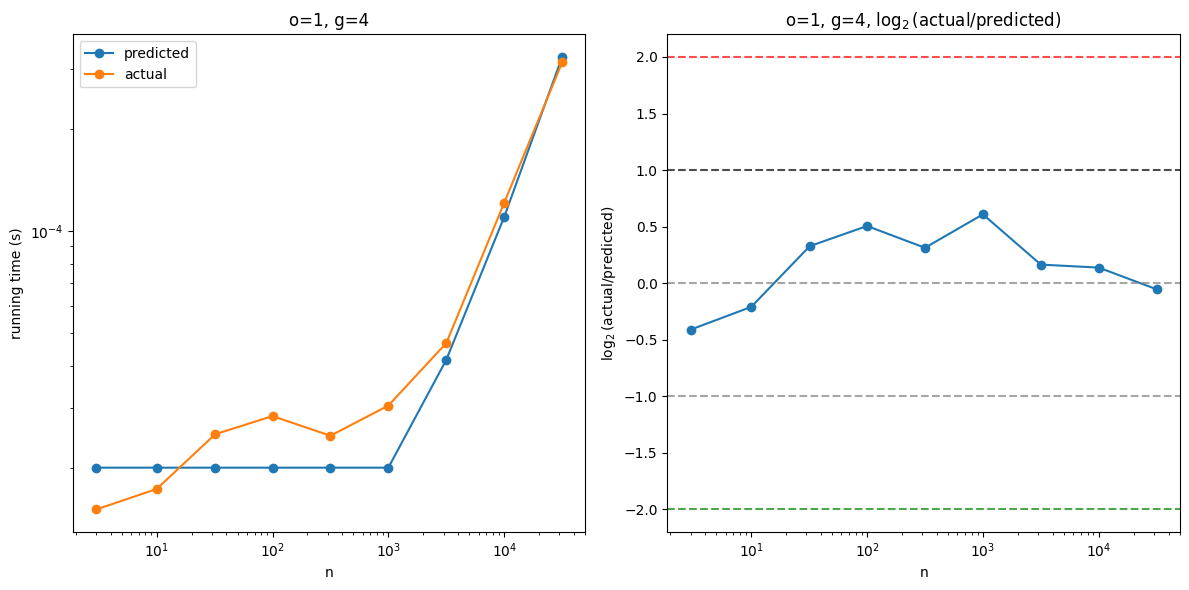

n for o=2, g=4:   0%|          | 0/9 [00:00<?, ?it/s]

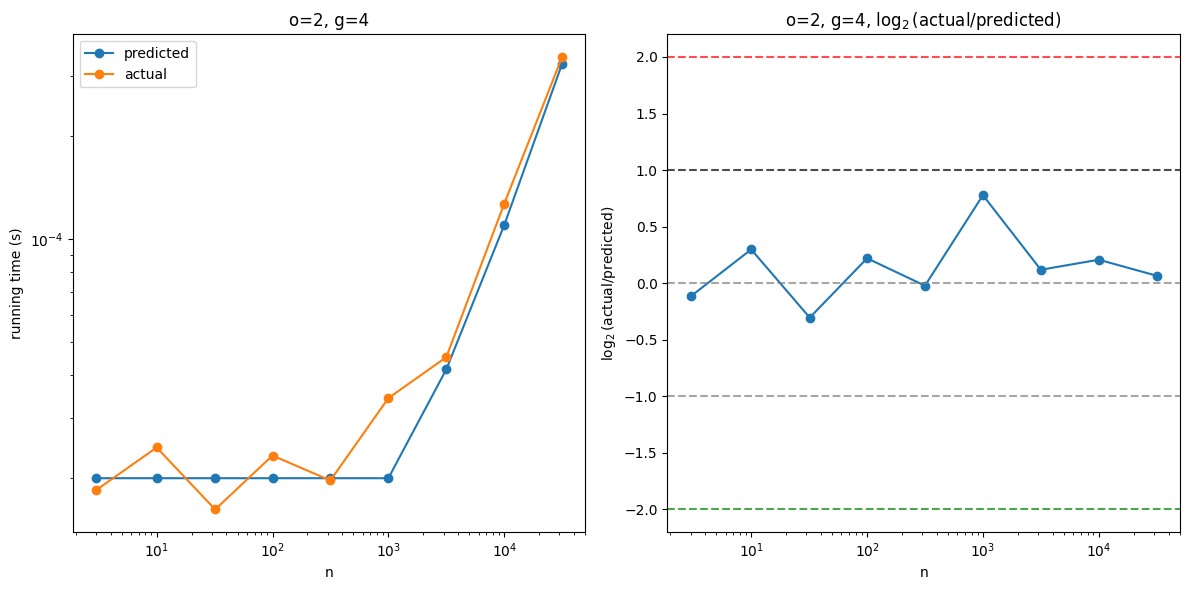

n for o=3, g=4:   0%|          | 0/9 [00:00<?, ?it/s]

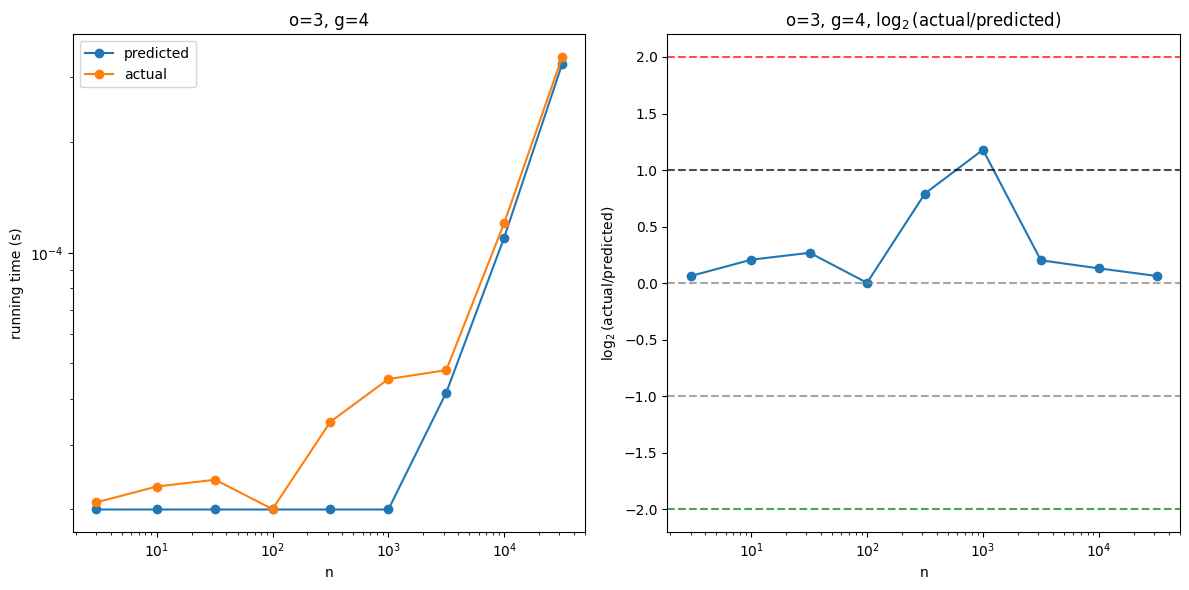

n for o=4, g=4:   0%|          | 0/9 [00:00<?, ?it/s]

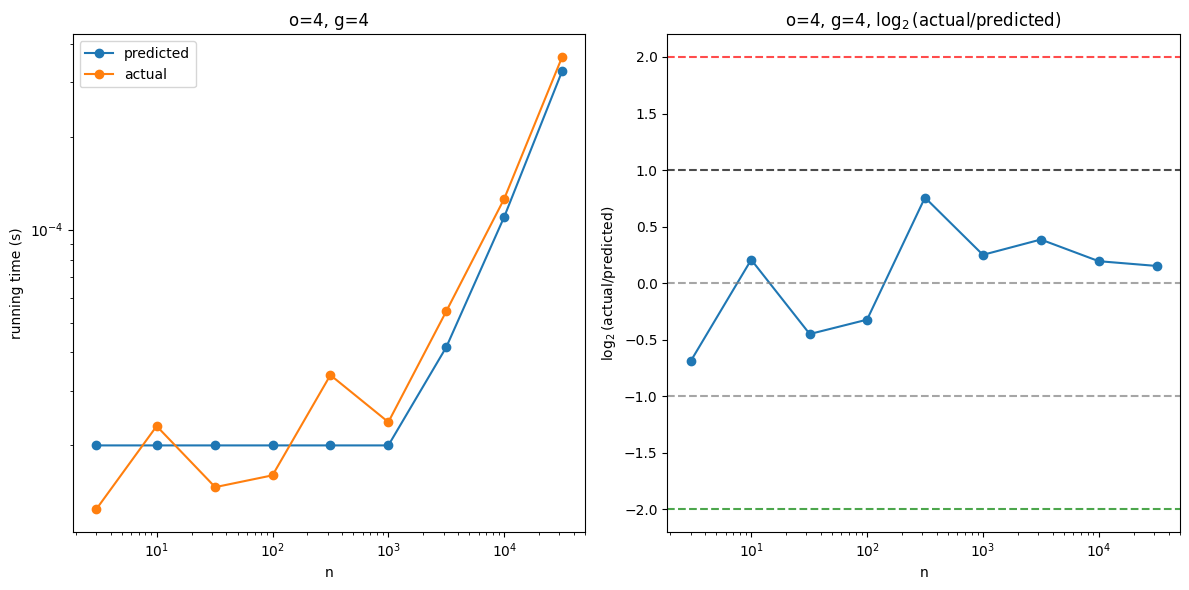

n for o=5, g=4:   0%|          | 0/9 [00:00<?, ?it/s]

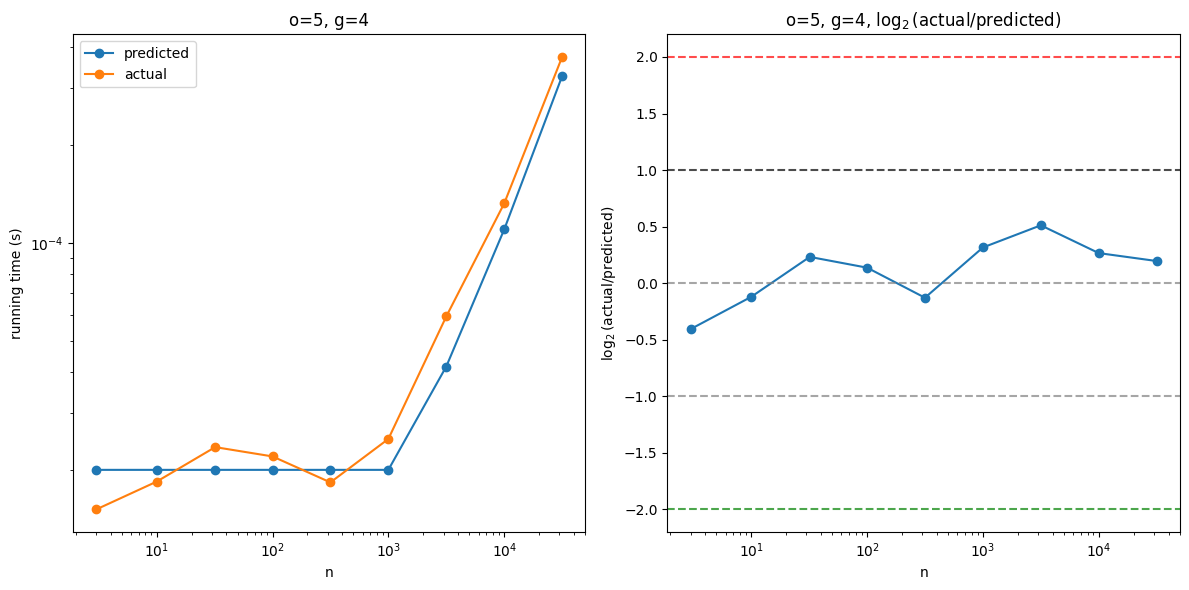

n for o=1, g=5:   0%|          | 0/9 [00:00<?, ?it/s]

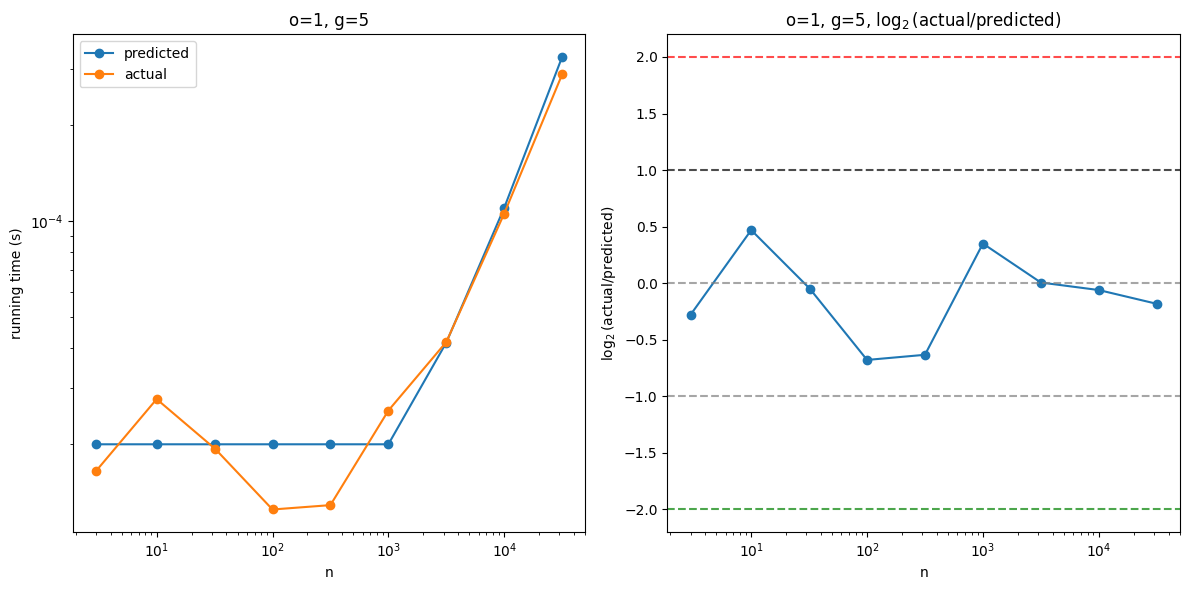

n for o=2, g=5:   0%|          | 0/9 [00:00<?, ?it/s]

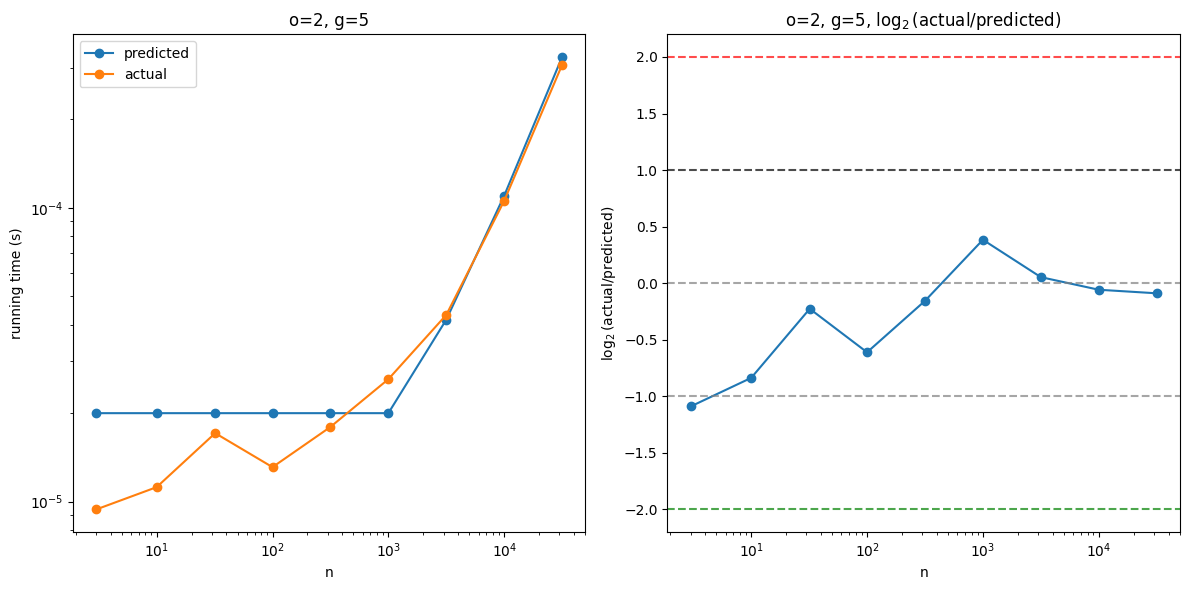

n for o=3, g=5:   0%|          | 0/9 [00:00<?, ?it/s]

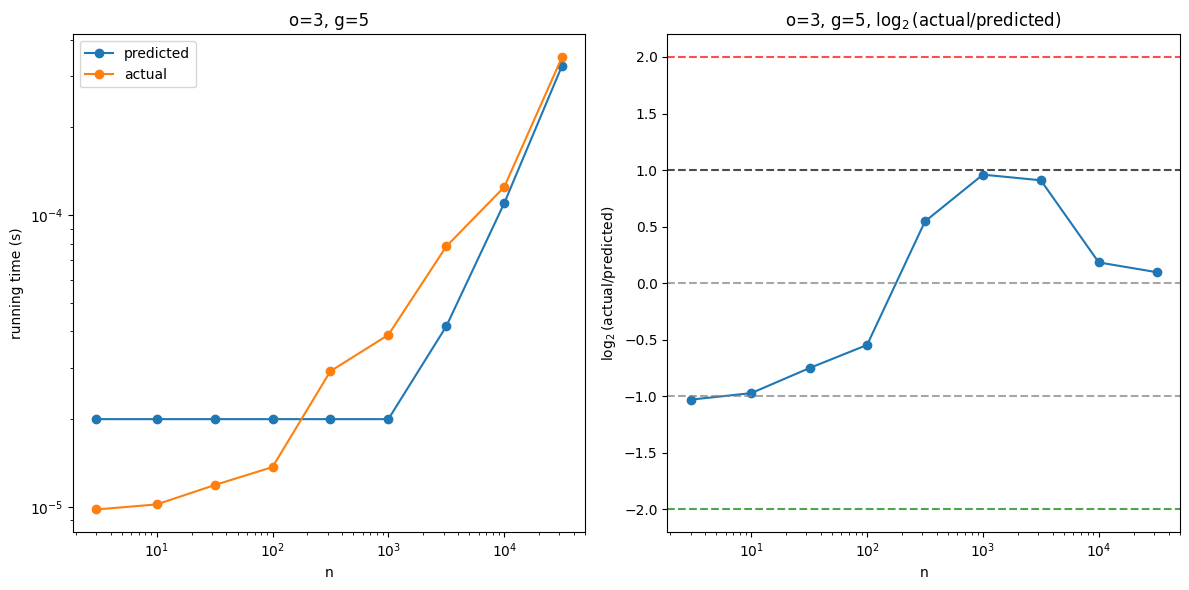

n for o=4, g=5:   0%|          | 0/9 [00:00<?, ?it/s]

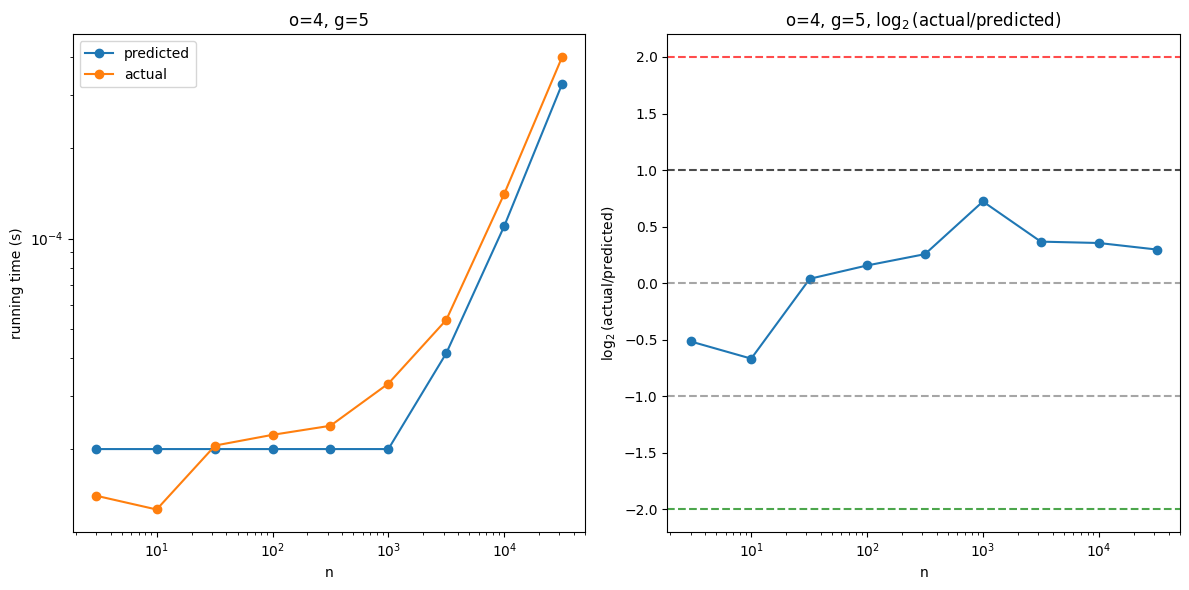

n for o=5, g=5:   0%|          | 0/9 [00:00<?, ?it/s]

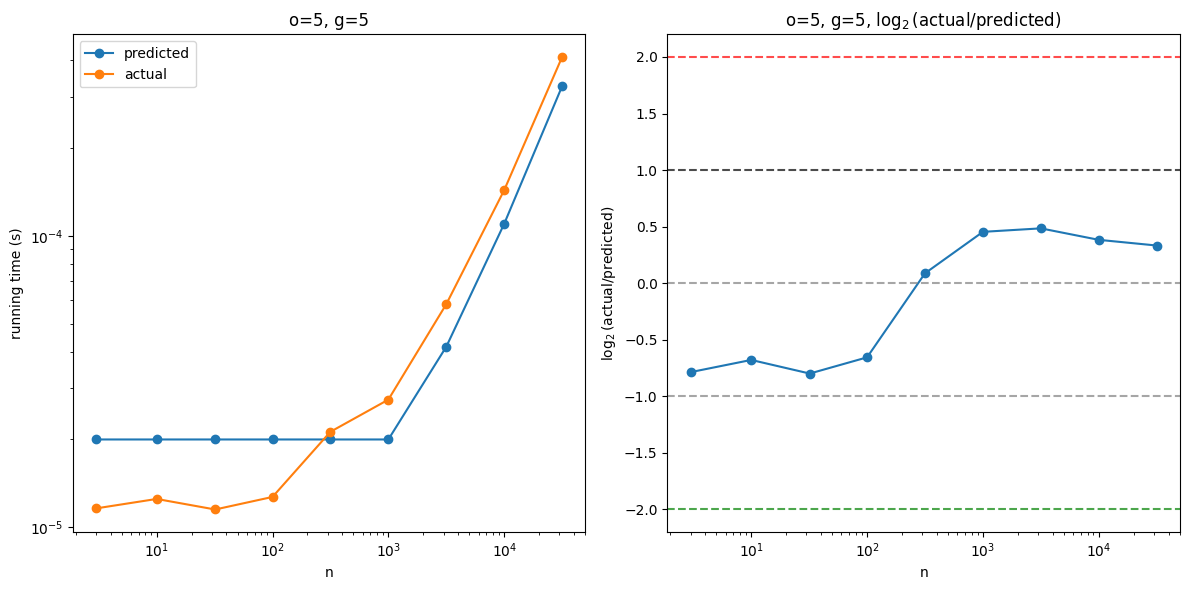

In [ ]:
import math
import importlib
import gamma
importlib.reload(gamma)
import numpy as np
from tqdm.contrib import itertools
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

def predicted_mean_direct_np(k: int) -> float:
    offset = 10**-5
    if k < 10**3:
        return 10**-5 + offset
    return k * 10**-8 + offset

ns = []
ks = []
ps_pred = []
ps_act = []

min_exponent = 1
max_exponent = 9
for g, o in itertools.product(range(1,6), range(1,6)):
    # for n in tqdm(list(range(10**2, max_n1 + n_inc, n_inc)), f'n for {o=}, {g=}'):
    for exponent in tqdm(list(range(min_exponent, max_exponent+1)), f'n for {o=}, {g=}'):
        n = 10**exponent
        if exponent == min_exponent:
            ns = []
            ks = []
            ps_pred = []
            ps_act = []
        k = round(math.sqrt(n))
        ks.append(k)
        ps_pred.append(predicted_mean_direct_np(k))
        ps_act.append(actual_mean_direct_np(n,k,o,g))
        if exponent == max_exponent:
            # Create figure and subplots first
            plt.figure(figsize=(12, 6))

            # First subplot - predicted vs actual
            plt.subplot(1, 2, 1)
            plt.plot(ks, ps_pred, 'o-', label='predicted')
            plt.plot(ks, ps_act, 'o-', label='actual')
            plt.legend()
            plt.xlabel('n')
            plt.ylabel('running time (s)')
            plt.xscale('log')
            plt.yscale('log')
            plt.title(f'{o=}, {g=}')

            # Second subplot - log ratio
            plt.subplot(1, 2, 2)
            # log_ratio = np.log2(np.array(ps_pred) / np.array(ps_act))
            log_ratio = np.log2(np.array(ps_act) / np.array(ps_pred))
            plt.plot(ks, log_ratio, 'o-')
            plt.axhline(y=0, color='gray', linestyle='--', alpha=0.7)
            plt.axhline(y=1, color='black', linestyle='--', alpha=0.7)
            plt.axhline(y=-1, color='gray', linestyle='--', alpha=0.7)
            plt.axhline(y=2, color='red', linestyle='--', alpha=0.7)
            plt.axhline(y=-2, color='green', linestyle='--', alpha=0.7)
            plt.xlabel('n')
            plt.ylabel(r'$\log_2$(actual/predicted)')
            plt.xscale('log')
            plt.title(f'{o=}, {g=}, ' + r'$\log_2$(actual/predicted)')

            plt.tight_layout()  # Adjusts spacing between subplots
            plt.show()

  0%|          | 0/50 [00:00<?, ?it/s]

n for o=1, g=1:   0%|          | 0/22 [00:00<?, ?it/s]

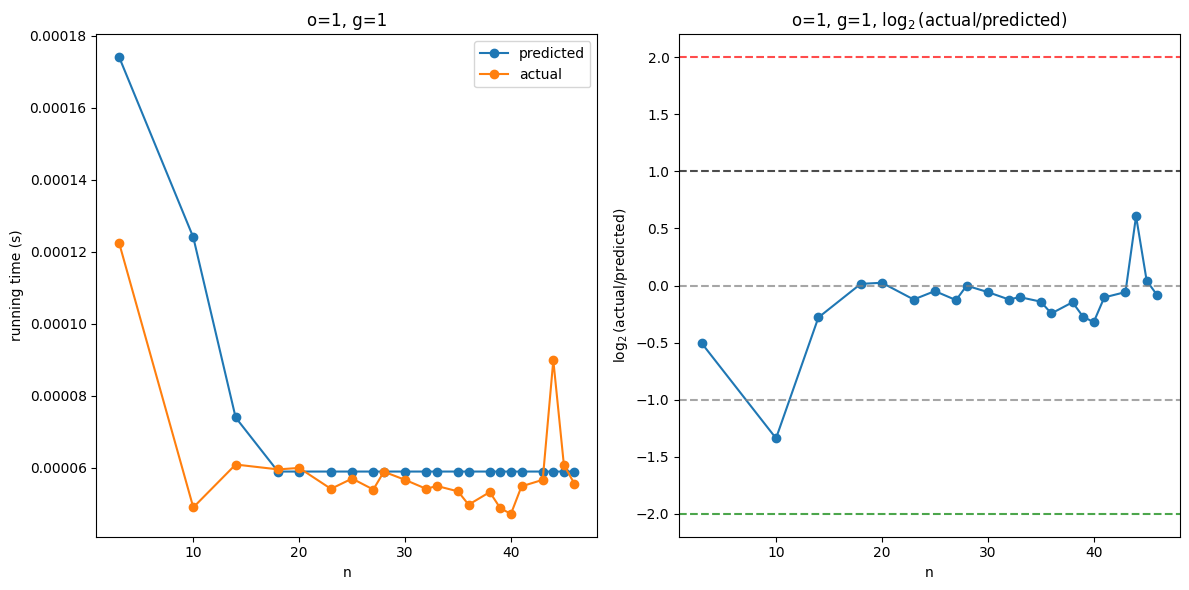

n for o=2, g=1:   0%|          | 0/22 [00:00<?, ?it/s]

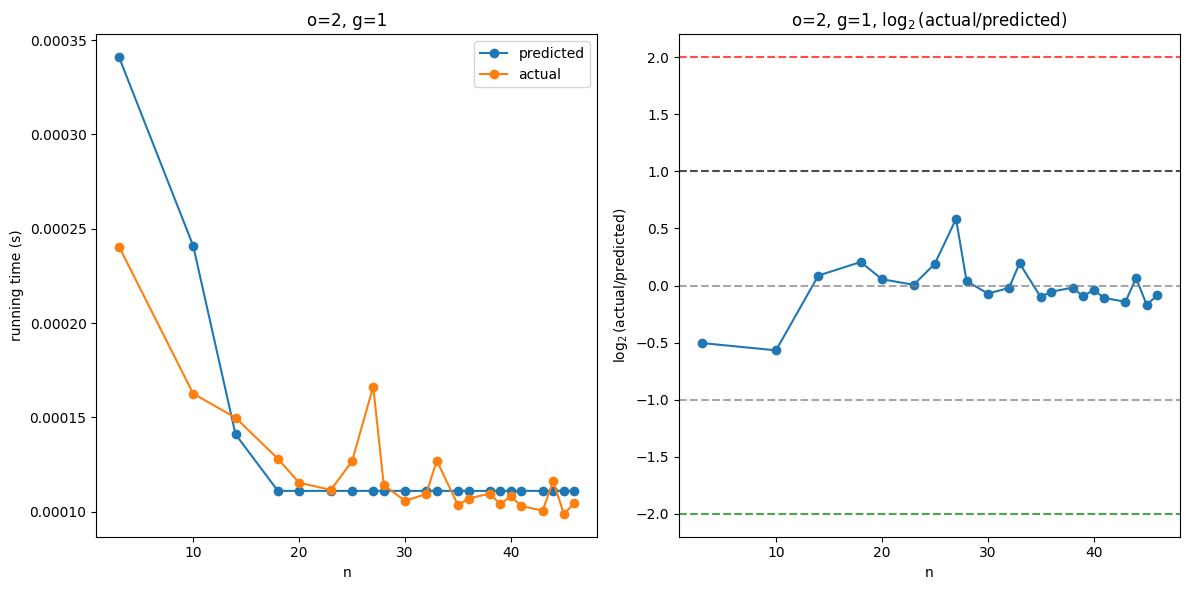

n for o=3, g=1:   0%|          | 0/22 [00:00<?, ?it/s]

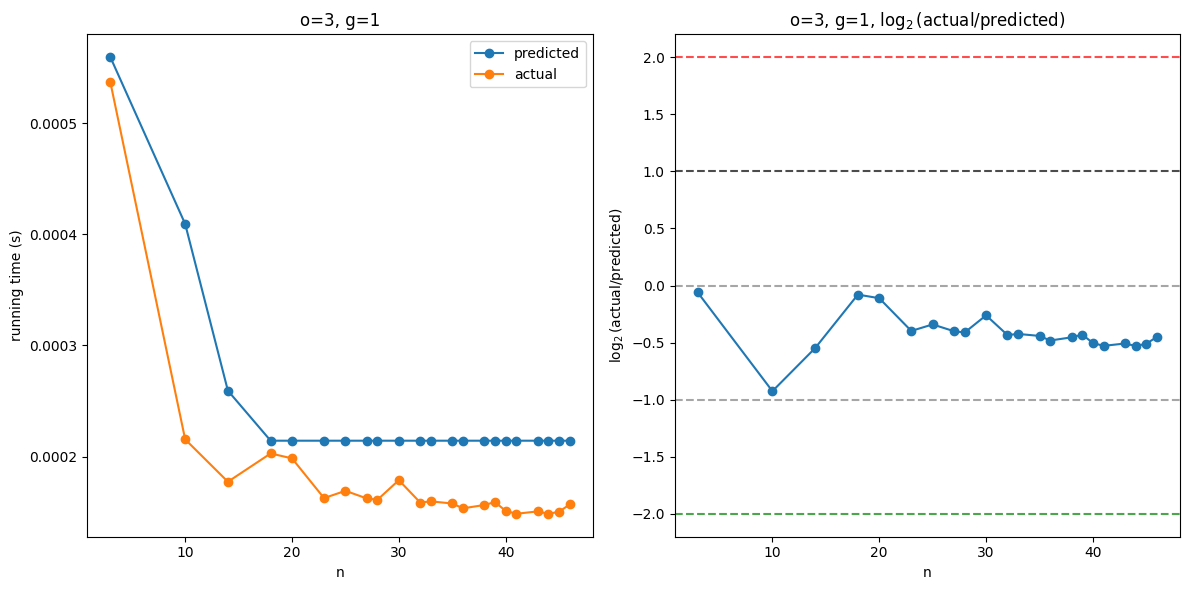

n for o=4, g=1:   0%|          | 0/22 [00:00<?, ?it/s]

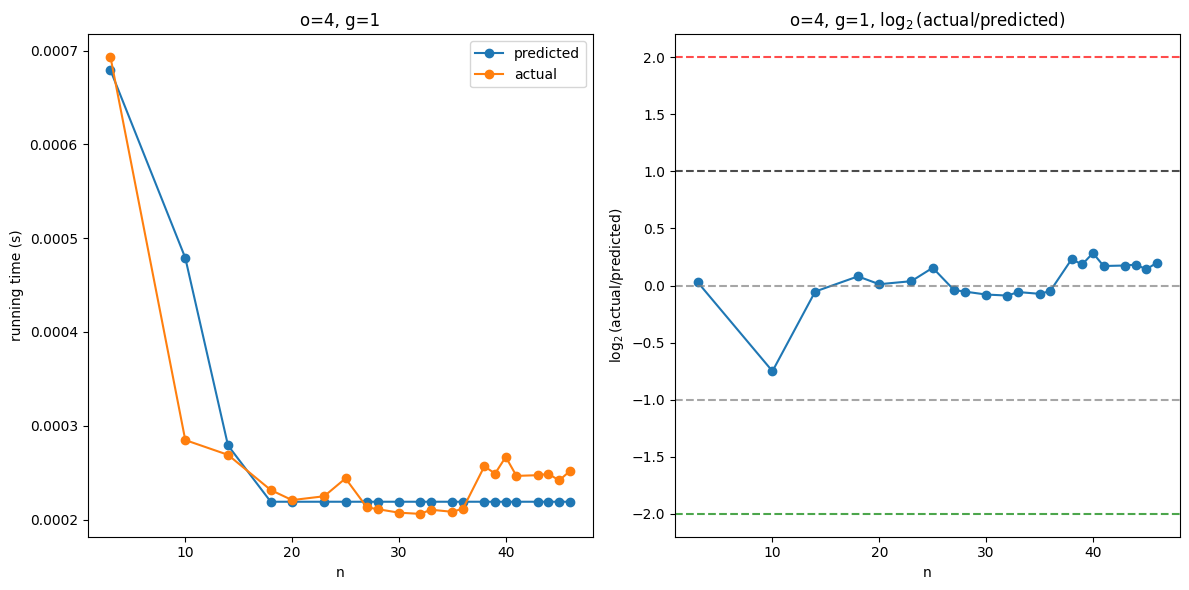

n for o=5, g=1:   0%|          | 0/22 [00:00<?, ?it/s]

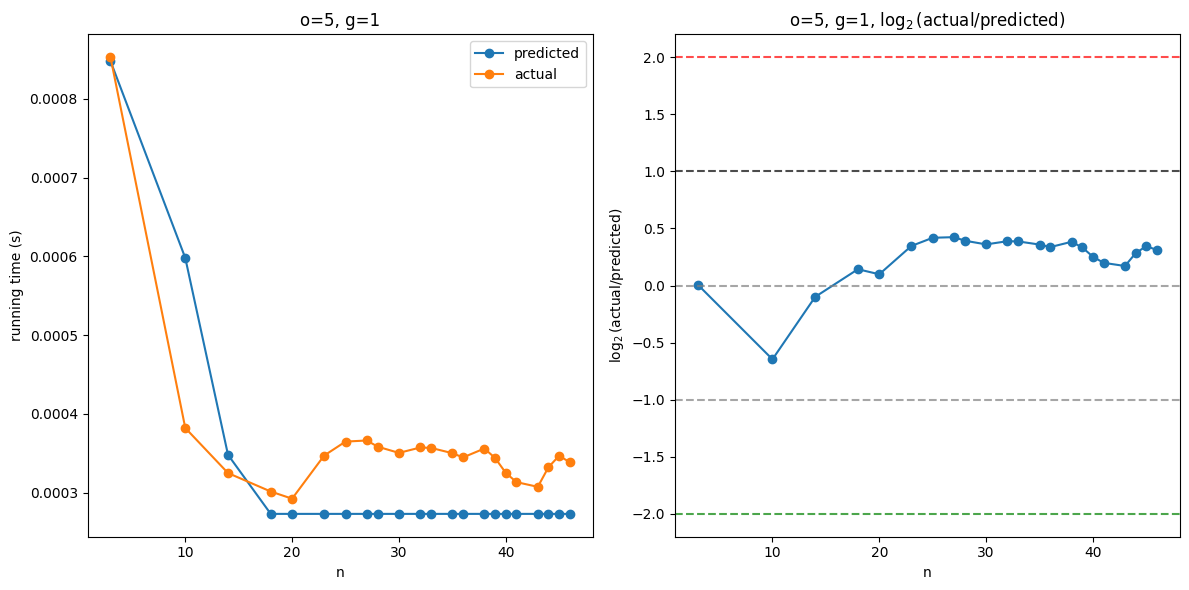

n for o=6, g=1:   0%|          | 0/22 [00:00<?, ?it/s]

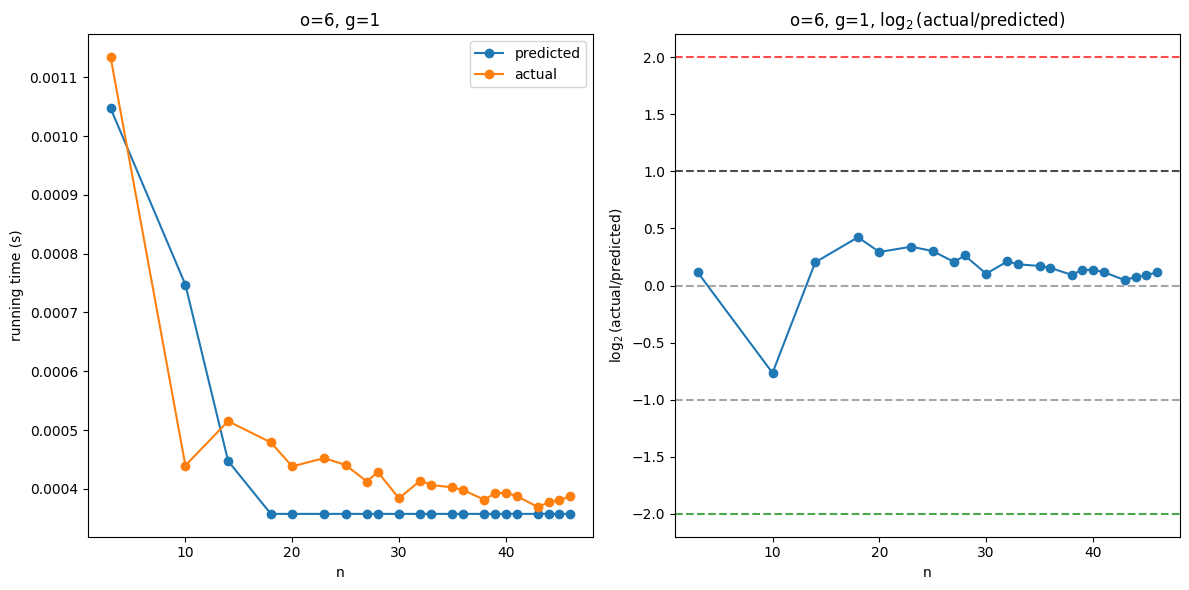

n for o=7, g=1:   0%|          | 0/22 [00:00<?, ?it/s]

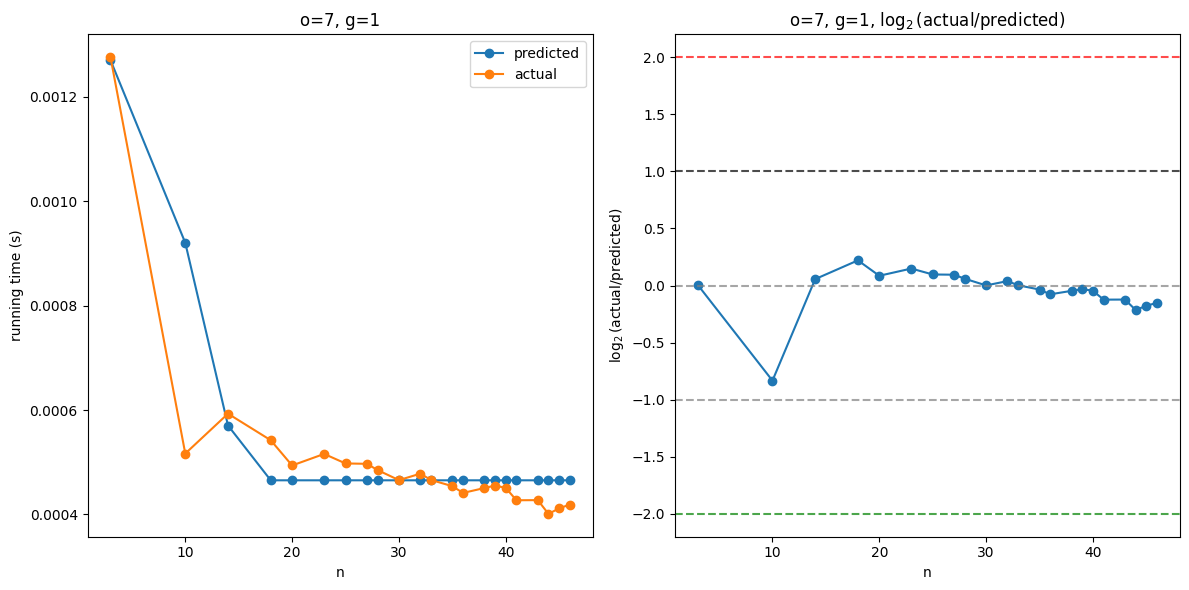

n for o=8, g=1:   0%|          | 0/22 [00:00<?, ?it/s]

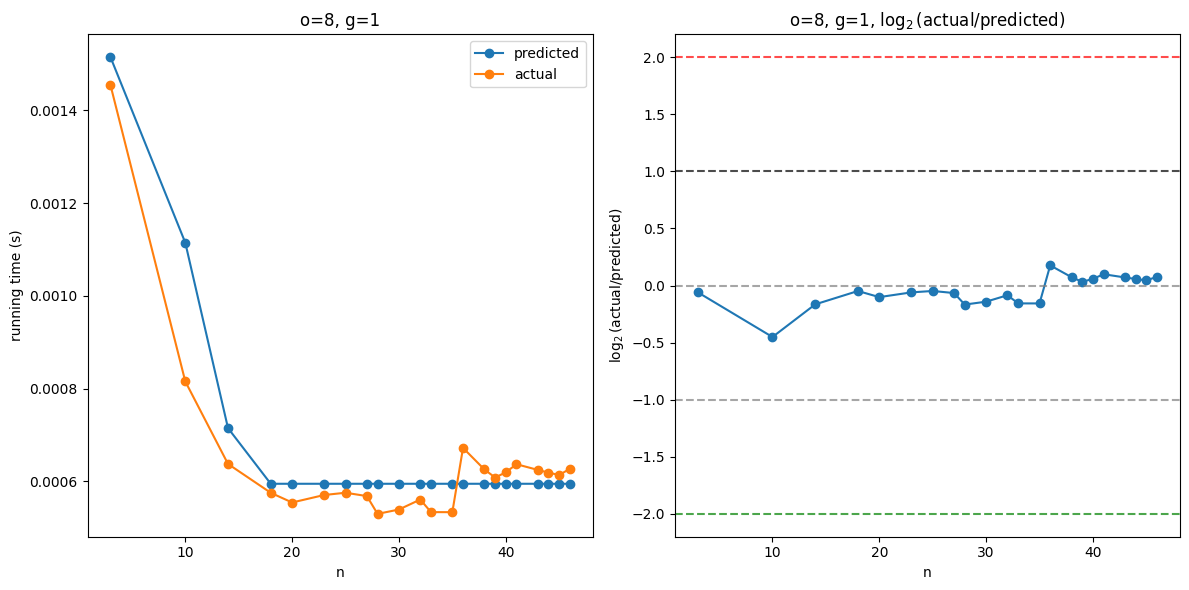

n for o=9, g=1:   0%|          | 0/22 [00:00<?, ?it/s]

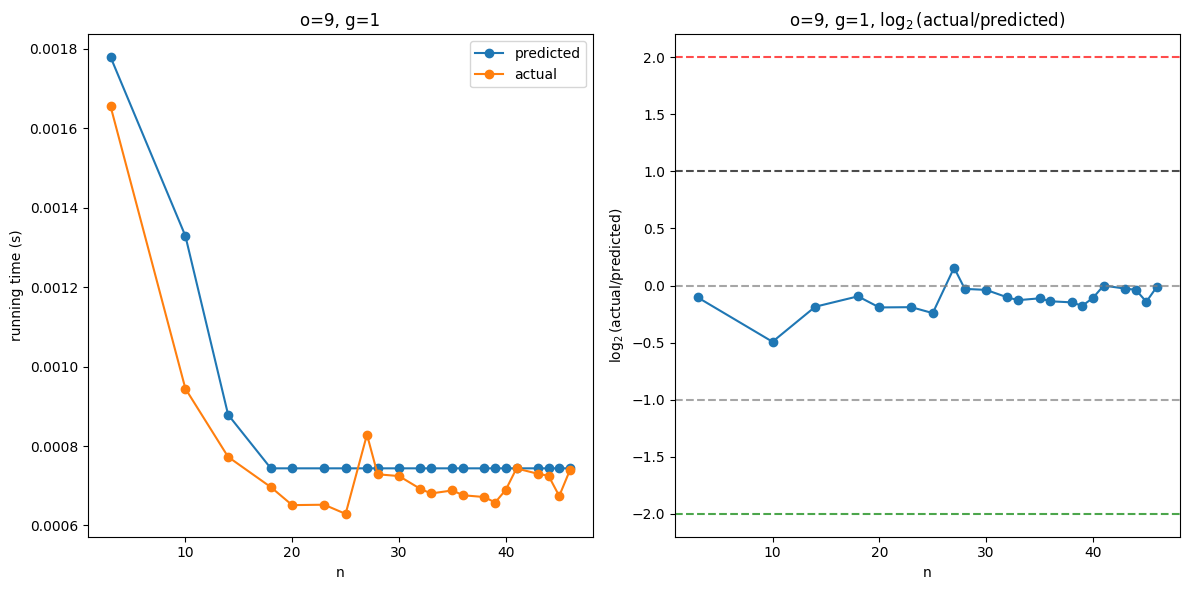

n for o=10, g=1:   0%|          | 0/22 [00:00<?, ?it/s]

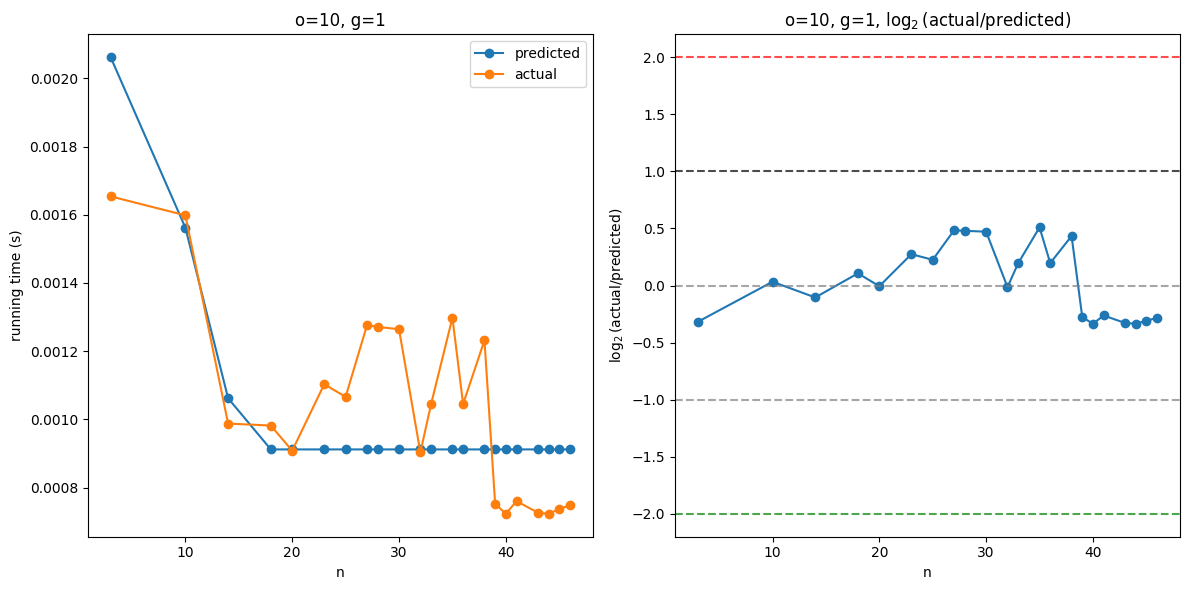

n for o=1, g=2:   0%|          | 0/22 [00:00<?, ?it/s]

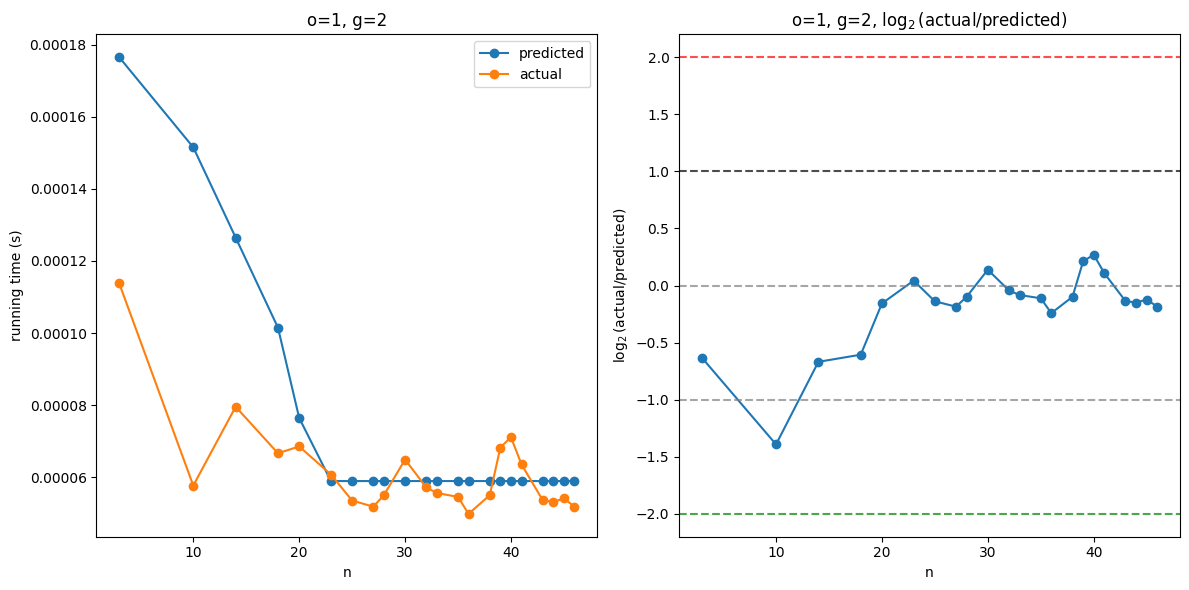

n for o=2, g=2:   0%|          | 0/22 [00:00<?, ?it/s]

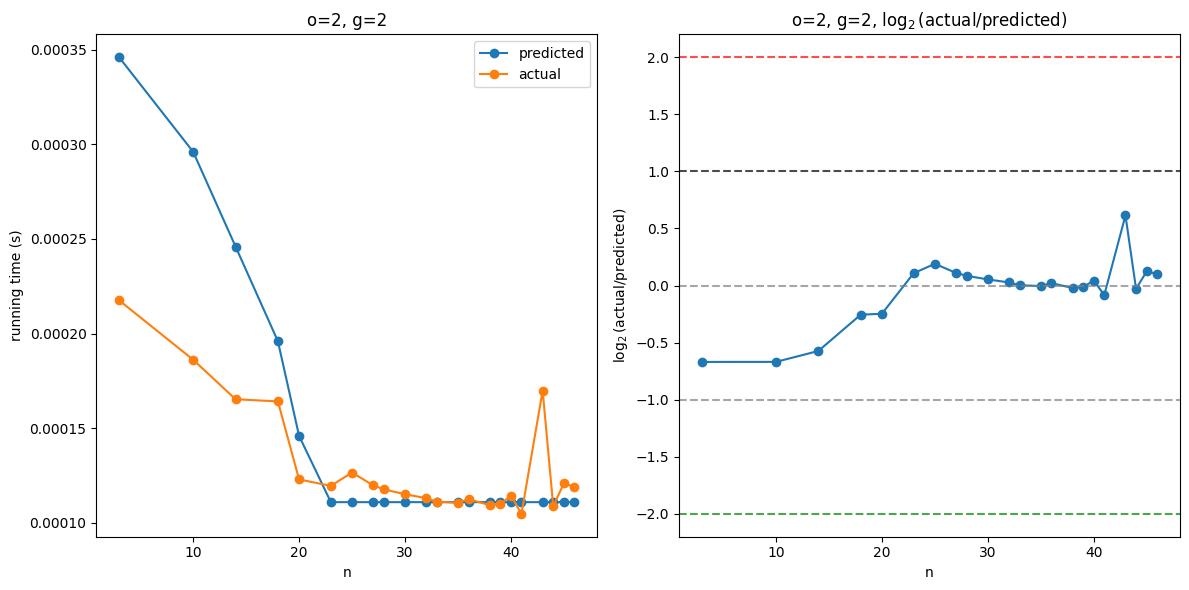

n for o=3, g=2:   0%|          | 0/22 [00:00<?, ?it/s]

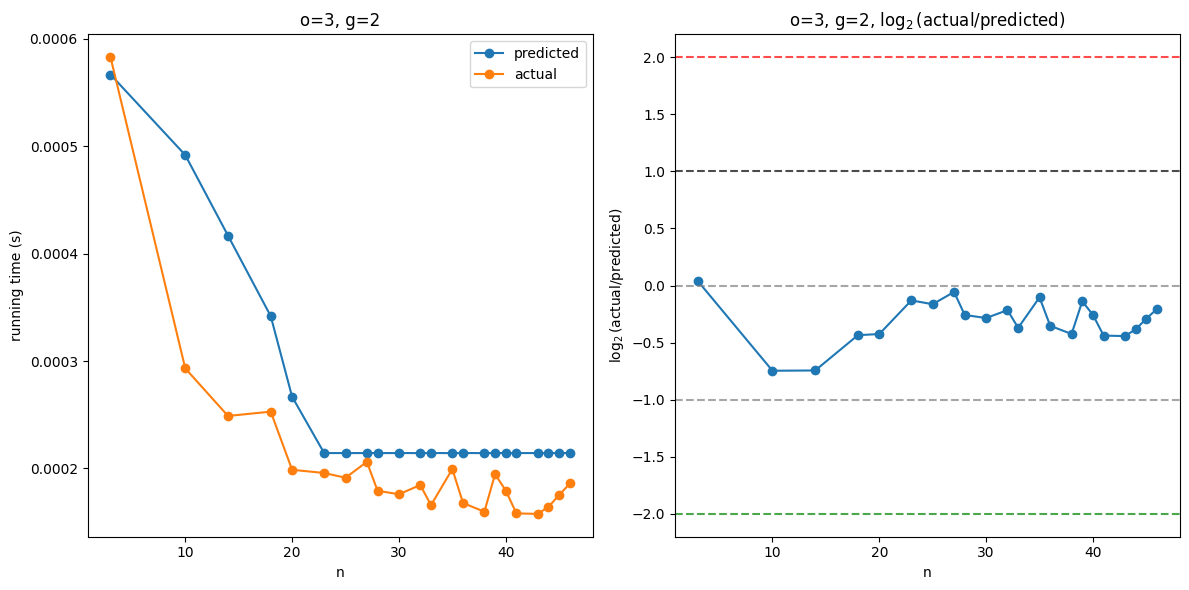

n for o=4, g=2:   0%|          | 0/22 [00:00<?, ?it/s]

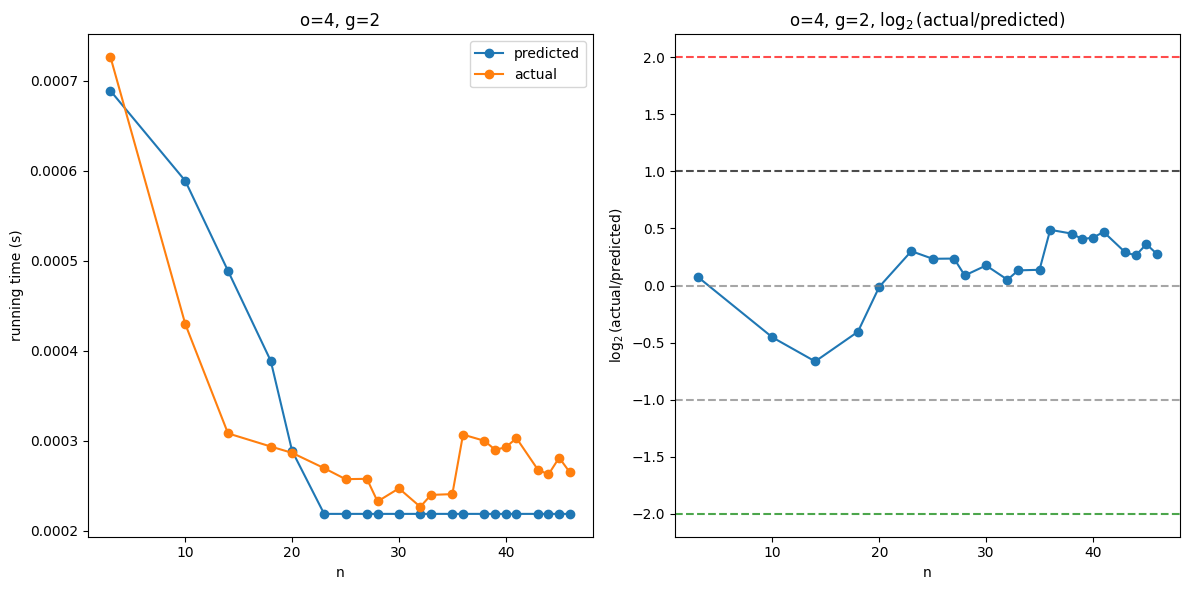

n for o=5, g=2:   0%|          | 0/22 [00:00<?, ?it/s]

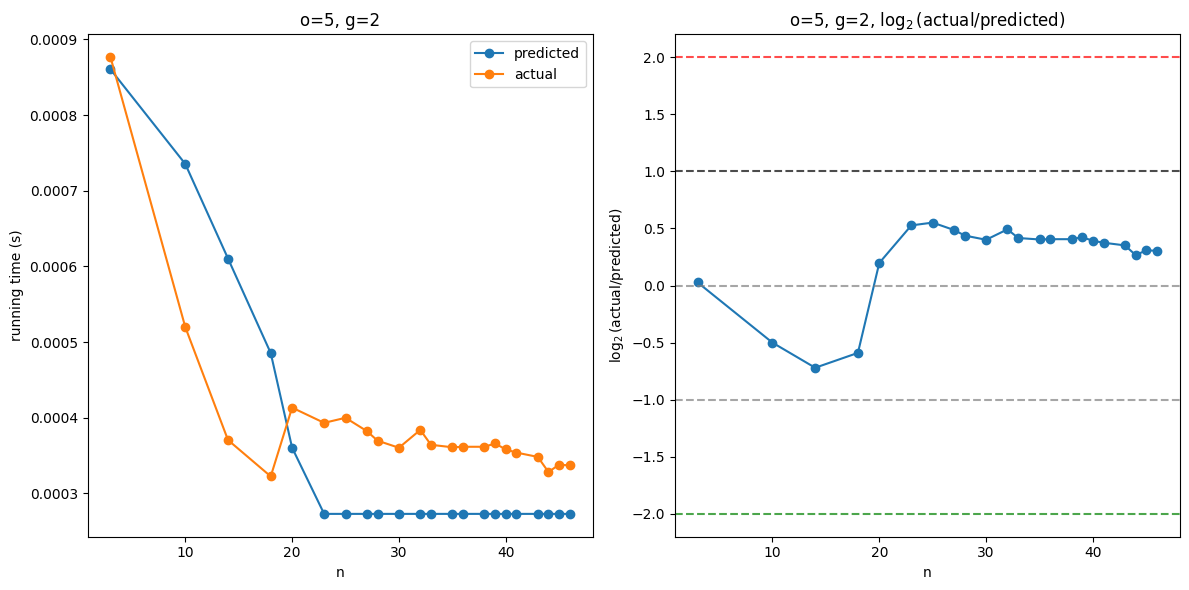

n for o=6, g=2:   0%|          | 0/22 [00:00<?, ?it/s]

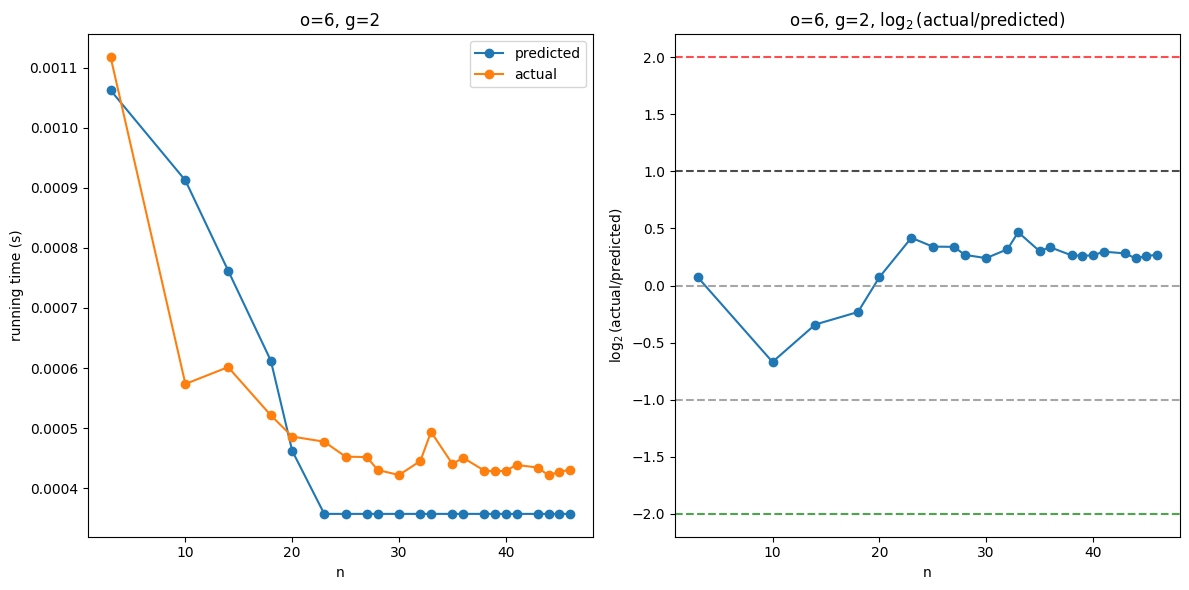

n for o=7, g=2:   0%|          | 0/22 [00:00<?, ?it/s]

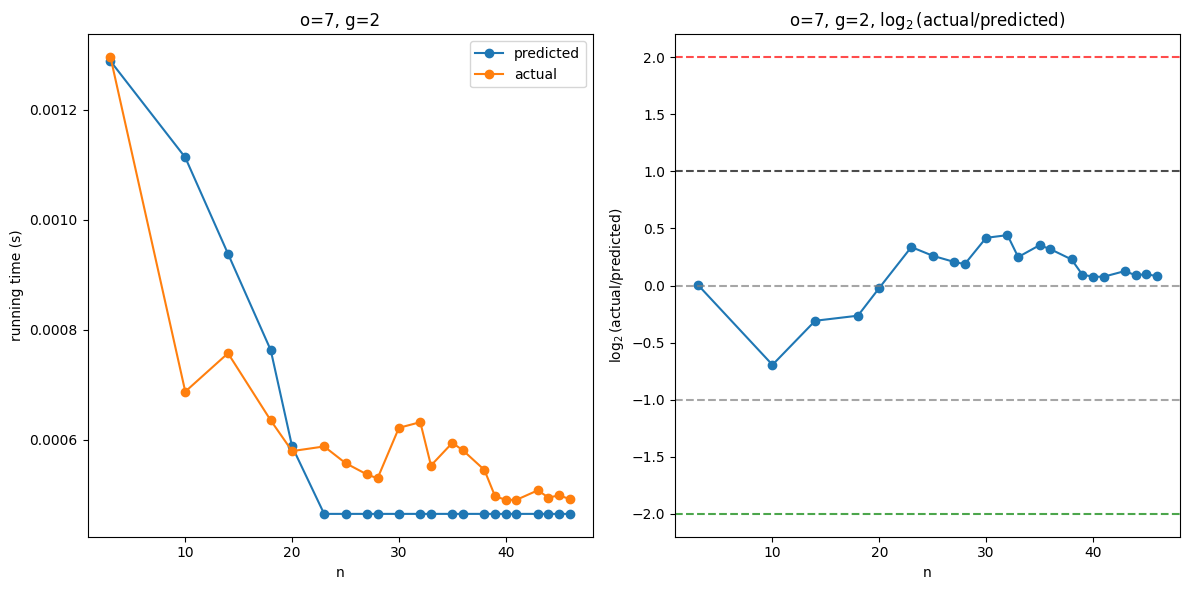

n for o=8, g=2:   0%|          | 0/22 [00:00<?, ?it/s]

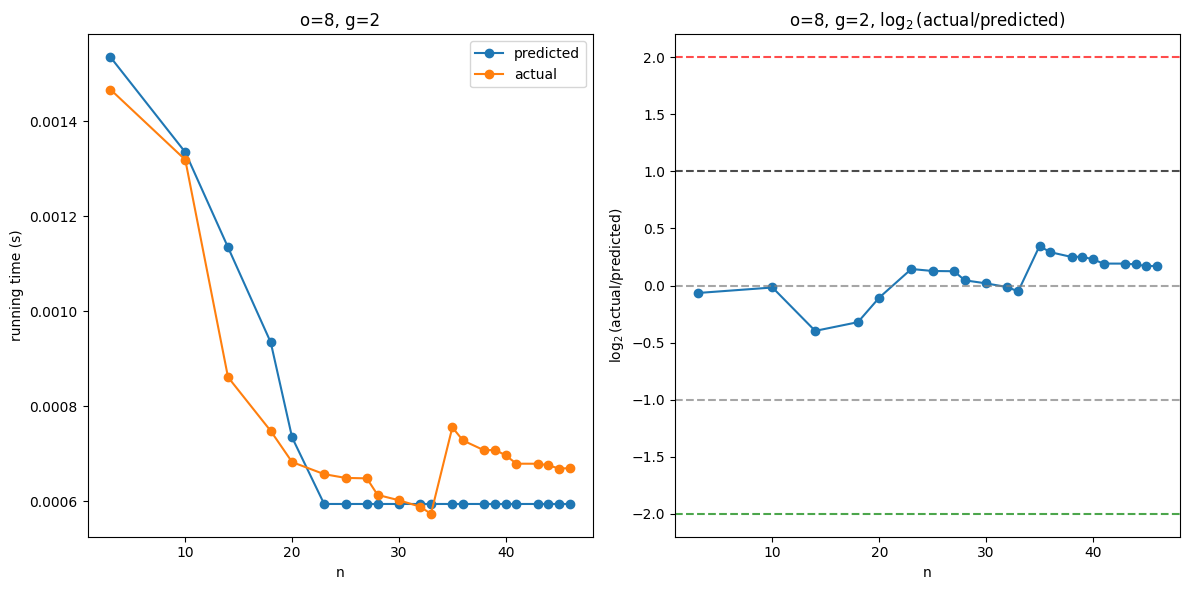

n for o=9, g=2:   0%|          | 0/22 [00:00<?, ?it/s]

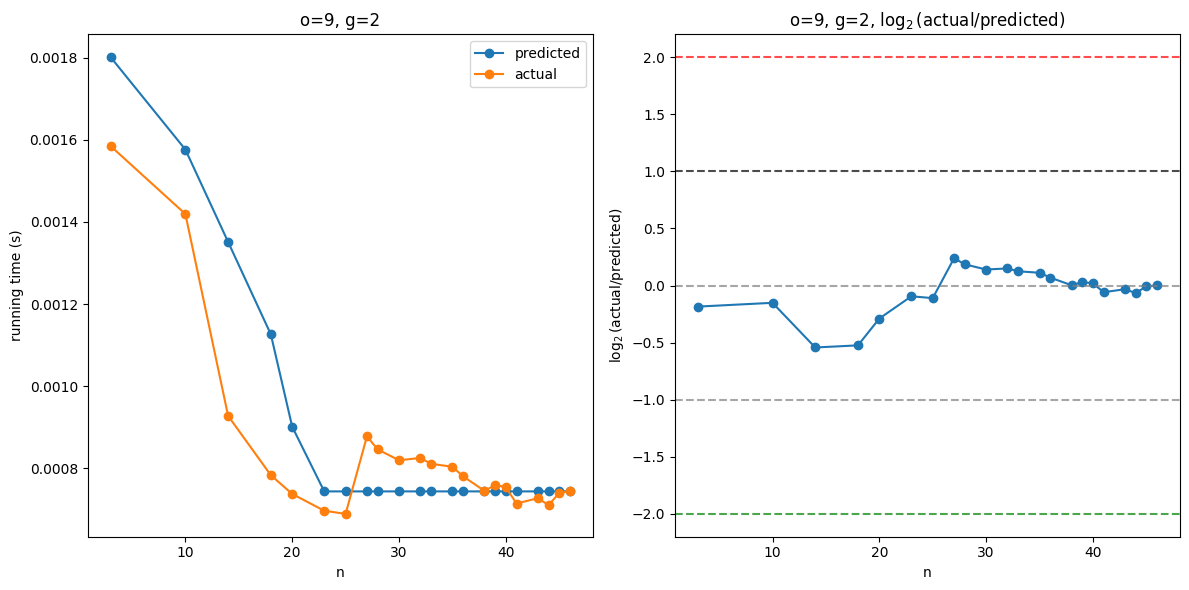

n for o=10, g=2:   0%|          | 0/22 [00:00<?, ?it/s]

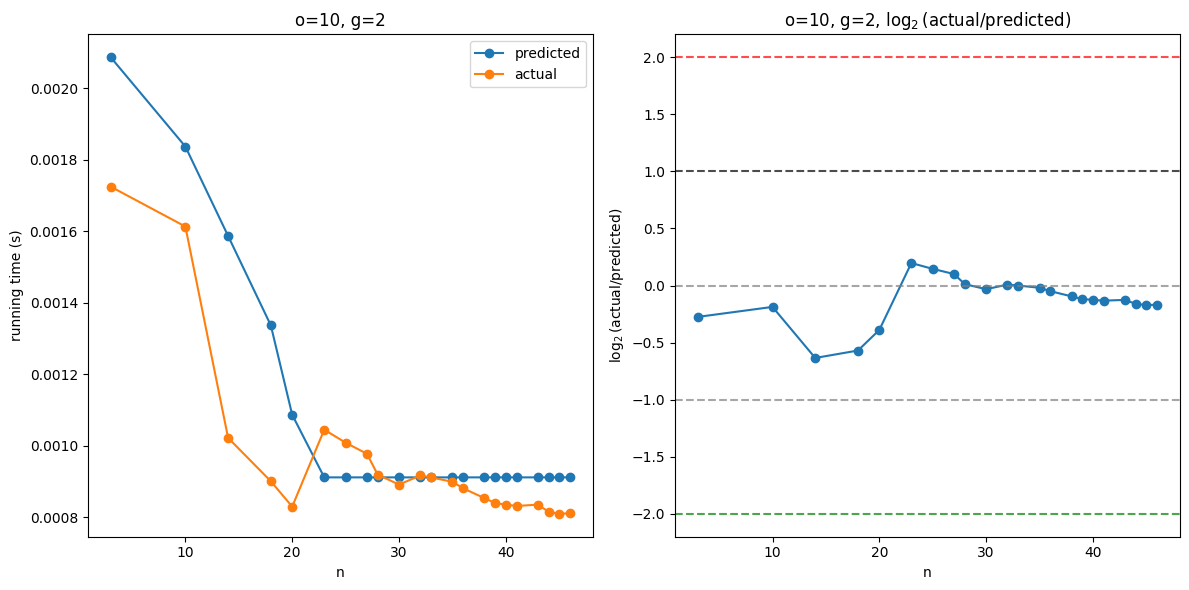

n for o=1, g=3:   0%|          | 0/22 [00:00<?, ?it/s]

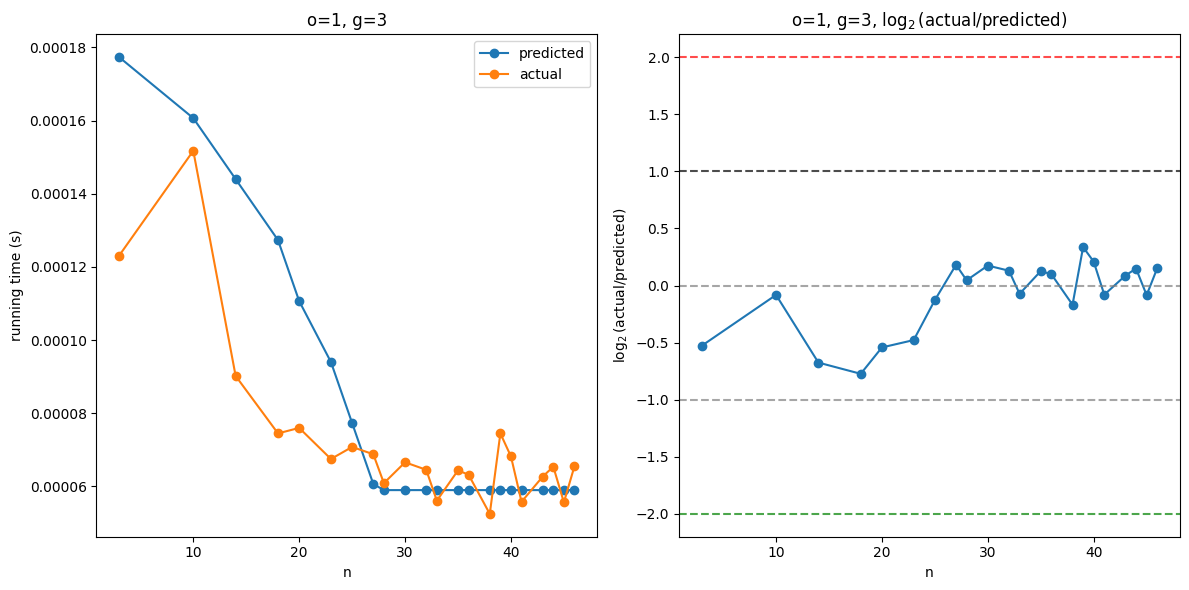

n for o=2, g=3:   0%|          | 0/22 [00:00<?, ?it/s]

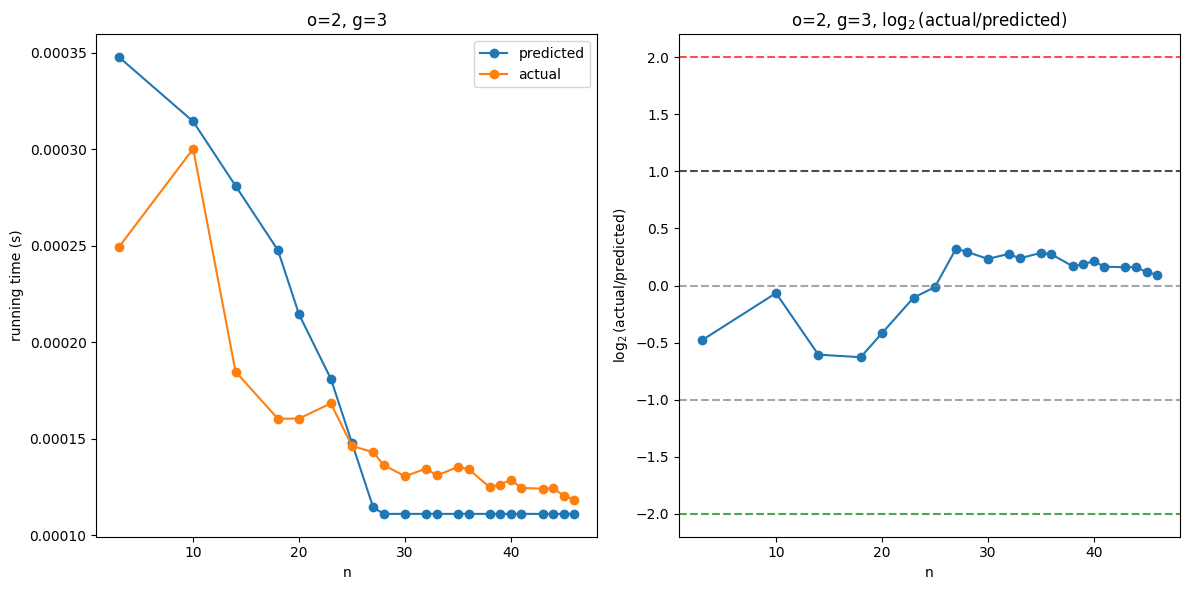

n for o=3, g=3:   0%|          | 0/22 [00:00<?, ?it/s]

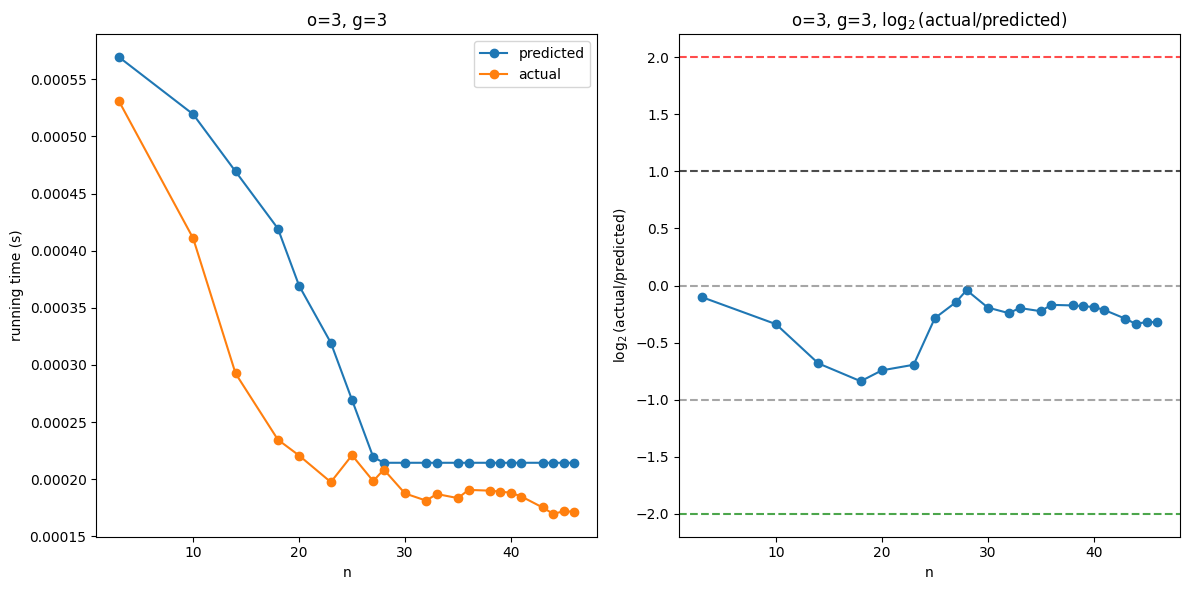

n for o=4, g=3:   0%|          | 0/22 [00:00<?, ?it/s]

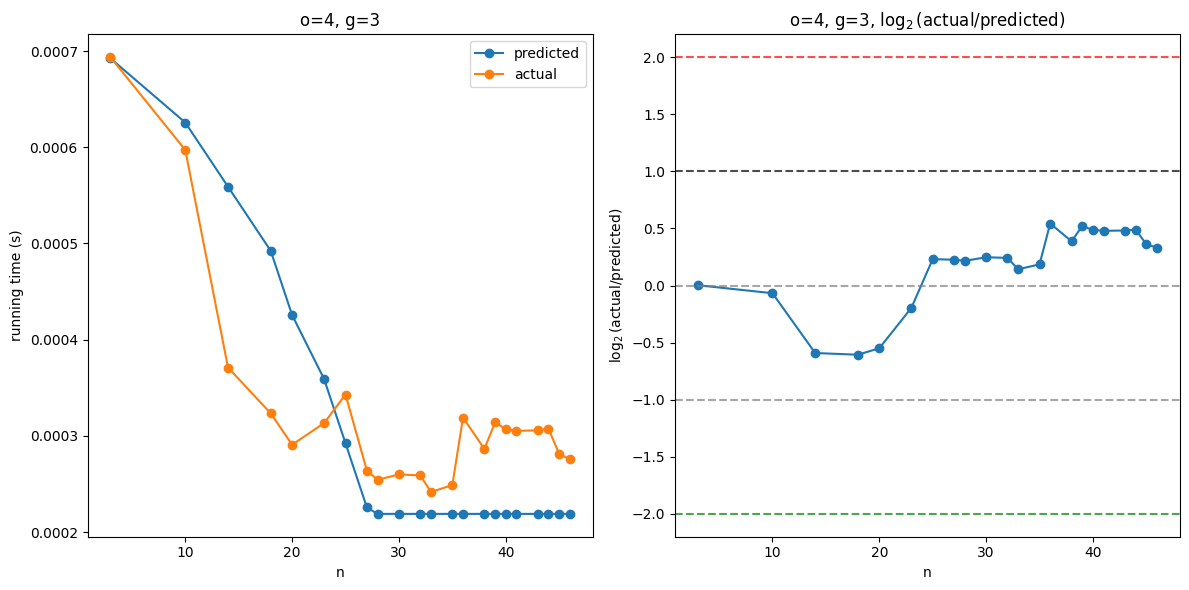

n for o=5, g=3:   0%|          | 0/22 [00:00<?, ?it/s]

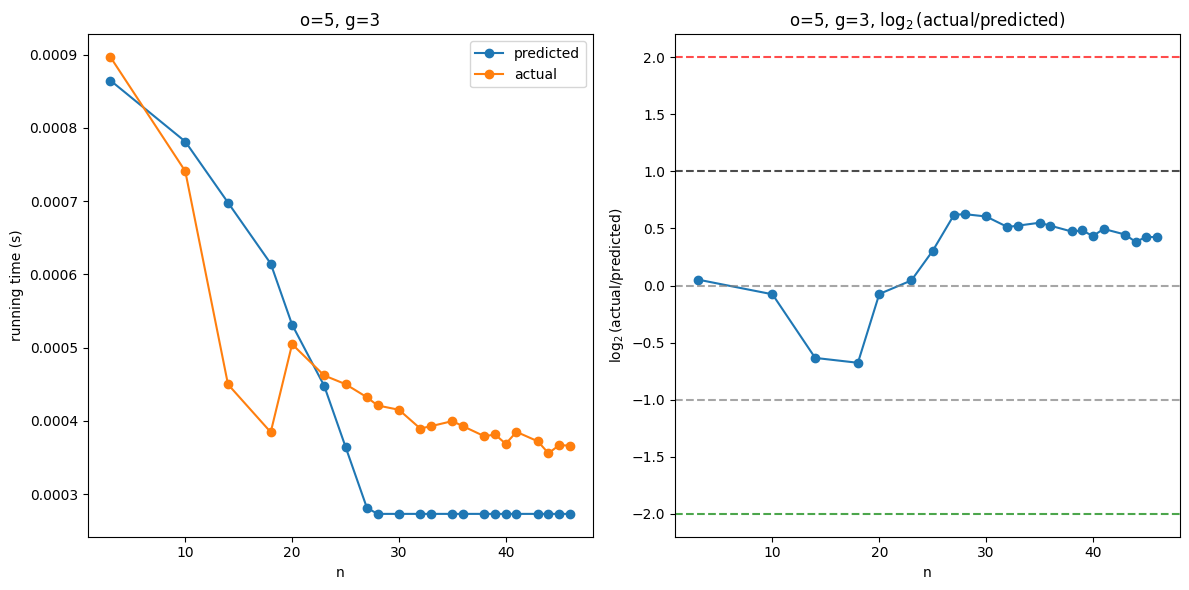

n for o=6, g=3:   0%|          | 0/22 [00:00<?, ?it/s]

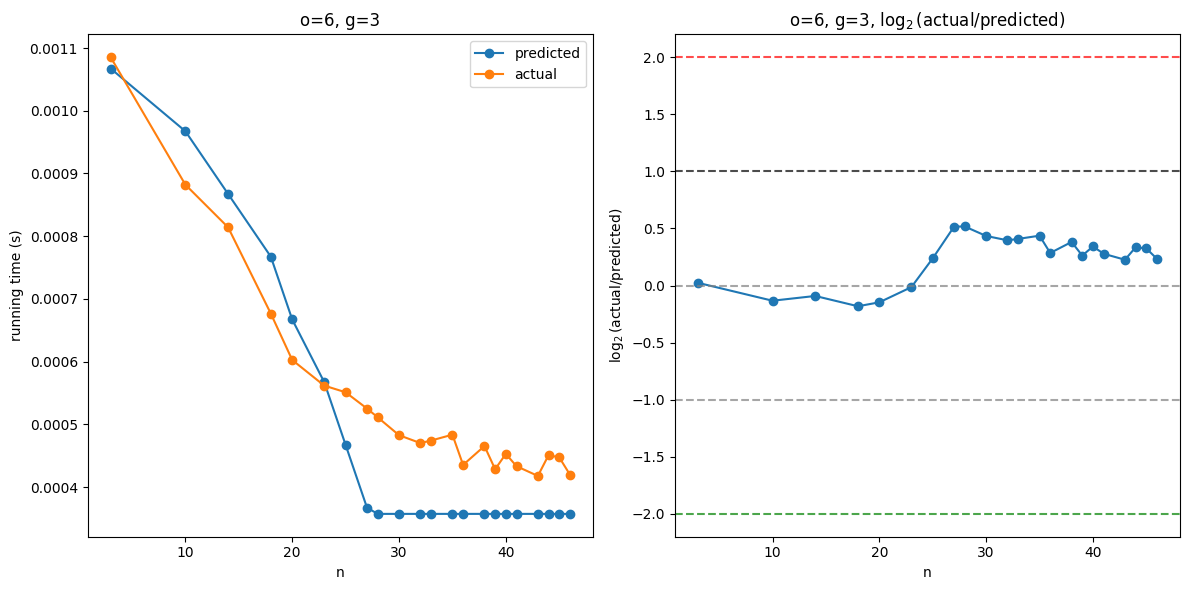

n for o=7, g=3:   0%|          | 0/22 [00:00<?, ?it/s]

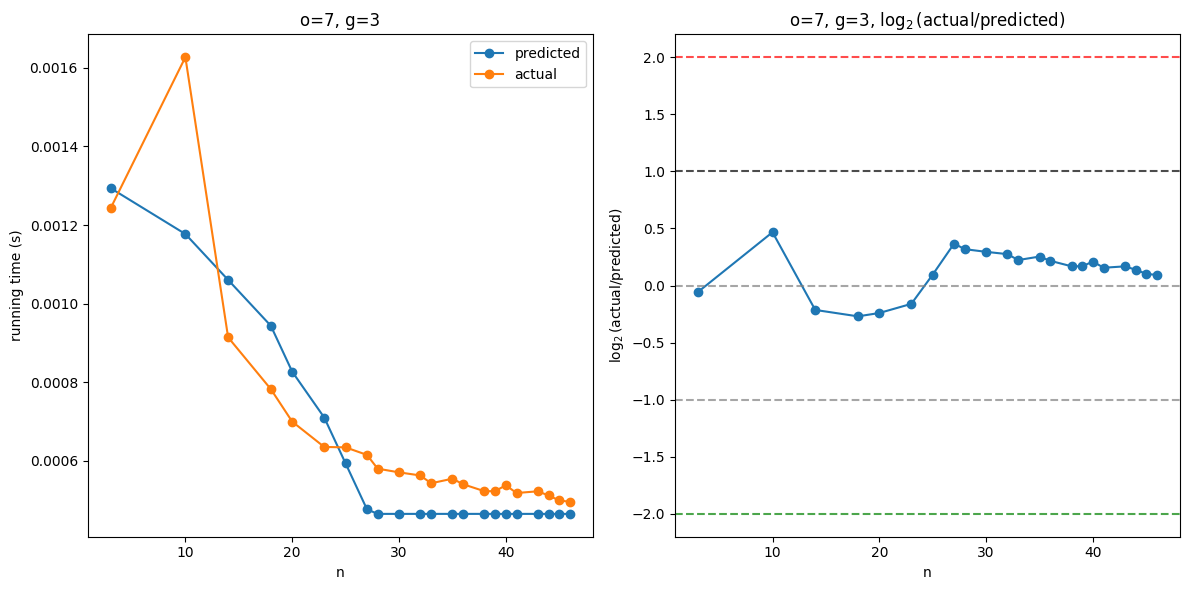

n for o=8, g=3:   0%|          | 0/22 [00:00<?, ?it/s]

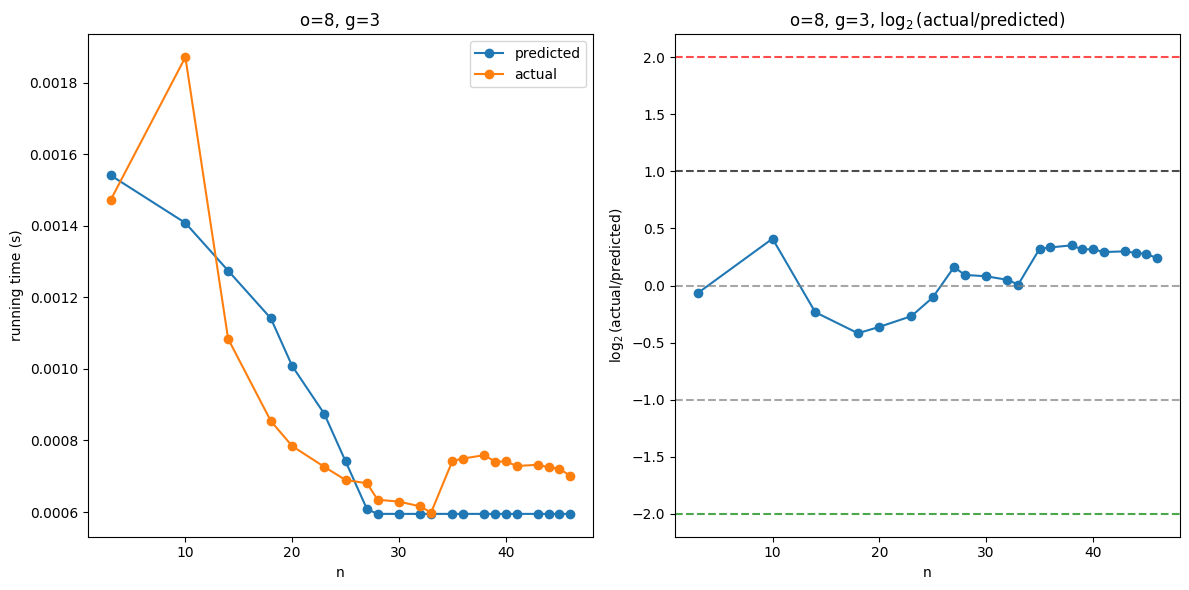

n for o=9, g=3:   0%|          | 0/22 [00:00<?, ?it/s]

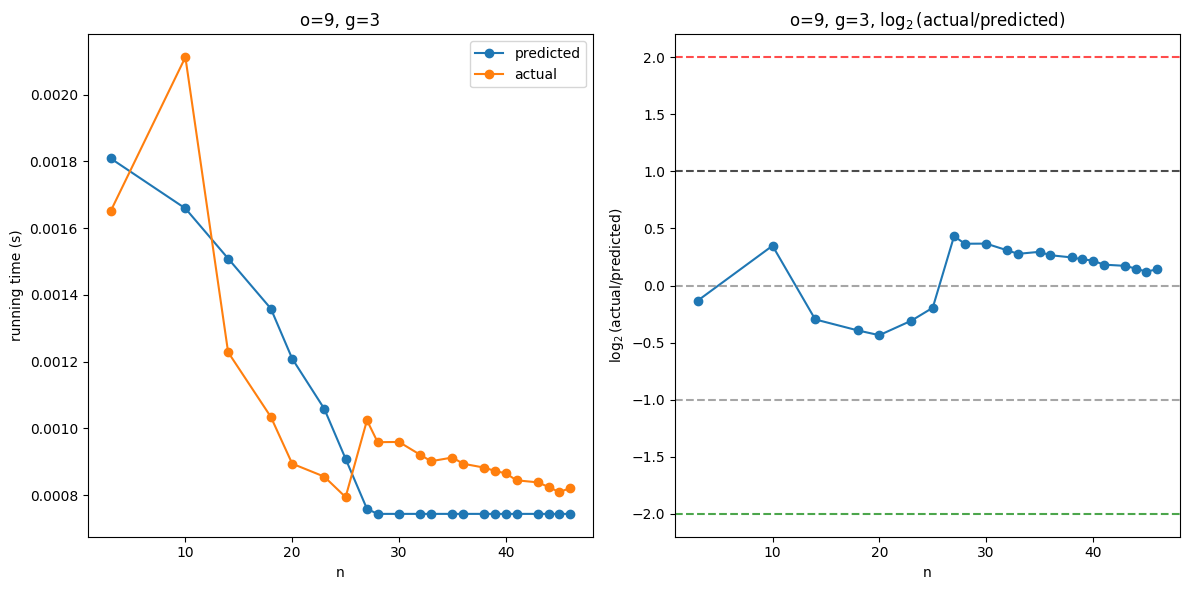

n for o=10, g=3:   0%|          | 0/22 [00:00<?, ?it/s]

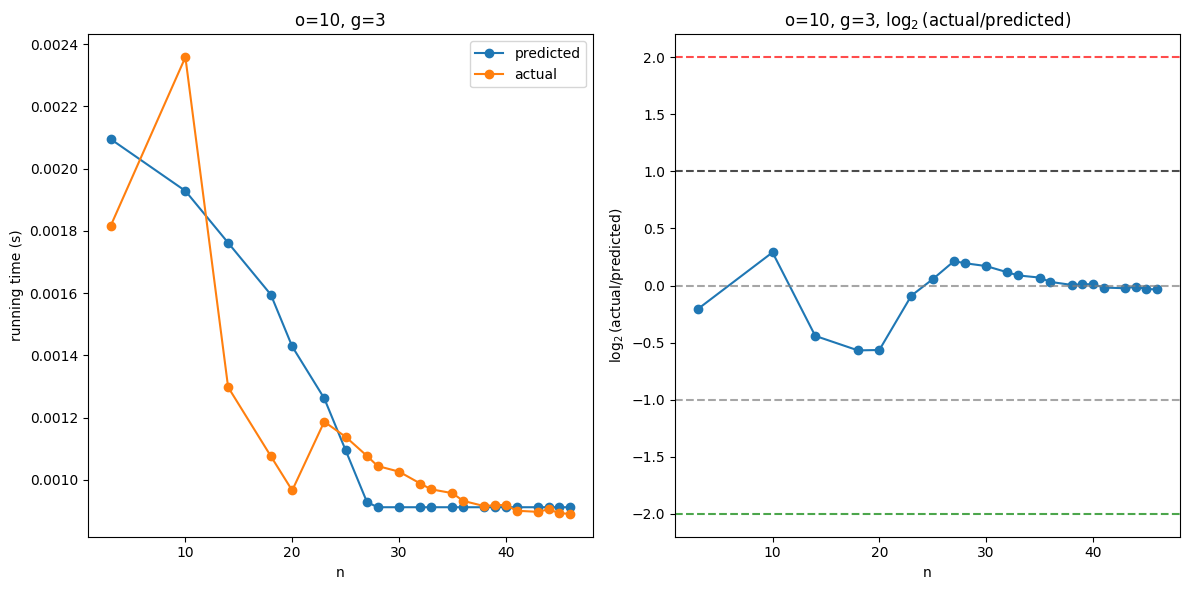

n for o=1, g=4:   0%|          | 0/22 [00:00<?, ?it/s]

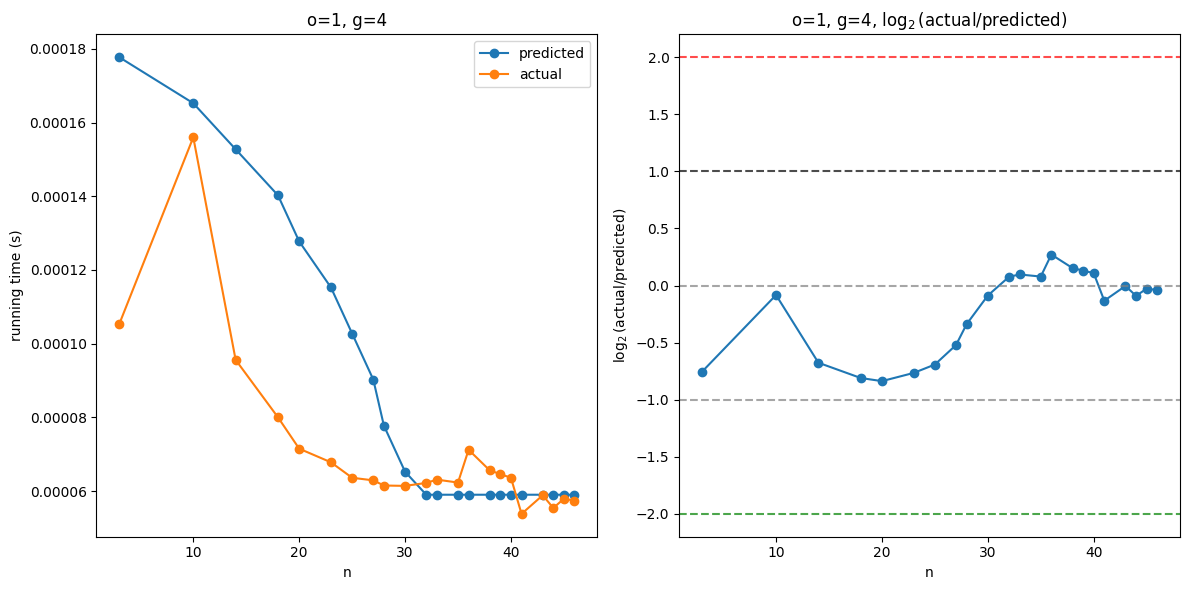

n for o=2, g=4:   0%|          | 0/22 [00:00<?, ?it/s]

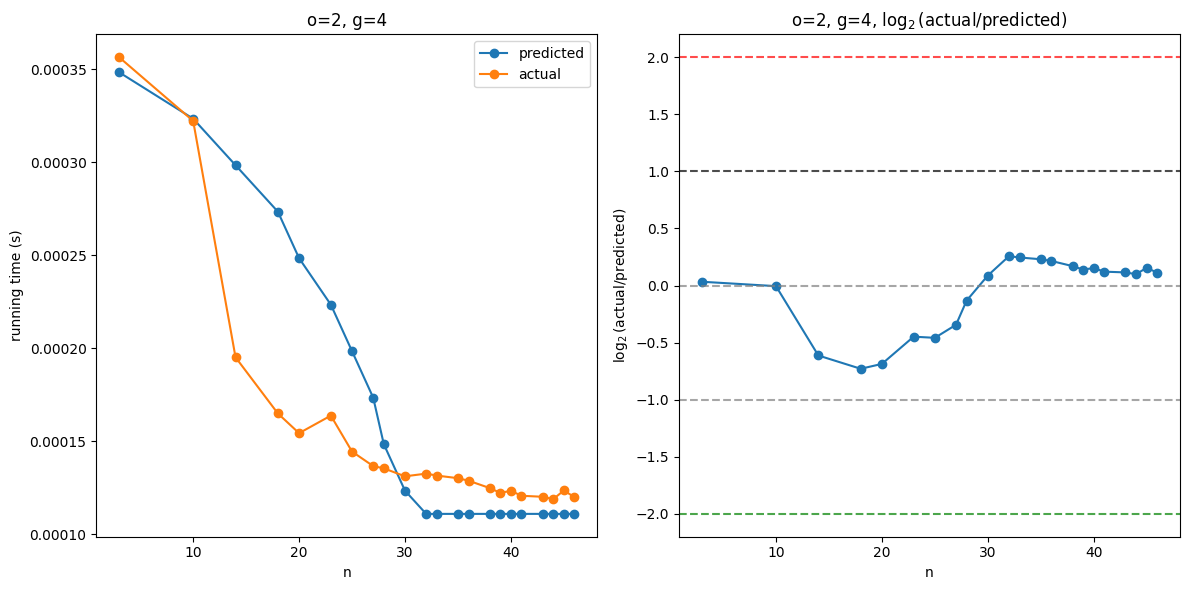

n for o=3, g=4:   0%|          | 0/22 [00:00<?, ?it/s]

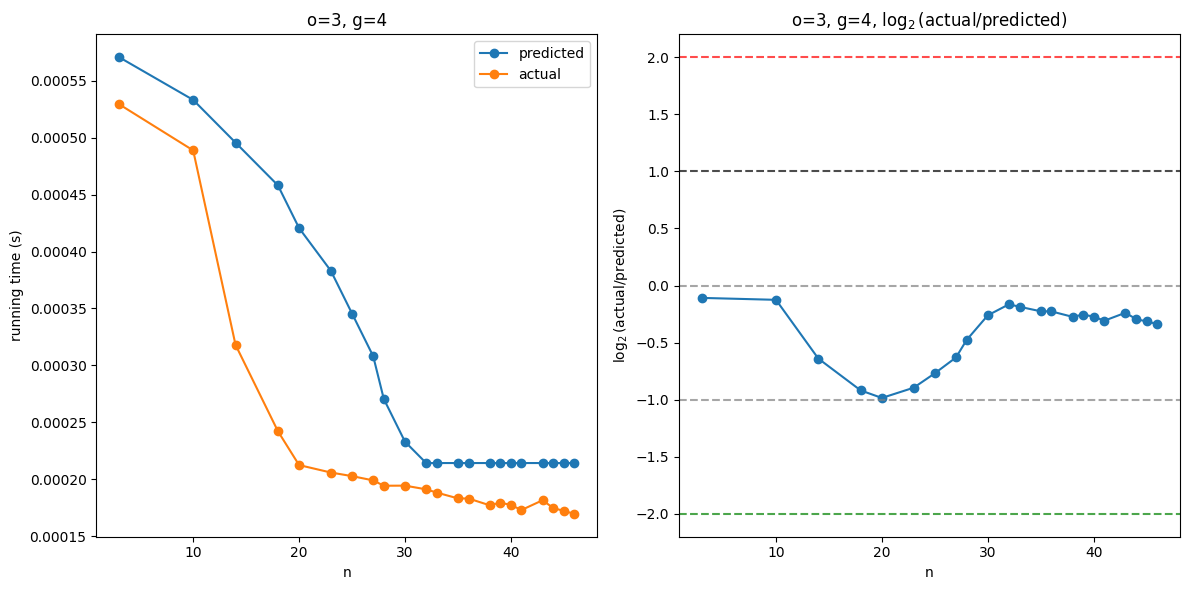

n for o=4, g=4:   0%|          | 0/22 [00:00<?, ?it/s]

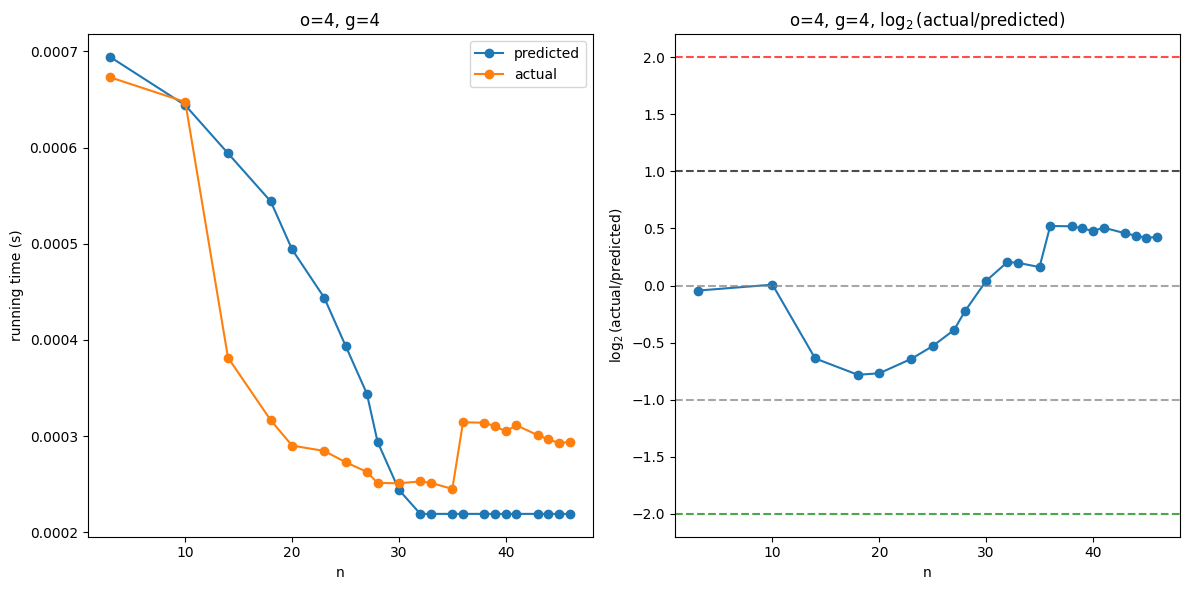

n for o=5, g=4:   0%|          | 0/22 [00:00<?, ?it/s]

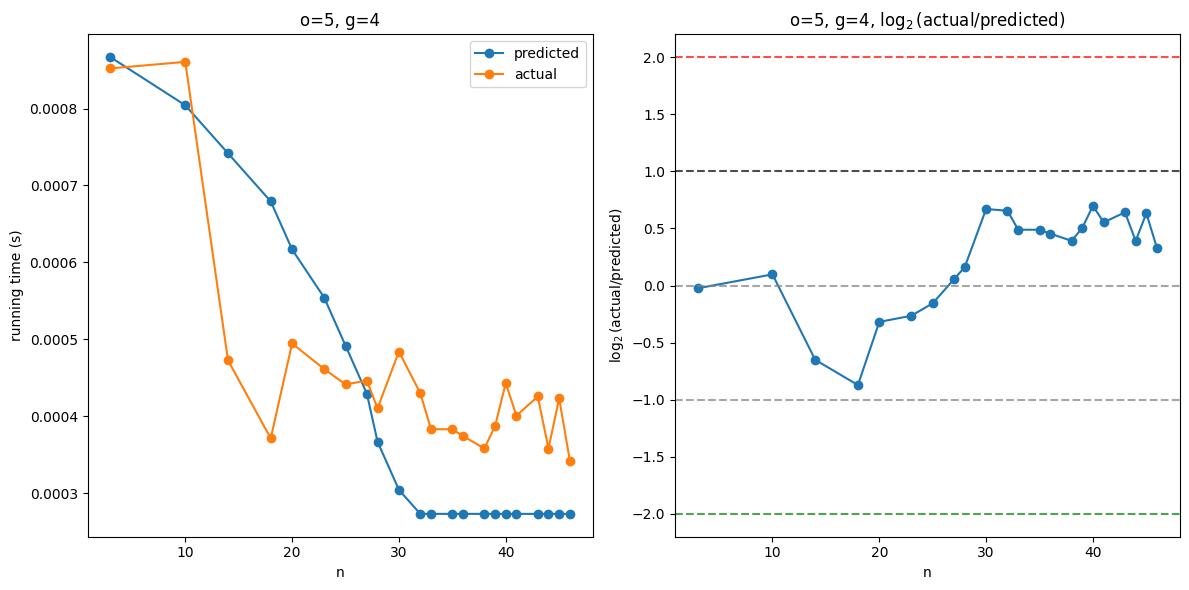

n for o=6, g=4:   0%|          | 0/22 [00:00<?, ?it/s]

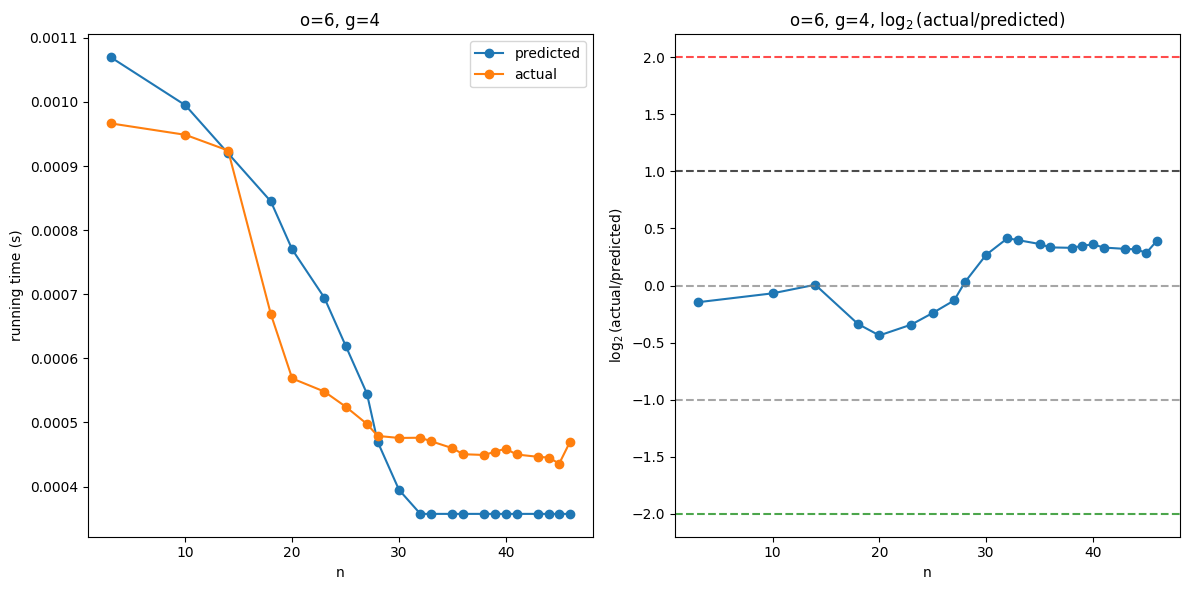

n for o=7, g=4:   0%|          | 0/22 [00:00<?, ?it/s]

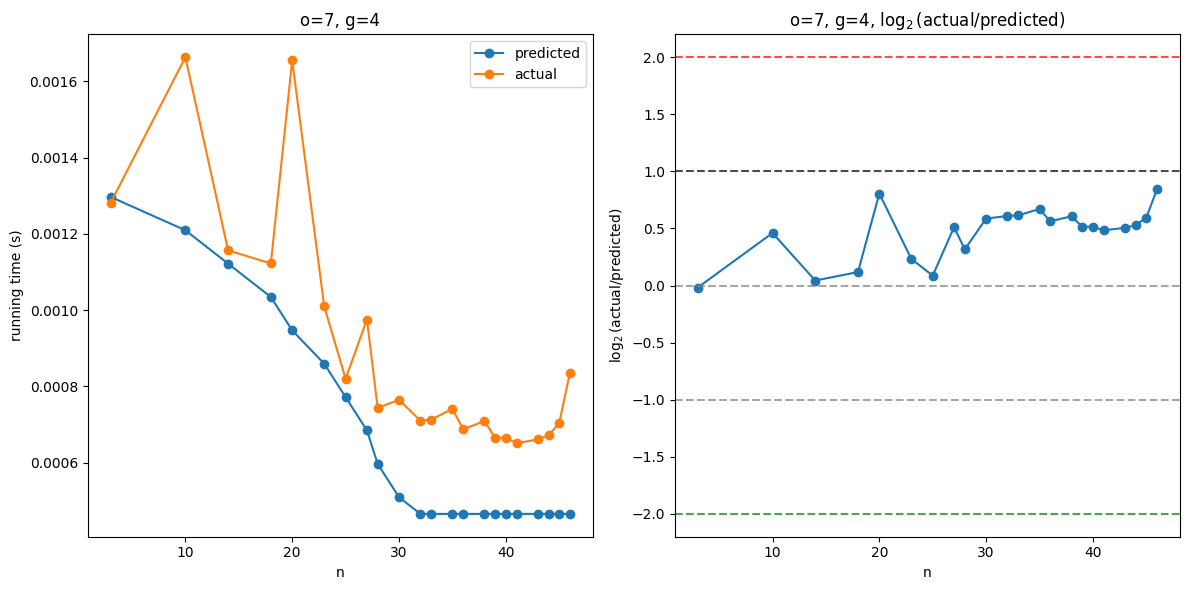

n for o=8, g=4:   0%|          | 0/22 [00:00<?, ?it/s]

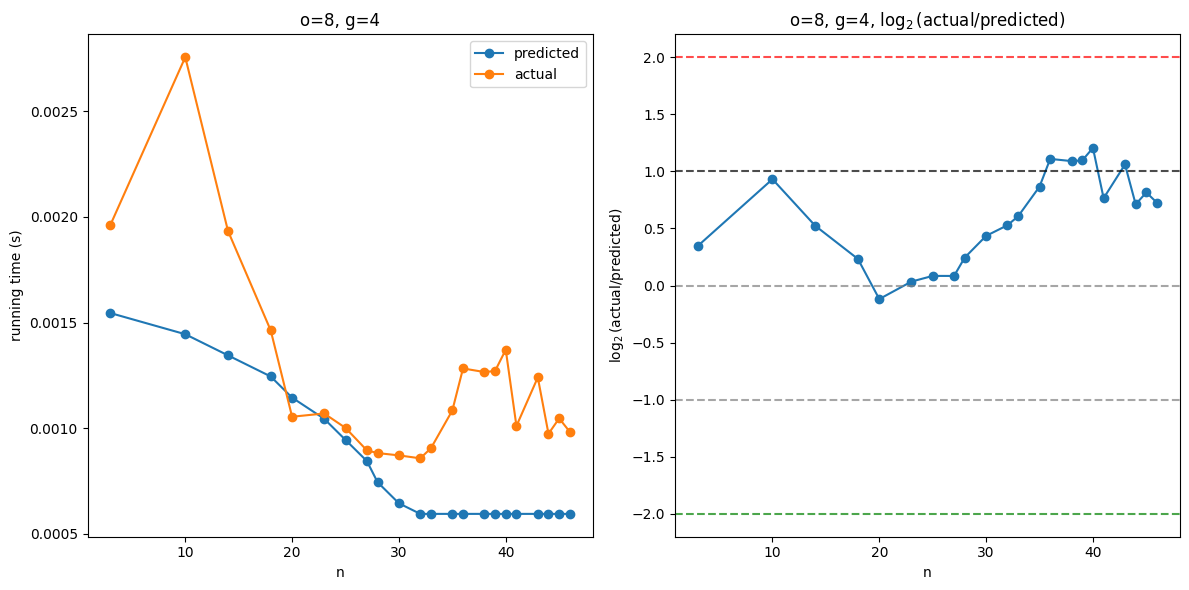

n for o=9, g=4:   0%|          | 0/22 [00:00<?, ?it/s]

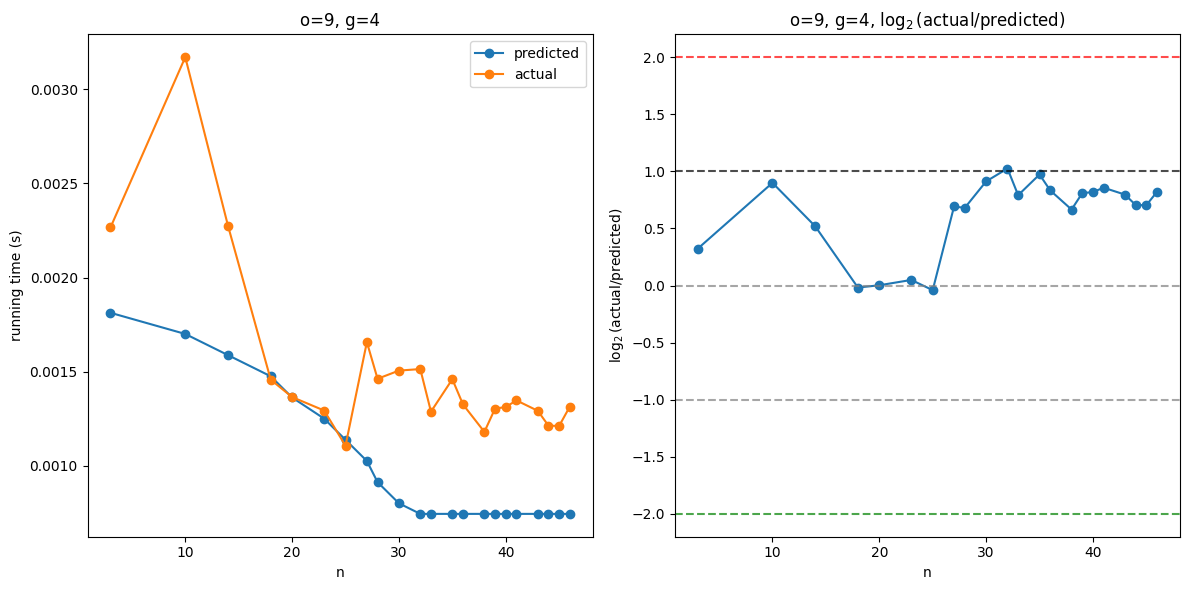

n for o=10, g=4:   0%|          | 0/22 [00:00<?, ?it/s]

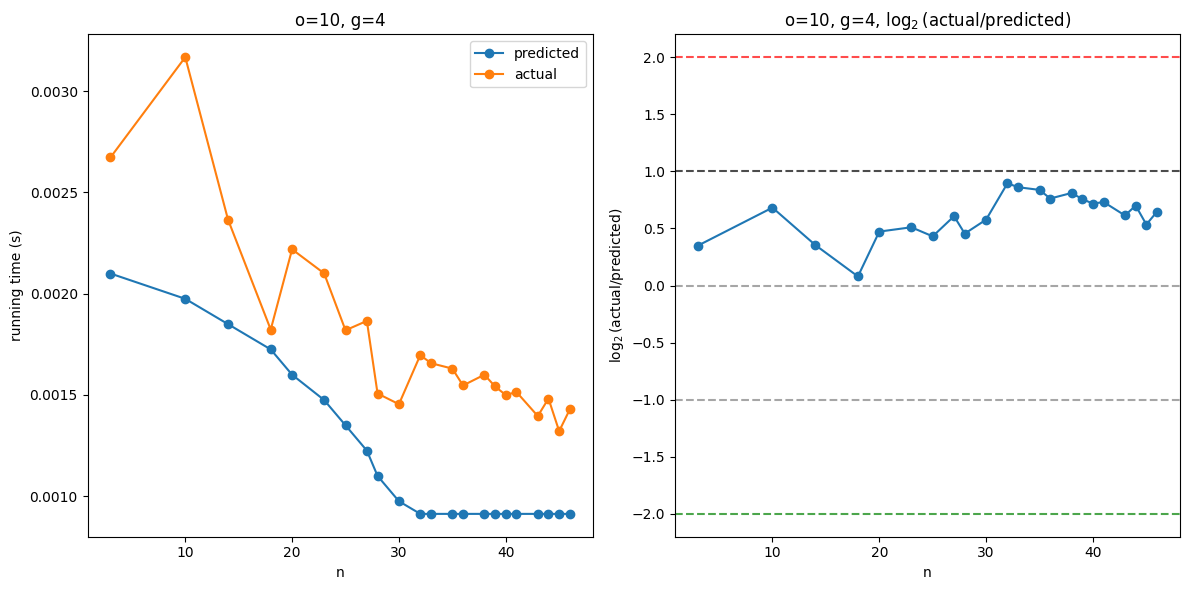

n for o=1, g=5:   0%|          | 0/22 [00:00<?, ?it/s]

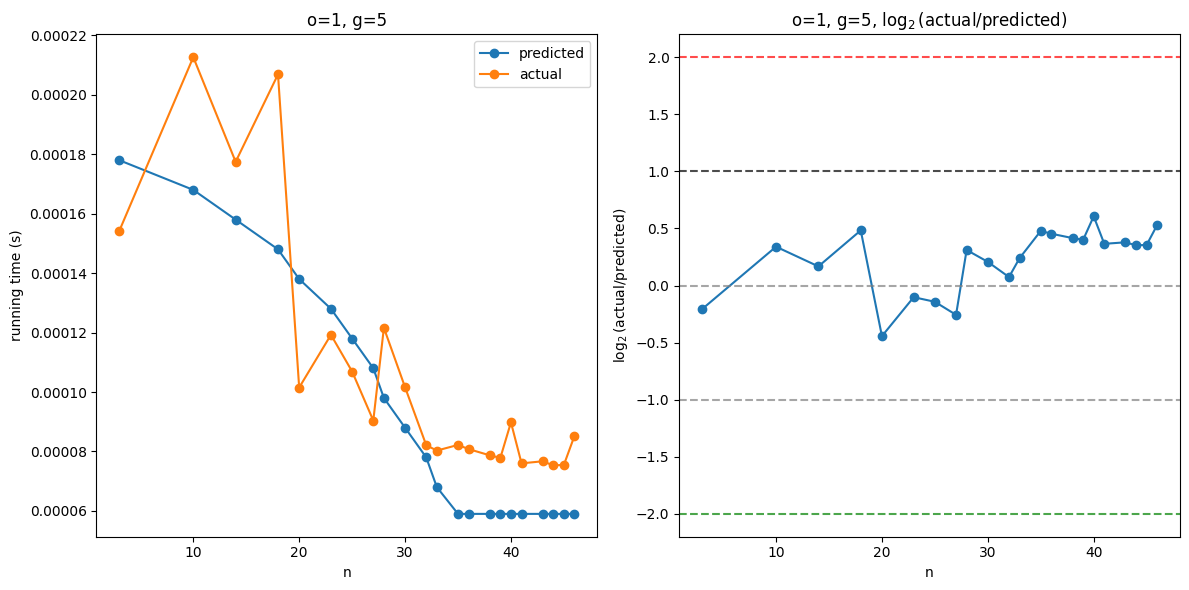

n for o=2, g=5:   0%|          | 0/22 [00:00<?, ?it/s]

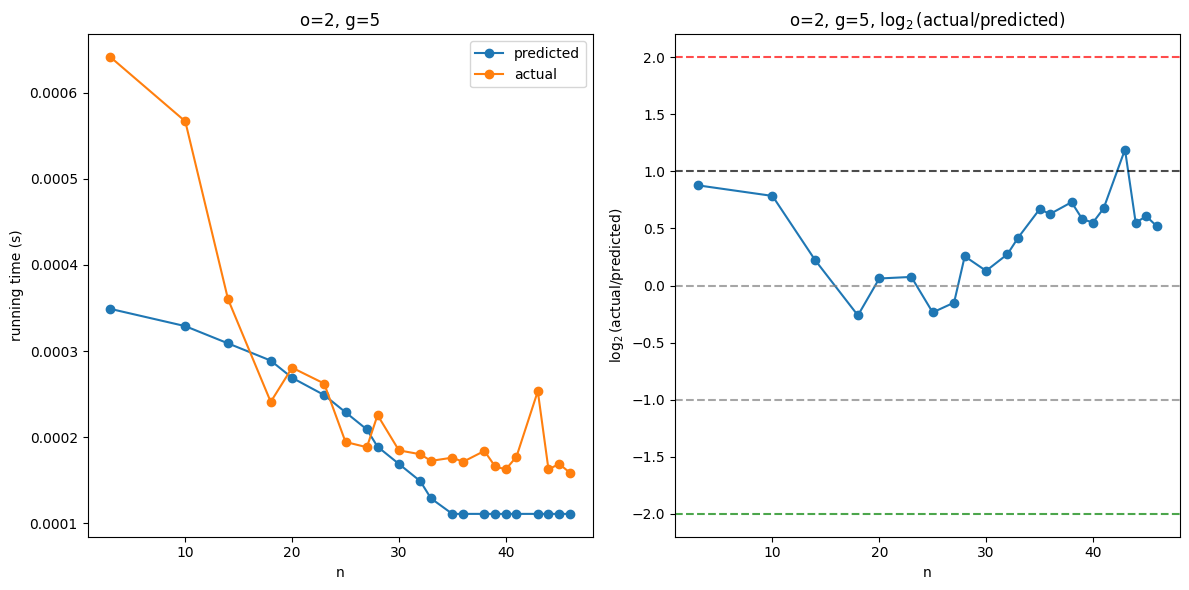

n for o=3, g=5:   0%|          | 0/22 [00:00<?, ?it/s]

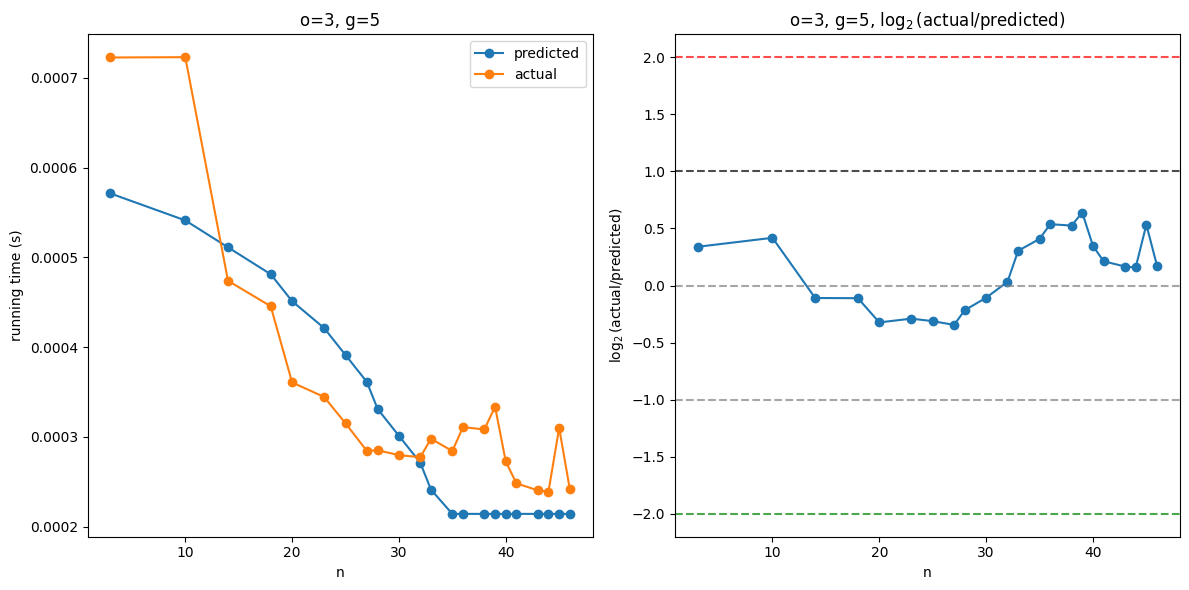

n for o=4, g=5:   0%|          | 0/22 [00:00<?, ?it/s]

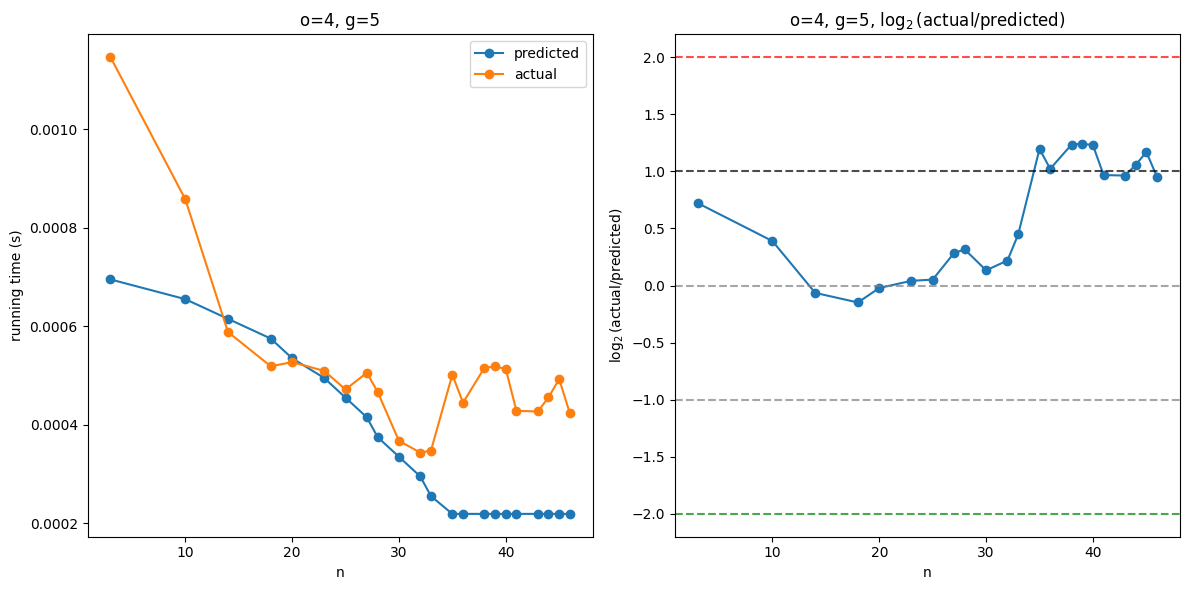

n for o=5, g=5:   0%|          | 0/22 [00:00<?, ?it/s]

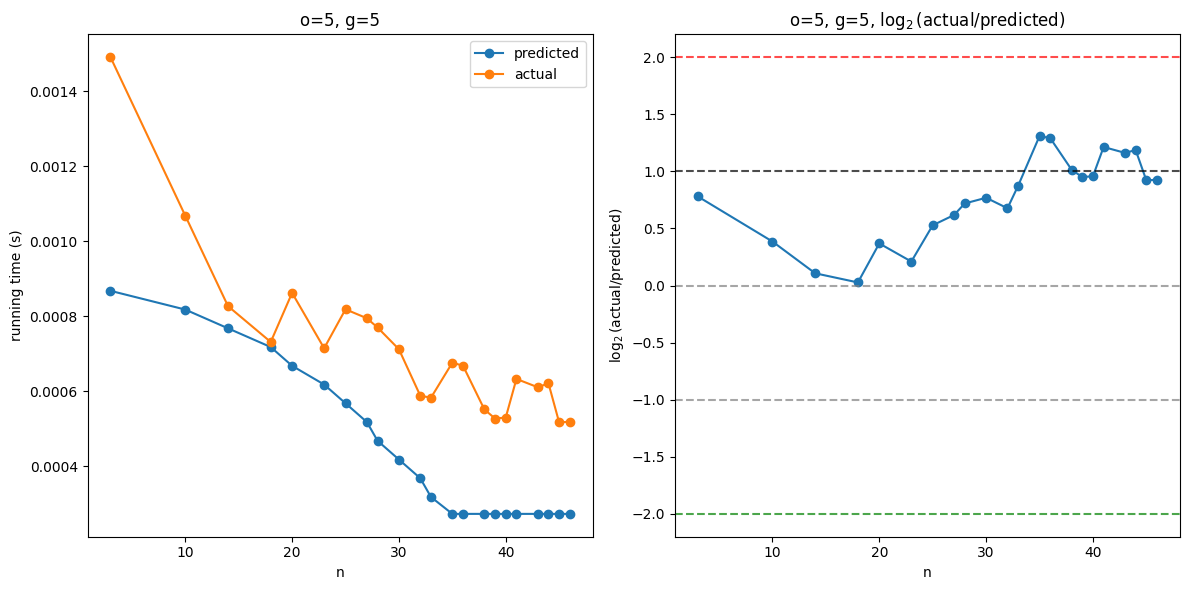

n for o=6, g=5:   0%|          | 0/22 [00:00<?, ?it/s]

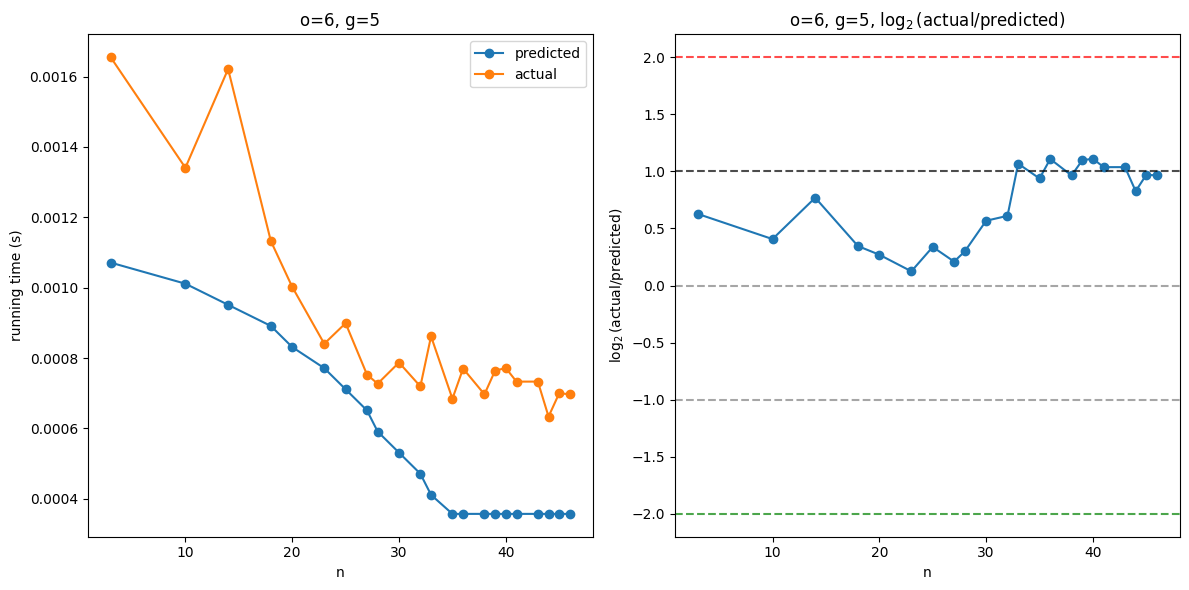

n for o=7, g=5:   0%|          | 0/22 [00:00<?, ?it/s]

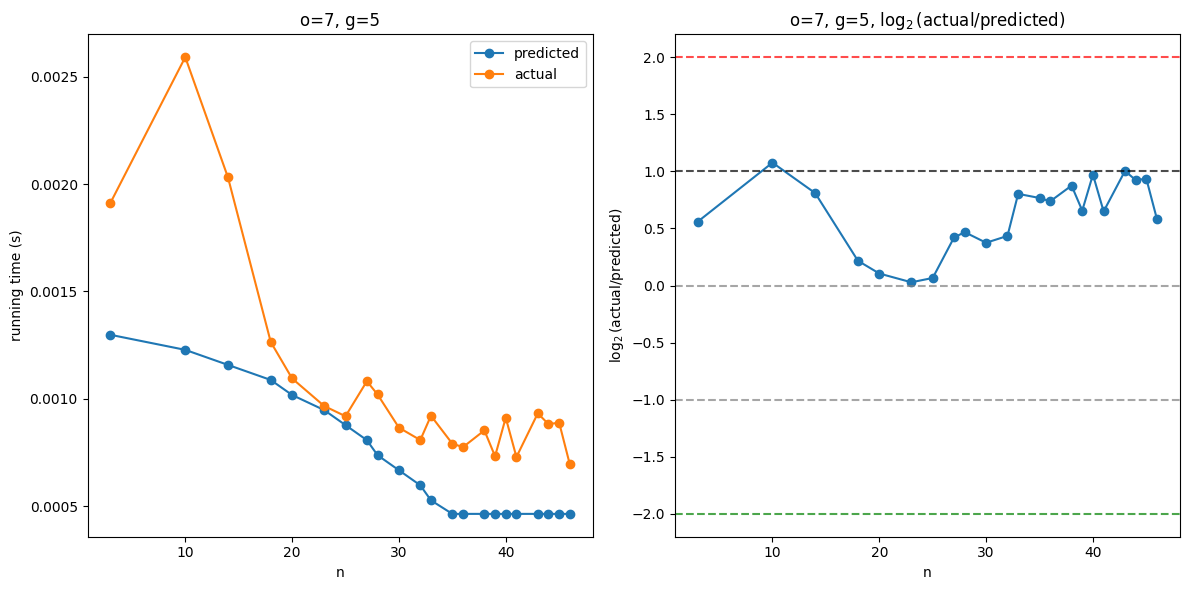

n for o=8, g=5:   0%|          | 0/22 [00:00<?, ?it/s]

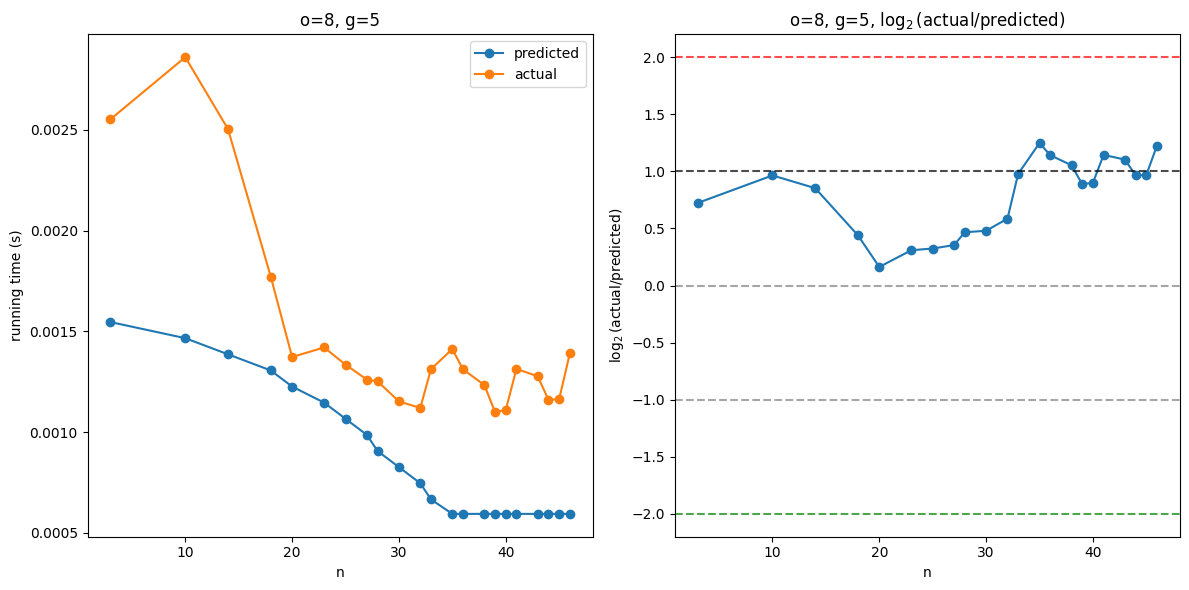

n for o=9, g=5:   0%|          | 0/22 [00:00<?, ?it/s]

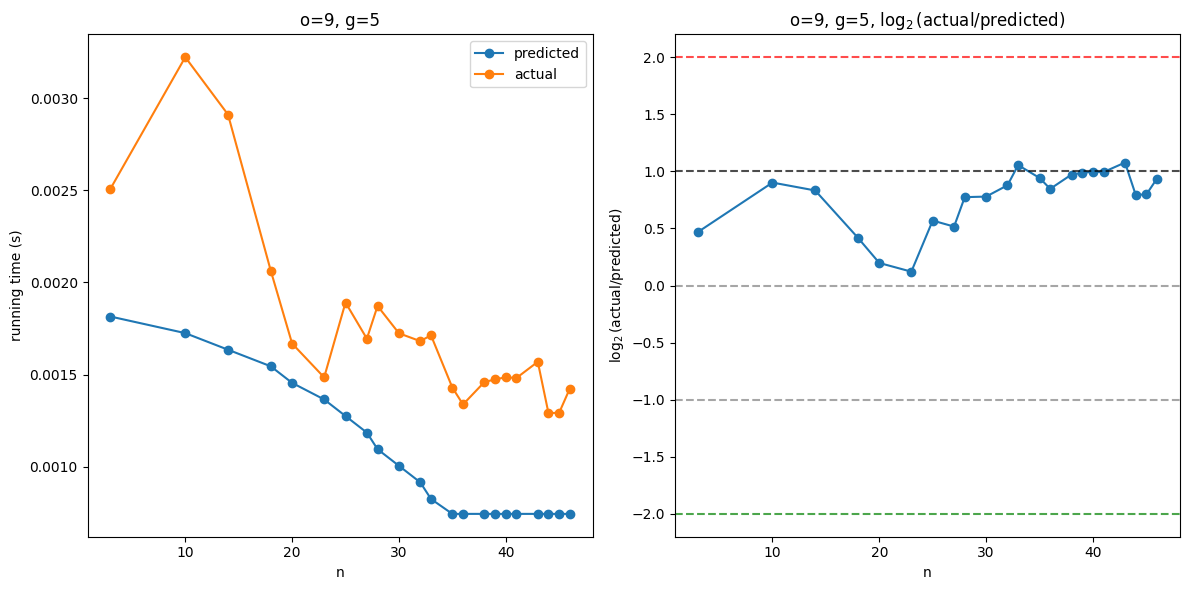

n for o=10, g=5:   0%|          | 0/22 [00:00<?, ?it/s]

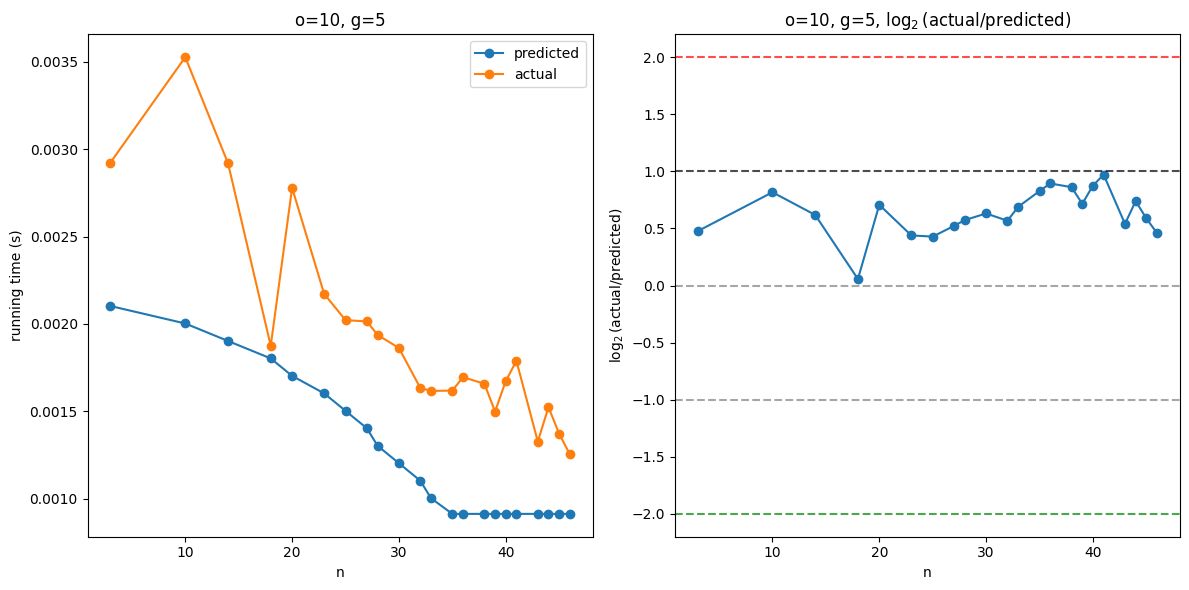

In [ ]:
import math
import importlib
import gamma
importlib.reload(gamma)
import numpy as np
from tqdm.contrib import itertools
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

# def predicted_mean_hypo(n: int, o: int, g: int) -> float:
#     n_offset = o * max(0.0, 1.2 * 10**-3 - n * 0.5 * 10**-5 / g) / 10
#     coef = 2 * 10**-6
#     return coef * o**3 + n_offset + 0.7 * 10**-4 / o**2

def predicted_mean_hypo(n: int, o: int, g: int) -> float:
    n_offset = o * max(0.0, 1.2 * 10**-3 - n * 0.5 * 10**-5 / g) / 10
    coef = 0.9 * 10**-5
    if o == 1:
        coef_offset = 0.5
    elif o == 2:
        coef_offset = 3.0
    else:
        coef_offset = 12.0
    return coef * o**2 + n_offset + coef_offset * 10**-4 / o**2

ns = []
ks = []
ps_pred = []
ps_act = []

min_n = 10
n_inc = 10**2
max_n1 = 2*10**3 + n_inc
for g, o in itertools.product(range(1,6), range(1,11)):
    for n in tqdm(list(range(min_n, max_n1 + n_inc, n_inc)), f'n for {o=}, {g=}'):        
        if n == min_n:
            ns = []
            ks = []
            ps_pred = []
            ps_act = []
        k = round(math.sqrt(n))
        ks.append(k)
        ps_pred.append(predicted_mean_hypo(n, o, g))
        ps_act.append(actual_mean_hypo(n,k,o,g))
        if n >= max_n1:
            # Create figure and subplots first
            plt.figure(figsize=(12, 6))

            # First subplot - predicted vs actual
            plt.subplot(1, 2, 1)
            plt.plot(ks, ps_pred, 'o-', label='predicted')
            plt.plot(ks, ps_act, 'o-', label='actual')
            plt.legend()
            plt.xlabel('n')
            plt.ylabel('running time (s)')
            plt.title(f'{o=}, {g=}')

            # Second subplot - log ratio
            plt.subplot(1, 2, 2)
            log_ratio = np.log2(np.array(ps_act) / np.array(ps_pred))
            plt.plot(ks, log_ratio, 'o-')
            plt.axhline(y=0, color='gray', linestyle='--', alpha=0.7)
            plt.axhline(y=1, color='black', linestyle='--', alpha=0.7)
            plt.axhline(y=-1, color='gray', linestyle='--', alpha=0.7)
            plt.axhline(y=2, color='red', linestyle='--', alpha=0.7)
            plt.axhline(y=-2, color='green', linestyle='--', alpha=0.7)
            plt.xlabel('n')
            plt.ylabel(r'$\log_2$(actual/predicted)')
            plt.title(f'{o=}, {g=}, ' + r'$\log_2$(actual/predicted)')

            plt.tight_layout()  # Adjusts spacing between subplots
            plt.show()

  0%|          | 0/25 [00:00<?, ?it/s]

n for o=1, g=1:   0%|          | 0/22 [00:00<?, ?it/s]

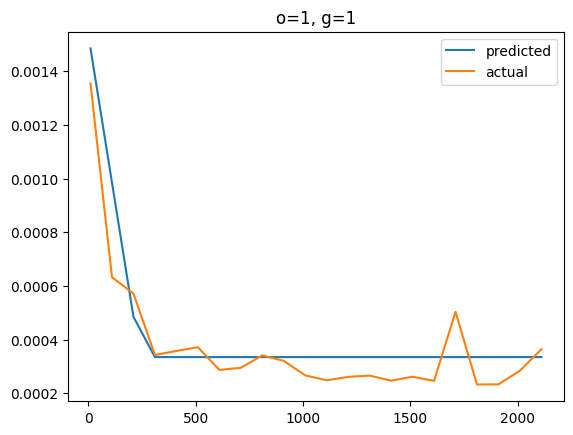

n for o=2, g=1:   0%|          | 0/22 [00:00<?, ?it/s]

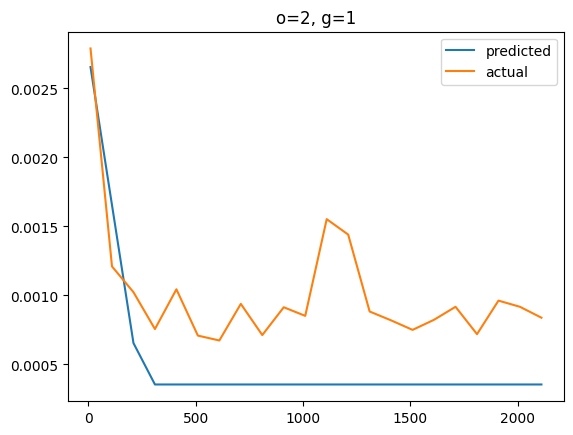

n for o=3, g=1:   0%|          | 0/22 [00:00<?, ?it/s]

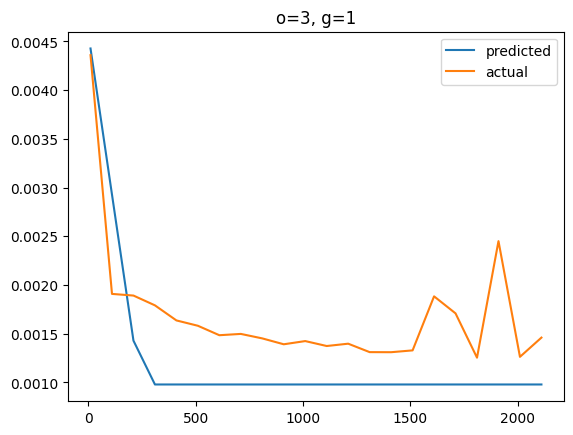

n for o=4, g=1:   0%|          | 0/22 [00:00<?, ?it/s]

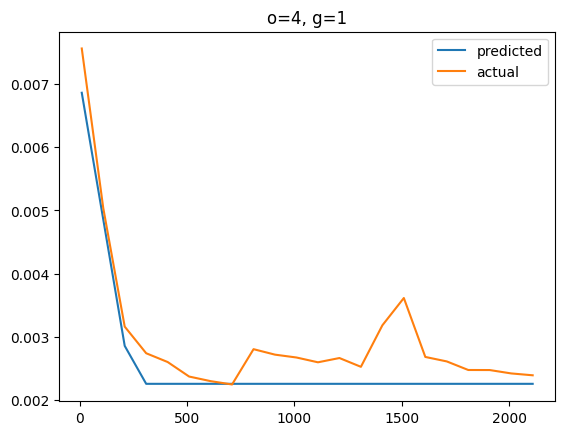

n for o=5, g=1:   0%|          | 0/22 [00:00<?, ?it/s]

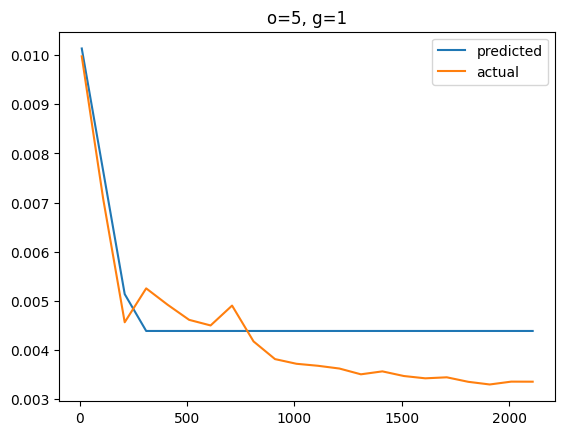

n for o=1, g=2:   0%|          | 0/22 [00:00<?, ?it/s]

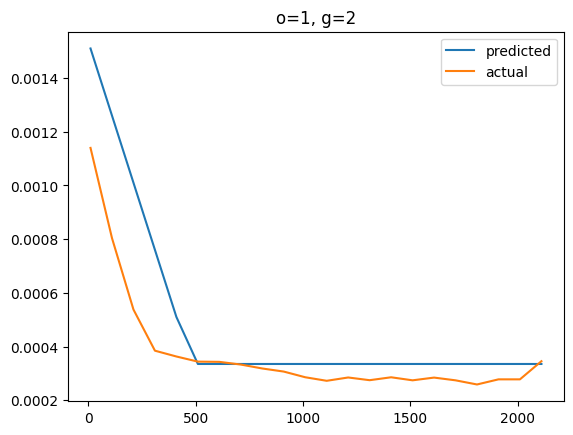

n for o=2, g=2:   0%|          | 0/22 [00:00<?, ?it/s]

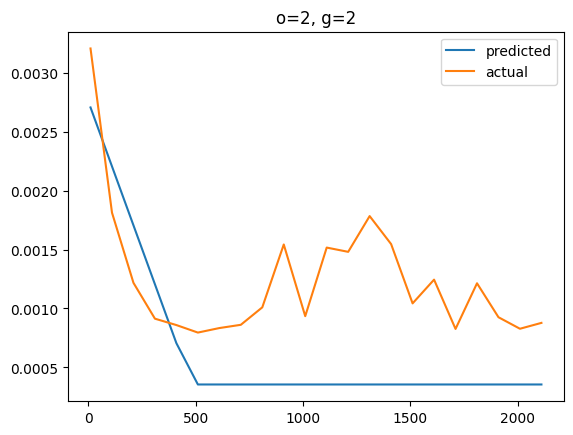

n for o=3, g=2:   0%|          | 0/22 [00:00<?, ?it/s]

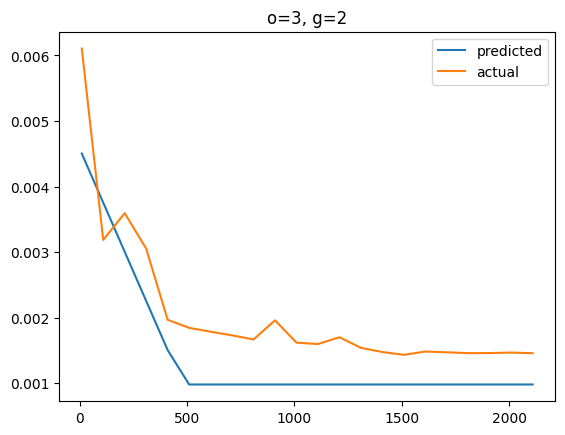

n for o=4, g=2:   0%|          | 0/22 [00:00<?, ?it/s]

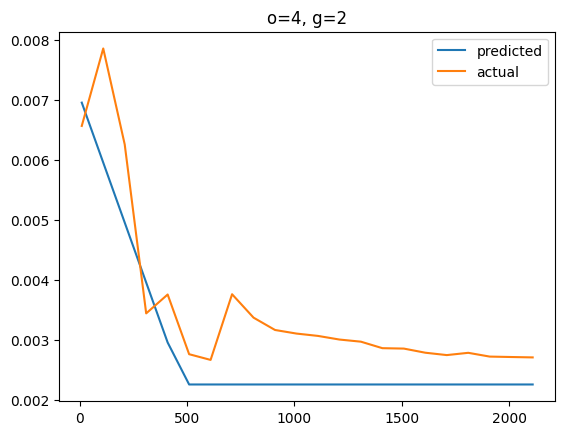

n for o=5, g=2:   0%|          | 0/22 [00:00<?, ?it/s]

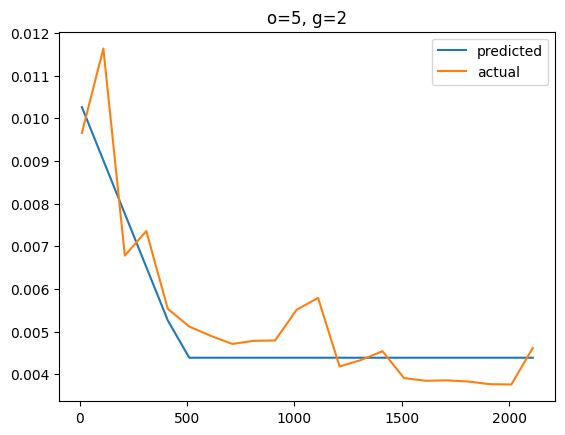

n for o=1, g=3:   0%|          | 0/22 [00:00<?, ?it/s]

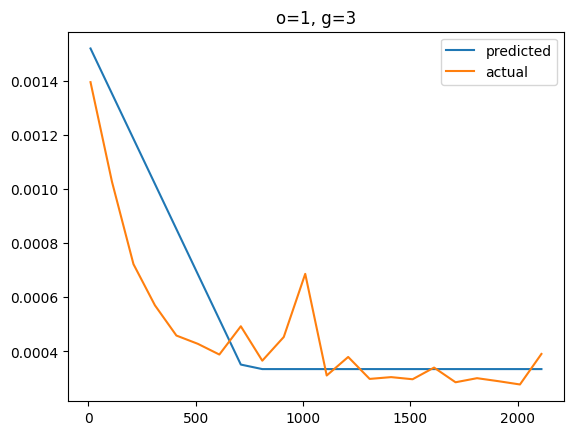

n for o=2, g=3:   0%|          | 0/22 [00:00<?, ?it/s]

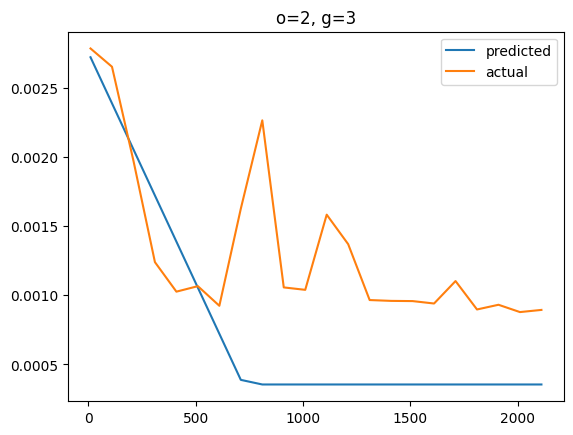

n for o=3, g=3:   0%|          | 0/22 [00:00<?, ?it/s]

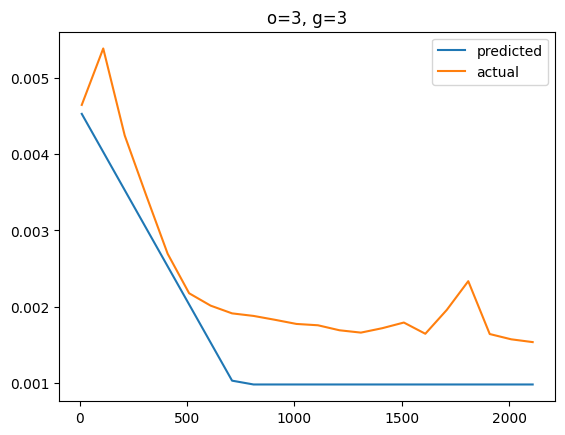

n for o=4, g=3:   0%|          | 0/22 [00:00<?, ?it/s]

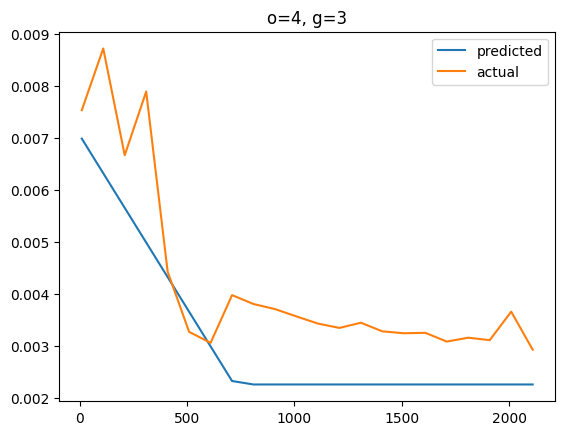

n for o=5, g=3:   0%|          | 0/22 [00:00<?, ?it/s]

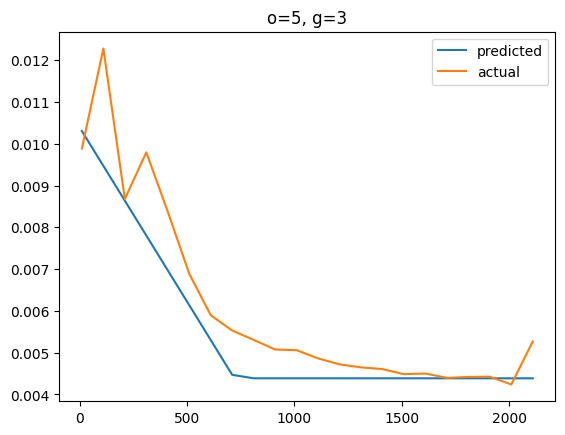

n for o=1, g=4:   0%|          | 0/22 [00:00<?, ?it/s]

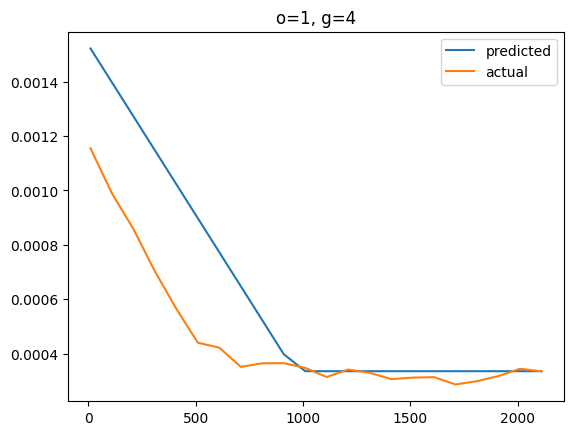

n for o=2, g=4:   0%|          | 0/22 [00:00<?, ?it/s]

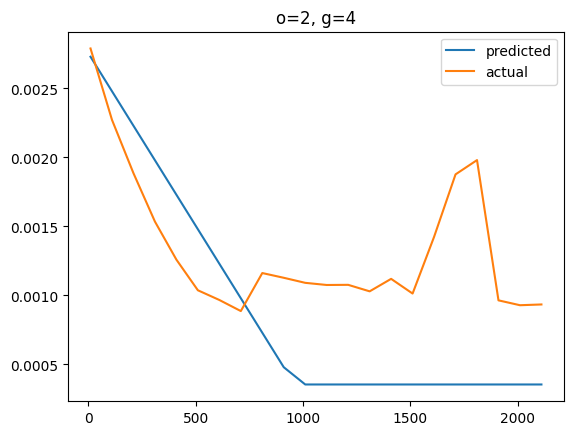

n for o=3, g=4:   0%|          | 0/22 [00:00<?, ?it/s]

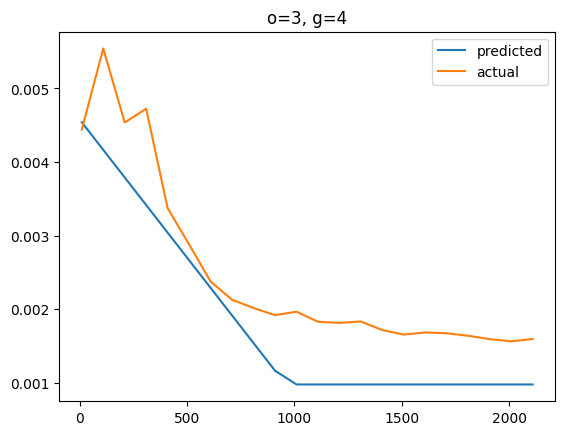

n for o=4, g=4:   0%|          | 0/22 [00:00<?, ?it/s]

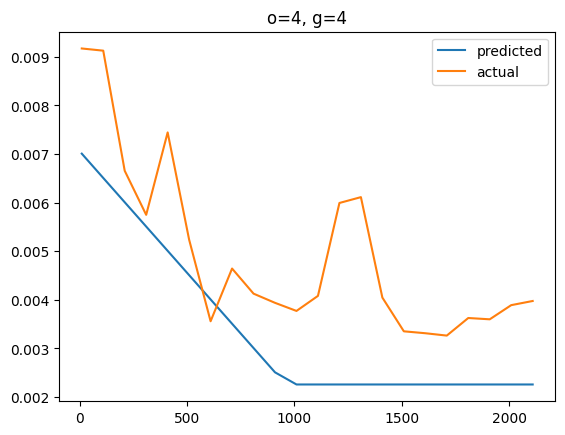

n for o=5, g=4:   0%|          | 0/22 [00:00<?, ?it/s]

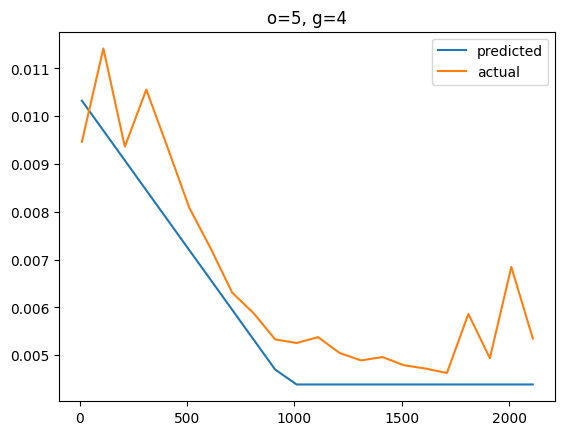

n for o=1, g=5:   0%|          | 0/22 [00:00<?, ?it/s]

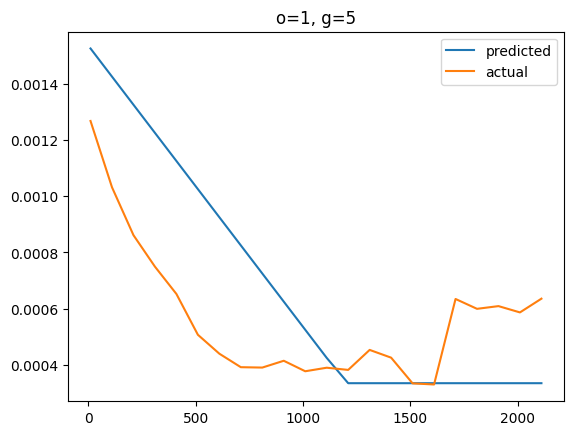

n for o=2, g=5:   0%|          | 0/22 [00:00<?, ?it/s]

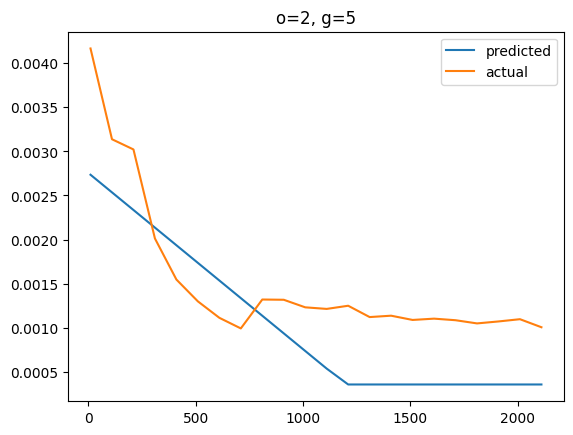

n for o=3, g=5:   0%|          | 0/22 [00:00<?, ?it/s]

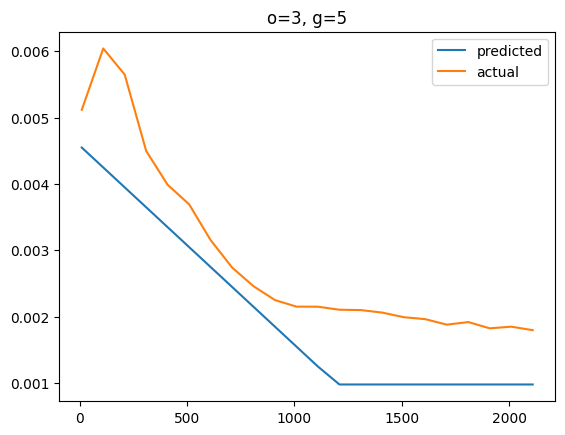

n for o=4, g=5:   0%|          | 0/22 [00:00<?, ?it/s]

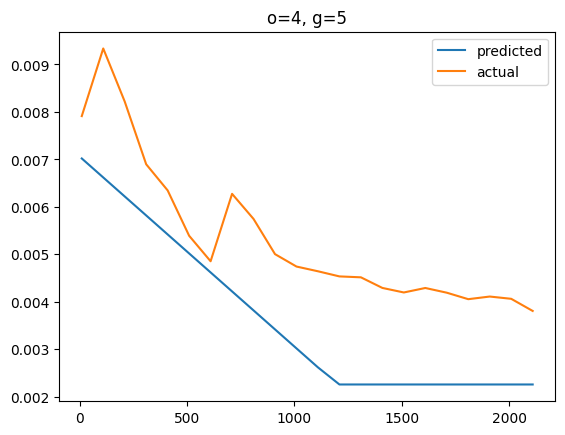

n for o=5, g=5:   0%|          | 0/22 [00:00<?, ?it/s]

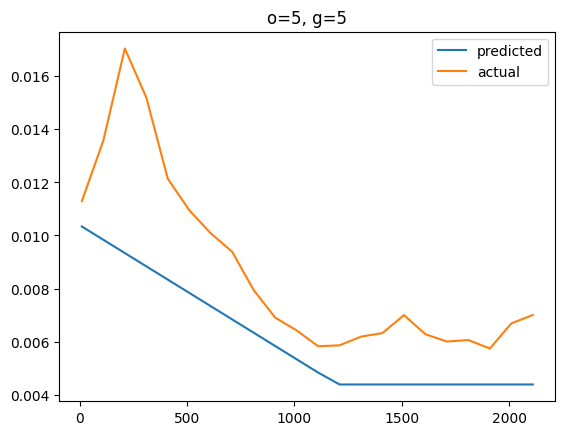

In [ ]:
import math
import importlib
import gamma
importlib.reload(gamma)
import numpy as np
from tqdm.contrib import itertools
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

def predicted_var_direct_np(k: int) -> float:
    if k <= 10**3:
        return 5 * 10**-5
    return k * 10**-7 / 2.7

def predicted_var_hypo(n: int, o: int, g: int) -> float:
    n_offset = o * max(0.0, 1.2 * 10**-3 - n * 0.5 * 10**-5 / g)
    coef = 0.000035
    return coef * o**3 + n_offset + 3*10**-4 / o**2

ks = []
ps_pred = []
ps_act = []

n_inc = 10**2
max_n1 = 2*10**3 + n_inc
n_inc2 = 10**4
max_n2 = 10**2 + n_inc2
for g, o in itertools.product(range(1,6), range(1,6)):
    for n in tqdm(list(range(10, max_n1 + n_inc, n_inc)), f'n for {o=}, {g=}'):
        if n == 10:
            # print('#'*100)
            ks = []
            ps_pred = []
            ps_act = []
        k = round(math.sqrt(n))
        ks.append(n)
        ps_pred.append(predicted_var_hypo(n,o,g))
        ps_act.append(actual_var_hypo(n,k,o,g))
        if n >= max_n1:
            plt.plot(ks, ps_pred, label='predicted')
            plt.plot(ks, ps_act, label='actual')
            plt.title(f'{o=}, {g=}')
            plt.legend()
            plt.show()

  0%|          | 0/11 [00:00<?, ?it/s]

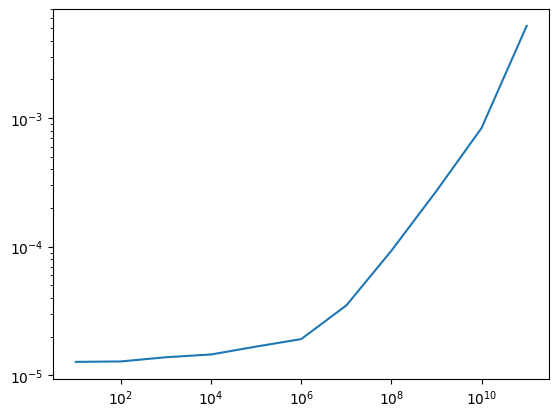

In [ ]:
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
ks = []
ps = []
for exponent in tqdm(range(1, 12)):
    n = 10**exponent
    k = round(math.sqrt(n))
    o = 1
    g = 1
    ks.append(n)
    ps.append(actual_mean_direct_np(n,k,o,g))

plt.plot(ks, ps)
plt.xscale('log')
plt.yscale('log')